INPUT DATA 

In [2]:
# import os
# import zipfile

# # Create a directory for our data
# os.makedirs("data", exist_ok=True)

# # Download dataset from Kaggle (make sure kaggle.json is set up)
# !kaggle datasets download -d paramaggarwal/fashion-product-images-dataset -p data

# # Unzip the dataset
# with zipfile.ZipFile("data/fashion-product-images-dataset.zip", 'r') as z:
#     z.extractall("data")

Dataset URL: https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-dataset
License(s): MIT
100%|█████████████████████████████████████▉| 23.1G/23.1G [27:50<00:00, 16.5MB/s]
100%|██████████████████████████████████████| 23.1G/23.1G [27:50<00:00, 14.8MB/s]


Select subset of data (5k) images

In [35]:
import pandas as pd
import numpy as np
import shutil
import os
from tqdm import tqdm

# Load styles.csv
styles = pd.read_csv("data/fashion-dataset/fashion-dataset/styles.csv",on_bad_lines='skip')
styles.rename(columns={'id':'id', 'articleType':'articleType'}, inplace=True)

image_paths = os.listdir("data/fashion-dataset/fashion-dataset/images")
image_ids = [int(img.split('.')[0]) for img in image_paths] #keep rows that are there in image folder
styles = styles[styles['id'].isin(image_ids)]

# remove any row with missing articleType
styles = styles.dropna(subset=['articleType'])
class_counts = styles['articleType'].value_counts()
valid_classes = class_counts[class_counts > 1].index   
styles = styles[styles['articleType'].isin(valid_classes)]

NUM_SAMPLES = 5000
styles_subset = styles.sample(n=NUM_SAMPLES, random_state=42).reset_index(drop=True) # Get Smaller Subsample

print("Original dataset size:", len(styles))
print("Subset size:", len(styles_subset))


Original dataset size: 44413
Subset size: 5000


In [2]:
styles_subset.head()

id gender masterCategory               subCategory  \
0   5759  Women        Apparel                   Topwear   
1  52463  Women        Apparel  Loungewear and Nightwear   
2  57765  Women  Personal Care                 Skin Care   
3  35663    Men       Footwear                    Sandal   
4  44563    Men       Footwear                    Sandal   

              articleType baseColour  season    year   usage  \
0                    Tops      Black  Summer  2011.0  Casual   
1              Nightdress       Grey  Winter  2015.0  Casual   
2  Face Wash and Cleanser      White  Spring  2017.0  Casual   
3                 Sandals      Brown  Summer  2013.0  Casual   
4                 Sandals      Black  Summer  2012.0  Casual   

                  productDisplayName  
0   Jealous 21 Women Black Party Top  
1   Red Rose Grey & Black Nightdress  
2        Lotus Herbals Apricot Scrub  
3  U.S. Polo Assn. Men Brown Sandals  
4          Coolers Men Black Sandals

In [3]:
SUBSET_FOLDER = "data/fashion-dataset/fashion-dataset/images_subset" #we will store images of subset here


In [7]:
styles['articleType'].value_counts().values

array([7066, 3215, 2845, 2542, 2036, 1844, 1762, 1759, 1323, 1073,  936,
        914,  897,  849,  813,  724,  686,  637,  613,  608,  547,  530,
        500,  477,  464,  427,  416,  347,  329,  315,  304,  290,  285,
        283,  277,  263,  258,  242,  234,  229,  189,  177,  176,  175,
        160,  144,  141,  140,  128,  119,  118,  116,  106,  102,   97,
         94,   91,   90,   88,   85,   82,   76,   67,   66,   61,   61,
         58,   57,   53,   52,   49,   48,   47,   44,   42,   40,   39,
         38,   38,   34,   34,   32,   32,   30,   29,   28,   25,   23,
         20,   20,   19,   18,   17,   17,   16,   16,   16,   16,   15,
         13,   13,   12,   12,   12,   11,   11,   11,    9,    9,    8,
          8,    8,    7,    7,    7,    6,    6,    6,    6,    6,    5,
          5,    5,    4,    4,    4,    4,    4,    3,    3,    3,    3,
          2,    2,    2,    2])

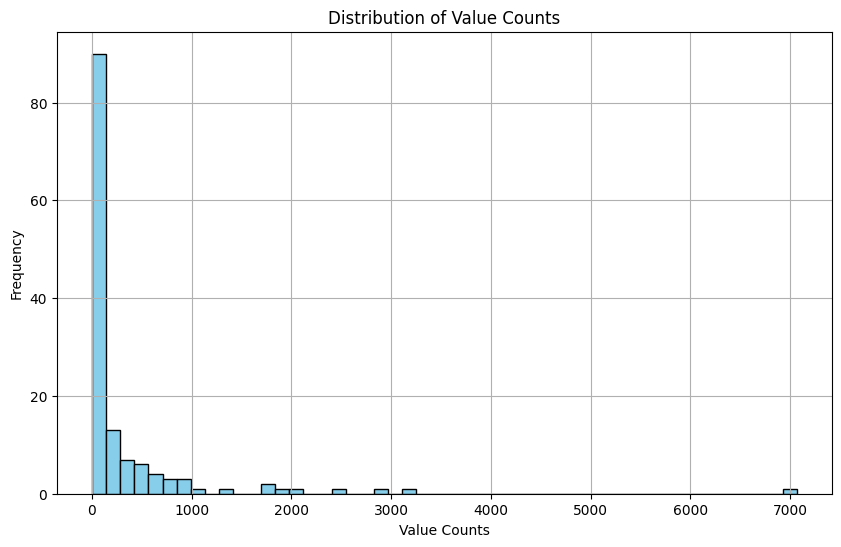

347.0


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Array of value counts
value_counts = np.array([
    7066, 3215, 2845, 2542, 2036, 1844, 1762, 1759, 1323, 1073, 936,
    914, 897, 849, 813, 724, 686, 637, 613, 608, 547, 530, 500, 477,
    464, 427, 416, 347, 329, 315, 304, 290, 285, 283, 277, 263, 258,
    242, 234, 229, 189, 177, 176, 175, 160, 144, 141, 140, 128, 119,
    118, 116, 106, 102, 97, 94, 91, 90, 88, 85, 82, 76, 67, 66, 61,
    61, 58, 57, 53, 52, 49, 48, 47, 44, 42, 40, 39, 38, 38, 34, 34,
    32, 32, 30, 29, 28, 25, 23, 20, 20, 19, 18, 17, 17, 16, 16, 16,
    16, 15, 13, 13, 12, 12, 12, 11, 11, 11, 9, 9, 8, 8, 8, 7, 7, 7,
    6, 6, 6, 6, 6, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2
])

value counts distribution
plt.figure(figsize=(10, 6))
plt.hist(value_counts, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Value Counts")
plt.xlabel("Value Counts")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

#chosing a threshold of 80 th percentile to keep the labels as the value counts of other labels are very less.
threshold = np.percentile(value_counts, 80)
print(threshold)


Apply threshold to keep classes with 80th percentile for the sample training purpose

      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  


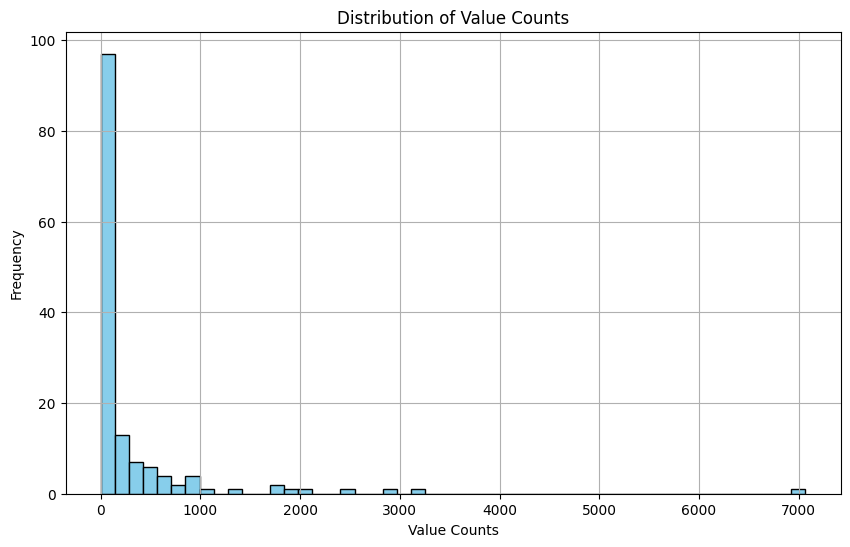

Threshold based on the 80th percentile: 323.4000000000001
Sampled DataFrame shape: (5000, 10)
articleType
Tshirts                  985
Shirts                   408
Casual Shoes             380
Watches                  324
Handbags                 267
Sports Shoes             260
Tops                     254
Kurtas                   252
Heels                    187
Wallets                  148
Sunglasses               134
Flip Flops               125
Sandals                  109
Briefs                   106
Belts                    100
Socks                     98
Backpacks                 95
Jeans                     91
Formal Shoes              82
Perfume and Body Mist     78
Shorts                    75
Trousers                  70
Flats                     64
Dresses                   60
Earrings                  59
Sarees                    55
Nail Polish               50
Bra                       45
Deodorant                 39
Name: count, dtype: int64


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
styles = pd.read_csv("data/fashion-dataset/fashion-dataset/styles.csv", on_bad_lines='skip')
styles.rename(columns={'id': 'id', 'articleType': 'articleType'}, inplace=True)
print(styles.head())

value_counts = styles['articleType'].value_counts()


# plot histogram

plt.figure(figsize=(10, 6))
plt.hist(value_counts, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Value Counts")
plt.xlabel("Value Counts")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 80 th percentile threshold
threshold = np.percentile(value_counts, 80)
print(f"Threshold based on the 80th percentile: {threshold}")
filtered_categories = value_counts[value_counts >= threshold].index

filtered_styles = styles[styles['articleType'].isin(filtered_categories)]
# SAMPLE 5000 rows with threshold
sampled_styles = filtered_styles.sample(n=5000, random_state=42)
print(f"Sampled DataFrame shape: {sampled_styles.shape}")

print(sampled_styles['articleType'].value_counts())


Move image files to subset folder

In [31]:
SUBSET_FOLDER = "data/fashion-dataset/fashion-dataset/images_subset"
os.makedirs(SUBSET_FOLDER, exist_ok=True)

for idx, row in tqdm(sampled_styles.iterrows(), total=len(sampled_styles)):
    img_id = row['id']
    src_path = f"data/fashion-dataset/fashion-dataset/images/{img_id}.jpg"
    dst_path = f"{SUBSET_FOLDER}/{img_id}.jpg"
    print(src_path)
    print(dst_path)
    if os.path.exists(src_path):
        shutil.copy(src_path, dst_path)
    else:
        pass


  1%|▊                                                                               | 48/5000 [00:00<00:10, 473.43it/s]

data/fashion-dataset/fashion-dataset/images/5268.jpg
data/fashion-dataset/fashion-dataset/images_subset/5268.jpg
data/fashion-dataset/fashion-dataset/images/3731.jpg
data/fashion-dataset/fashion-dataset/images_subset/3731.jpg
data/fashion-dataset/fashion-dataset/images/27208.jpg
data/fashion-dataset/fashion-dataset/images_subset/27208.jpg
data/fashion-dataset/fashion-dataset/images/10273.jpg
data/fashion-dataset/fashion-dataset/images_subset/10273.jpg
data/fashion-dataset/fashion-dataset/images/6997.jpg
data/fashion-dataset/fashion-dataset/images_subset/6997.jpg
data/fashion-dataset/fashion-dataset/images/20666.jpg
data/fashion-dataset/fashion-dataset/images_subset/20666.jpg
data/fashion-dataset/fashion-dataset/images/18603.jpg
data/fashion-dataset/fashion-dataset/images_subset/18603.jpg
data/fashion-dataset/fashion-dataset/images/12236.jpg
data/fashion-dataset/fashion-dataset/images_subset/12236.jpg
data/fashion-dataset/fashion-dataset/images/14344.jpg
data/fashion-dataset/fashion-dat

  5%|███▊                                                                           | 240/5000 [00:00<00:07, 623.31it/s]

data/fashion-dataset/fashion-dataset/images/50607.jpg
data/fashion-dataset/fashion-dataset/images_subset/50607.jpg
data/fashion-dataset/fashion-dataset/images/35683.jpg
data/fashion-dataset/fashion-dataset/images_subset/35683.jpg
data/fashion-dataset/fashion-dataset/images/8270.jpg
data/fashion-dataset/fashion-dataset/images_subset/8270.jpg
data/fashion-dataset/fashion-dataset/images/15834.jpg
data/fashion-dataset/fashion-dataset/images_subset/15834.jpg
data/fashion-dataset/fashion-dataset/images/1782.jpg
data/fashion-dataset/fashion-dataset/images_subset/1782.jpg
data/fashion-dataset/fashion-dataset/images/28704.jpg
data/fashion-dataset/fashion-dataset/images_subset/28704.jpg
data/fashion-dataset/fashion-dataset/images/9550.jpg
data/fashion-dataset/fashion-dataset/images_subset/9550.jpg
data/fashion-dataset/fashion-dataset/images/54389.jpg
data/fashion-dataset/fashion-dataset/images_subset/54389.jpg
data/fashion-dataset/fashion-dataset/images/31210.jpg
data/fashion-dataset/fashion-dat

  7%|█████▊                                                                         | 371/5000 [00:00<00:07, 640.42it/s]

data/fashion-dataset/fashion-dataset/images/33770.jpg
data/fashion-dataset/fashion-dataset/images_subset/33770.jpg
data/fashion-dataset/fashion-dataset/images/43557.jpg
data/fashion-dataset/fashion-dataset/images_subset/43557.jpg
data/fashion-dataset/fashion-dataset/images/19054.jpg
data/fashion-dataset/fashion-dataset/images_subset/19054.jpg
data/fashion-dataset/fashion-dataset/images/5346.jpg
data/fashion-dataset/fashion-dataset/images_subset/5346.jpg
data/fashion-dataset/fashion-dataset/images/16996.jpg
data/fashion-dataset/fashion-dataset/images_subset/16996.jpg
data/fashion-dataset/fashion-dataset/images/25349.jpg
data/fashion-dataset/fashion-dataset/images_subset/25349.jpg
data/fashion-dataset/fashion-dataset/images/43501.jpg
data/fashion-dataset/fashion-dataset/images_subset/43501.jpg
data/fashion-dataset/fashion-dataset/images/52950.jpg
data/fashion-dataset/fashion-dataset/images_subset/52950.jpg
data/fashion-dataset/fashion-dataset/images/56893.jpg
data/fashion-dataset/fashion

  9%|██████▉                                                                        | 436/5000 [00:00<00:07, 637.78it/s]

data/fashion-dataset/fashion-dataset/images/2298.jpg
data/fashion-dataset/fashion-dataset/images_subset/2298.jpg
data/fashion-dataset/fashion-dataset/images/8140.jpg
data/fashion-dataset/fashion-dataset/images_subset/8140.jpg
data/fashion-dataset/fashion-dataset/images/41637.jpg
data/fashion-dataset/fashion-dataset/images_subset/41637.jpg
data/fashion-dataset/fashion-dataset/images/22109.jpg
data/fashion-dataset/fashion-dataset/images_subset/22109.jpg
data/fashion-dataset/fashion-dataset/images/16532.jpg
data/fashion-dataset/fashion-dataset/images_subset/16532.jpg
data/fashion-dataset/fashion-dataset/images/31692.jpg
data/fashion-dataset/fashion-dataset/images_subset/31692.jpg
data/fashion-dataset/fashion-dataset/images/20074.jpg
data/fashion-dataset/fashion-dataset/images_subset/20074.jpg
data/fashion-dataset/fashion-dataset/images/20459.jpg
data/fashion-dataset/fashion-dataset/images_subset/20459.jpg
data/fashion-dataset/fashion-dataset/images/4777.jpg
data/fashion-dataset/fashion-da

 11%|████████▉                                                                      | 566/5000 [00:00<00:07, 622.92it/s]

data/fashion-dataset/fashion-dataset/images/38013.jpg
data/fashion-dataset/fashion-dataset/images_subset/38013.jpg
data/fashion-dataset/fashion-dataset/images/20628.jpg
data/fashion-dataset/fashion-dataset/images_subset/20628.jpg
data/fashion-dataset/fashion-dataset/images/9510.jpg
data/fashion-dataset/fashion-dataset/images_subset/9510.jpg
data/fashion-dataset/fashion-dataset/images/4128.jpg
data/fashion-dataset/fashion-dataset/images_subset/4128.jpg
data/fashion-dataset/fashion-dataset/images/50388.jpg
data/fashion-dataset/fashion-dataset/images_subset/50388.jpg
data/fashion-dataset/fashion-dataset/images/15307.jpg
data/fashion-dataset/fashion-dataset/images_subset/15307.jpg
data/fashion-dataset/fashion-dataset/images/40654.jpg
data/fashion-dataset/fashion-dataset/images_subset/40654.jpg
data/fashion-dataset/fashion-dataset/images/56890.jpg
data/fashion-dataset/fashion-dataset/images_subset/56890.jpg
data/fashion-dataset/fashion-dataset/images/4089.jpg
data/fashion-dataset/fashion-da

 14%|██████████▉                                                                    | 696/5000 [00:01<00:06, 618.32it/s]

data/fashion-dataset/fashion-dataset/images/17491.jpg
data/fashion-dataset/fashion-dataset/images_subset/17491.jpg
data/fashion-dataset/fashion-dataset/images/9553.jpg
data/fashion-dataset/fashion-dataset/images_subset/9553.jpg
data/fashion-dataset/fashion-dataset/images/58243.jpg
data/fashion-dataset/fashion-dataset/images_subset/58243.jpg
data/fashion-dataset/fashion-dataset/images/30537.jpg
data/fashion-dataset/fashion-dataset/images_subset/30537.jpg
data/fashion-dataset/fashion-dataset/images/18449.jpg
data/fashion-dataset/fashion-dataset/images_subset/18449.jpg
data/fashion-dataset/fashion-dataset/images/17658.jpg
data/fashion-dataset/fashion-dataset/images_subset/17658.jpg
data/fashion-dataset/fashion-dataset/images/37265.jpg
data/fashion-dataset/fashion-dataset/images_subset/37265.jpg
data/fashion-dataset/fashion-dataset/images/45342.jpg
data/fashion-dataset/fashion-dataset/images_subset/45342.jpg
data/fashion-dataset/fashion-dataset/images/46327.jpg
data/fashion-dataset/fashion

 16%|█████████████                                                                  | 823/5000 [00:01<00:06, 597.73it/s]

data/fashion-dataset/fashion-dataset/images/57505.jpg
data/fashion-dataset/fashion-dataset/images_subset/57505.jpg
data/fashion-dataset/fashion-dataset/images/36992.jpg
data/fashion-dataset/fashion-dataset/images_subset/36992.jpg
data/fashion-dataset/fashion-dataset/images/30752.jpg
data/fashion-dataset/fashion-dataset/images_subset/30752.jpg
data/fashion-dataset/fashion-dataset/images/35799.jpg
data/fashion-dataset/fashion-dataset/images_subset/35799.jpg
data/fashion-dataset/fashion-dataset/images/37913.jpg
data/fashion-dataset/fashion-dataset/images_subset/37913.jpg
data/fashion-dataset/fashion-dataset/images/11689.jpg
data/fashion-dataset/fashion-dataset/images_subset/11689.jpg
data/fashion-dataset/fashion-dataset/images/12725.jpg
data/fashion-dataset/fashion-dataset/images_subset/12725.jpg
data/fashion-dataset/fashion-dataset/images/21971.jpg
data/fashion-dataset/fashion-dataset/images_subset/21971.jpg
data/fashion-dataset/fashion-dataset/images/55170.jpg
data/fashion-dataset/fashi

 19%|███████████████                                                                | 953/5000 [00:01<00:06, 616.51it/s]

data/fashion-dataset/fashion-dataset/images/33891.jpg
data/fashion-dataset/fashion-dataset/images_subset/33891.jpg
data/fashion-dataset/fashion-dataset/images/19302.jpg
data/fashion-dataset/fashion-dataset/images_subset/19302.jpg
data/fashion-dataset/fashion-dataset/images/32526.jpg
data/fashion-dataset/fashion-dataset/images_subset/32526.jpg
data/fashion-dataset/fashion-dataset/images/27474.jpg
data/fashion-dataset/fashion-dataset/images_subset/27474.jpg
data/fashion-dataset/fashion-dataset/images/5267.jpg
data/fashion-dataset/fashion-dataset/images_subset/5267.jpg
data/fashion-dataset/fashion-dataset/images/29449.jpg
data/fashion-dataset/fashion-dataset/images_subset/29449.jpg
data/fashion-dataset/fashion-dataset/images/22485.jpg
data/fashion-dataset/fashion-dataset/images_subset/22485.jpg
data/fashion-dataset/fashion-dataset/images/22249.jpg
data/fashion-dataset/fashion-dataset/images_subset/22249.jpg
data/fashion-dataset/fashion-dataset/images/8891.jpg
data/fashion-dataset/fashion-

 22%|████████████████▊                                                             | 1076/5000 [00:01<00:06, 591.97it/s]

data/fashion-dataset/fashion-dataset/images/25720.jpg
data/fashion-dataset/fashion-dataset/images_subset/25720.jpg
data/fashion-dataset/fashion-dataset/images/2156.jpg
data/fashion-dataset/fashion-dataset/images_subset/2156.jpg
data/fashion-dataset/fashion-dataset/images/6653.jpg
data/fashion-dataset/fashion-dataset/images_subset/6653.jpg
data/fashion-dataset/fashion-dataset/images/3274.jpg
data/fashion-dataset/fashion-dataset/images_subset/3274.jpg
data/fashion-dataset/fashion-dataset/images/44140.jpg
data/fashion-dataset/fashion-dataset/images_subset/44140.jpg
data/fashion-dataset/fashion-dataset/images/28598.jpg
data/fashion-dataset/fashion-dataset/images_subset/28598.jpg
data/fashion-dataset/fashion-dataset/images/7968.jpg
data/fashion-dataset/fashion-dataset/images_subset/7968.jpg
data/fashion-dataset/fashion-dataset/images/52967.jpg
data/fashion-dataset/fashion-dataset/images_subset/52967.jpg
data/fashion-dataset/fashion-dataset/images/39589.jpg
data/fashion-dataset/fashion-datas

 24%|██████████████████▉                                                           | 1210/5000 [00:01<00:06, 593.79it/s]

data/fashion-dataset/fashion-dataset/images/16849.jpg
data/fashion-dataset/fashion-dataset/images_subset/16849.jpg
data/fashion-dataset/fashion-dataset/images/32159.jpg
data/fashion-dataset/fashion-dataset/images_subset/32159.jpg
data/fashion-dataset/fashion-dataset/images/7076.jpg
data/fashion-dataset/fashion-dataset/images_subset/7076.jpg
data/fashion-dataset/fashion-dataset/images/11558.jpg
data/fashion-dataset/fashion-dataset/images_subset/11558.jpg
data/fashion-dataset/fashion-dataset/images/23455.jpg
data/fashion-dataset/fashion-dataset/images_subset/23455.jpg
data/fashion-dataset/fashion-dataset/images/53696.jpg
data/fashion-dataset/fashion-dataset/images_subset/53696.jpg
data/fashion-dataset/fashion-dataset/images/10987.jpg
data/fashion-dataset/fashion-dataset/images_subset/10987.jpg
data/fashion-dataset/fashion-dataset/images/41778.jpg
data/fashion-dataset/fashion-dataset/images_subset/41778.jpg
data/fashion-dataset/fashion-dataset/images/8050.jpg
data/fashion-dataset/fashion-

 27%|████████████████████▊                                                         | 1333/5000 [00:02<00:06, 595.97it/s]

data/fashion-dataset/fashion-dataset/images/10474.jpg
data/fashion-dataset/fashion-dataset/images_subset/10474.jpg
data/fashion-dataset/fashion-dataset/images/2845.jpg
data/fashion-dataset/fashion-dataset/images_subset/2845.jpg
data/fashion-dataset/fashion-dataset/images/30243.jpg
data/fashion-dataset/fashion-dataset/images_subset/30243.jpg
data/fashion-dataset/fashion-dataset/images/23084.jpg
data/fashion-dataset/fashion-dataset/images_subset/23084.jpg
data/fashion-dataset/fashion-dataset/images/37888.jpg
data/fashion-dataset/fashion-dataset/images_subset/37888.jpg
data/fashion-dataset/fashion-dataset/images/38142.jpg
data/fashion-dataset/fashion-dataset/images_subset/38142.jpg
data/fashion-dataset/fashion-dataset/images/20670.jpg
data/fashion-dataset/fashion-dataset/images_subset/20670.jpg
data/fashion-dataset/fashion-dataset/images/24993.jpg
data/fashion-dataset/fashion-dataset/images_subset/24993.jpg
data/fashion-dataset/fashion-dataset/images/32944.jpg
data/fashion-dataset/fashion

 29%|██████████████████████▋                                                       | 1451/5000 [00:02<00:06, 571.00it/s]

data/fashion-dataset/fashion-dataset/images/7043.jpg
data/fashion-dataset/fashion-dataset/images_subset/7043.jpg
data/fashion-dataset/fashion-dataset/images/32520.jpg
data/fashion-dataset/fashion-dataset/images_subset/32520.jpg
data/fashion-dataset/fashion-dataset/images/24754.jpg
data/fashion-dataset/fashion-dataset/images_subset/24754.jpg
data/fashion-dataset/fashion-dataset/images/58108.jpg
data/fashion-dataset/fashion-dataset/images_subset/58108.jpg
data/fashion-dataset/fashion-dataset/images/6869.jpg
data/fashion-dataset/fashion-dataset/images_subset/6869.jpg
data/fashion-dataset/fashion-dataset/images/40528.jpg
data/fashion-dataset/fashion-dataset/images_subset/40528.jpg
data/fashion-dataset/fashion-dataset/images/22860.jpg
data/fashion-dataset/fashion-dataset/images_subset/22860.jpg
data/fashion-dataset/fashion-dataset/images/17325.jpg
data/fashion-dataset/fashion-dataset/images_subset/17325.jpg
data/fashion-dataset/fashion-dataset/images/59710.jpg
data/fashion-dataset/fashion-d

 31%|████████████████████████▌                                                     | 1573/5000 [00:02<00:05, 582.38it/s]

data/fashion-dataset/fashion-dataset/images/39701.jpg
data/fashion-dataset/fashion-dataset/images_subset/39701.jpg
data/fashion-dataset/fashion-dataset/images/6934.jpg
data/fashion-dataset/fashion-dataset/images_subset/6934.jpg
data/fashion-dataset/fashion-dataset/images/33967.jpg
data/fashion-dataset/fashion-dataset/images_subset/33967.jpg
data/fashion-dataset/fashion-dataset/images/9218.jpg
data/fashion-dataset/fashion-dataset/images_subset/9218.jpg
data/fashion-dataset/fashion-dataset/images/45328.jpg
data/fashion-dataset/fashion-dataset/images_subset/45328.jpg
data/fashion-dataset/fashion-dataset/images/39338.jpg
data/fashion-dataset/fashion-dataset/images_subset/39338.jpg
data/fashion-dataset/fashion-dataset/images/28156.jpg
data/fashion-dataset/fashion-dataset/images_subset/28156.jpg
data/fashion-dataset/fashion-dataset/images/59437.jpg
data/fashion-dataset/fashion-dataset/images_subset/59437.jpg
data/fashion-dataset/fashion-dataset/images/44029.jpg
data/fashion-dataset/fashion-d

 33%|█████████████████████████▍                                                    | 1632/5000 [00:02<00:05, 570.62it/s]

data/fashion-dataset/fashion-dataset/images/8125.jpg
data/fashion-dataset/fashion-dataset/images_subset/8125.jpg
data/fashion-dataset/fashion-dataset/images/36557.jpg
data/fashion-dataset/fashion-dataset/images_subset/36557.jpg
data/fashion-dataset/fashion-dataset/images/11778.jpg
data/fashion-dataset/fashion-dataset/images_subset/11778.jpg
data/fashion-dataset/fashion-dataset/images/33771.jpg
data/fashion-dataset/fashion-dataset/images_subset/33771.jpg
data/fashion-dataset/fashion-dataset/images/29069.jpg
data/fashion-dataset/fashion-dataset/images_subset/29069.jpg
data/fashion-dataset/fashion-dataset/images/44741.jpg
data/fashion-dataset/fashion-dataset/images_subset/44741.jpg
data/fashion-dataset/fashion-dataset/images/40459.jpg
data/fashion-dataset/fashion-dataset/images_subset/40459.jpg
data/fashion-dataset/fashion-dataset/images/28204.jpg
data/fashion-dataset/fashion-dataset/images_subset/28204.jpg
data/fashion-dataset/fashion-dataset/images/4904.jpg
data/fashion-dataset/fashion-

 35%|███████████████████████████▎                                                  | 1754/5000 [00:02<00:05, 583.42it/s]

data/fashion-dataset/fashion-dataset/images/3866.jpg
data/fashion-dataset/fashion-dataset/images_subset/3866.jpg
data/fashion-dataset/fashion-dataset/images/50341.jpg
data/fashion-dataset/fashion-dataset/images_subset/50341.jpg
data/fashion-dataset/fashion-dataset/images/41077.jpg
data/fashion-dataset/fashion-dataset/images_subset/41077.jpg
data/fashion-dataset/fashion-dataset/images/11664.jpg
data/fashion-dataset/fashion-dataset/images_subset/11664.jpg
data/fashion-dataset/fashion-dataset/images/23039.jpg
data/fashion-dataset/fashion-dataset/images_subset/23039.jpg
data/fashion-dataset/fashion-dataset/images/19141.jpg
data/fashion-dataset/fashion-dataset/images_subset/19141.jpg
data/fashion-dataset/fashion-dataset/images/17592.jpg
data/fashion-dataset/fashion-dataset/images_subset/17592.jpg
data/fashion-dataset/fashion-dataset/images/52961.jpg
data/fashion-dataset/fashion-dataset/images_subset/52961.jpg
data/fashion-dataset/fashion-dataset/images/57450.jpg
data/fashion-dataset/fashion

 38%|█████████████████████████████▎                                                | 1879/5000 [00:03<00:05, 595.91it/s]

data/fashion-dataset/fashion-dataset/images/47386.jpg
data/fashion-dataset/fashion-dataset/images_subset/47386.jpg
data/fashion-dataset/fashion-dataset/images/59013.jpg
data/fashion-dataset/fashion-dataset/images_subset/59013.jpg
data/fashion-dataset/fashion-dataset/images/39233.jpg
data/fashion-dataset/fashion-dataset/images_subset/39233.jpg
data/fashion-dataset/fashion-dataset/images/24513.jpg
data/fashion-dataset/fashion-dataset/images_subset/24513.jpg
data/fashion-dataset/fashion-dataset/images/43519.jpg
data/fashion-dataset/fashion-dataset/images_subset/43519.jpg
data/fashion-dataset/fashion-dataset/images/4321.jpg
data/fashion-dataset/fashion-dataset/images_subset/4321.jpg
data/fashion-dataset/fashion-dataset/images/18847.jpg
data/fashion-dataset/fashion-dataset/images_subset/18847.jpg
data/fashion-dataset/fashion-dataset/images/9225.jpg
data/fashion-dataset/fashion-dataset/images_subset/9225.jpg
data/fashion-dataset/fashion-dataset/images/54304.jpg
data/fashion-dataset/fashion-d

 40%|███████████████████████████████▏                                              | 1997/5000 [00:03<00:05, 573.29it/s]

data/fashion-dataset/fashion-dataset/images/17407.jpg
data/fashion-dataset/fashion-dataset/images_subset/17407.jpg
data/fashion-dataset/fashion-dataset/images/12401.jpg
data/fashion-dataset/fashion-dataset/images_subset/12401.jpg
data/fashion-dataset/fashion-dataset/images/44097.jpg
data/fashion-dataset/fashion-dataset/images_subset/44097.jpg
data/fashion-dataset/fashion-dataset/images/2973.jpg
data/fashion-dataset/fashion-dataset/images_subset/2973.jpg
data/fashion-dataset/fashion-dataset/images/3721.jpg
data/fashion-dataset/fashion-dataset/images_subset/3721.jpg
data/fashion-dataset/fashion-dataset/images/29108.jpg
data/fashion-dataset/fashion-dataset/images_subset/29108.jpg
data/fashion-dataset/fashion-dataset/images/45222.jpg
data/fashion-dataset/fashion-dataset/images_subset/45222.jpg
data/fashion-dataset/fashion-dataset/images/1800.jpg
data/fashion-dataset/fashion-dataset/images_subset/1800.jpg
data/fashion-dataset/fashion-dataset/images/10428.jpg
data/fashion-dataset/fashion-dat

 42%|█████████████████████████████████▏                                            | 2125/5000 [00:03<00:04, 604.96it/s]

data/fashion-dataset/fashion-dataset/images/34092.jpg
data/fashion-dataset/fashion-dataset/images_subset/34092.jpg
data/fashion-dataset/fashion-dataset/images/11323.jpg
data/fashion-dataset/fashion-dataset/images_subset/11323.jpg
data/fashion-dataset/fashion-dataset/images/44864.jpg
data/fashion-dataset/fashion-dataset/images_subset/44864.jpg
data/fashion-dataset/fashion-dataset/images/55385.jpg
data/fashion-dataset/fashion-dataset/images_subset/55385.jpg
data/fashion-dataset/fashion-dataset/images/57273.jpg
data/fashion-dataset/fashion-dataset/images_subset/57273.jpg
data/fashion-dataset/fashion-dataset/images/57042.jpg
data/fashion-dataset/fashion-dataset/images_subset/57042.jpg
data/fashion-dataset/fashion-dataset/images/48370.jpg
data/fashion-dataset/fashion-dataset/images_subset/48370.jpg
data/fashion-dataset/fashion-dataset/images/5219.jpg
data/fashion-dataset/fashion-dataset/images_subset/5219.jpg
data/fashion-dataset/fashion-dataset/images/25460.jpg
data/fashion-dataset/fashion

 45%|███████████████████████████████████▍                                          | 2274/5000 [00:03<00:03, 682.61it/s]

data/fashion-dataset/fashion-dataset/images/4712.jpg
data/fashion-dataset/fashion-dataset/images_subset/4712.jpg
data/fashion-dataset/fashion-dataset/images/17420.jpg
data/fashion-dataset/fashion-dataset/images_subset/17420.jpg
data/fashion-dataset/fashion-dataset/images/19008.jpg
data/fashion-dataset/fashion-dataset/images_subset/19008.jpg
data/fashion-dataset/fashion-dataset/images/36451.jpg
data/fashion-dataset/fashion-dataset/images_subset/36451.jpg
data/fashion-dataset/fashion-dataset/images/7554.jpg
data/fashion-dataset/fashion-dataset/images_subset/7554.jpg
data/fashion-dataset/fashion-dataset/images/47678.jpg
data/fashion-dataset/fashion-dataset/images_subset/47678.jpg
data/fashion-dataset/fashion-dataset/images/22925.jpg
data/fashion-dataset/fashion-dataset/images_subset/22925.jpg
data/fashion-dataset/fashion-dataset/images/20264.jpg
data/fashion-dataset/fashion-dataset/images_subset/20264.jpg
data/fashion-dataset/fashion-dataset/images/45160.jpg
data/fashion-dataset/fashion-d

 49%|██████████████████████████████████████▏                                       | 2444/5000 [00:03<00:03, 764.96it/s]

data/fashion-dataset/fashion-dataset/images/6157.jpg
data/fashion-dataset/fashion-dataset/images_subset/6157.jpg
data/fashion-dataset/fashion-dataset/images/44151.jpg
data/fashion-dataset/fashion-dataset/images_subset/44151.jpg
data/fashion-dataset/fashion-dataset/images/28400.jpg
data/fashion-dataset/fashion-dataset/images_subset/28400.jpg
data/fashion-dataset/fashion-dataset/images/49300.jpg
data/fashion-dataset/fashion-dataset/images_subset/49300.jpg
data/fashion-dataset/fashion-dataset/images/21334.jpg
data/fashion-dataset/fashion-dataset/images_subset/21334.jpg
data/fashion-dataset/fashion-dataset/images/24293.jpg
data/fashion-dataset/fashion-dataset/images_subset/24293.jpg
data/fashion-dataset/fashion-dataset/images/13355.jpg
data/fashion-dataset/fashion-dataset/images_subset/13355.jpg
data/fashion-dataset/fashion-dataset/images/5070.jpg
data/fashion-dataset/fashion-dataset/images_subset/5070.jpg
data/fashion-dataset/fashion-dataset/images/12230.jpg
data/fashion-dataset/fashion-d

 52%|████████████████████████████████████████▋                                     | 2607/5000 [00:04<00:03, 784.99it/s]

data/fashion-dataset/fashion-dataset/images/50037.jpg
data/fashion-dataset/fashion-dataset/images_subset/50037.jpg
data/fashion-dataset/fashion-dataset/images/24333.jpg
data/fashion-dataset/fashion-dataset/images_subset/24333.jpg
data/fashion-dataset/fashion-dataset/images/35262.jpg
data/fashion-dataset/fashion-dataset/images_subset/35262.jpg
data/fashion-dataset/fashion-dataset/images/45320.jpg
data/fashion-dataset/fashion-dataset/images_subset/45320.jpg
data/fashion-dataset/fashion-dataset/images/47208.jpg
data/fashion-dataset/fashion-dataset/images_subset/47208.jpg
data/fashion-dataset/fashion-dataset/images/31337.jpg
data/fashion-dataset/fashion-dataset/images_subset/31337.jpg
data/fashion-dataset/fashion-dataset/images/32584.jpg
data/fashion-dataset/fashion-dataset/images_subset/32584.jpg
data/fashion-dataset/fashion-dataset/images/58645.jpg
data/fashion-dataset/fashion-dataset/images_subset/58645.jpg
data/fashion-dataset/fashion-dataset/images/6392.jpg
data/fashion-dataset/fashio

 55%|███████████████████████████████████████████▏                                  | 2767/5000 [00:04<00:02, 776.03it/s]

data/fashion-dataset/fashion-dataset/images/39482.jpg
data/fashion-dataset/fashion-dataset/images_subset/39482.jpg
data/fashion-dataset/fashion-dataset/images/33910.jpg
data/fashion-dataset/fashion-dataset/images_subset/33910.jpg
data/fashion-dataset/fashion-dataset/images/21394.jpg
data/fashion-dataset/fashion-dataset/images_subset/21394.jpg
data/fashion-dataset/fashion-dataset/images/16007.jpg
data/fashion-dataset/fashion-dataset/images_subset/16007.jpg
data/fashion-dataset/fashion-dataset/images/45028.jpg
data/fashion-dataset/fashion-dataset/images_subset/45028.jpg
data/fashion-dataset/fashion-dataset/images/37607.jpg
data/fashion-dataset/fashion-dataset/images_subset/37607.jpg
data/fashion-dataset/fashion-dataset/images/29065.jpg
data/fashion-dataset/fashion-dataset/images_subset/29065.jpg
data/fashion-dataset/fashion-dataset/images/28569.jpg
data/fashion-dataset/fashion-dataset/images_subset/28569.jpg
data/fashion-dataset/fashion-dataset/images/2299.jpg
data/fashion-dataset/fashio

 59%|█████████████████████████████████████████████▋                                | 2930/5000 [00:04<00:02, 795.58it/s]

data/fashion-dataset/fashion-dataset/images/56281.jpg
data/fashion-dataset/fashion-dataset/images_subset/56281.jpg
data/fashion-dataset/fashion-dataset/images/35395.jpg
data/fashion-dataset/fashion-dataset/images_subset/35395.jpg
data/fashion-dataset/fashion-dataset/images/30673.jpg
data/fashion-dataset/fashion-dataset/images_subset/30673.jpg
data/fashion-dataset/fashion-dataset/images/38129.jpg
data/fashion-dataset/fashion-dataset/images_subset/38129.jpg
data/fashion-dataset/fashion-dataset/images/59070.jpg
data/fashion-dataset/fashion-dataset/images_subset/59070.jpg
data/fashion-dataset/fashion-dataset/images/43699.jpg
data/fashion-dataset/fashion-dataset/images_subset/43699.jpg
data/fashion-dataset/fashion-dataset/images/25318.jpg
data/fashion-dataset/fashion-dataset/images_subset/25318.jpg
data/fashion-dataset/fashion-dataset/images/5000.jpg
data/fashion-dataset/fashion-dataset/images_subset/5000.jpg
data/fashion-dataset/fashion-dataset/images/34450.jpg
data/fashion-dataset/fashion

 62%|████████████████████████████████████████████████▎                             | 3098/5000 [00:04<00:02, 810.51it/s]

data/fashion-dataset/fashion-dataset/images/27764.jpg
data/fashion-dataset/fashion-dataset/images_subset/27764.jpg
data/fashion-dataset/fashion-dataset/images/13477.jpg
data/fashion-dataset/fashion-dataset/images_subset/13477.jpg
data/fashion-dataset/fashion-dataset/images/8194.jpg
data/fashion-dataset/fashion-dataset/images_subset/8194.jpg
data/fashion-dataset/fashion-dataset/images/37902.jpg
data/fashion-dataset/fashion-dataset/images_subset/37902.jpg
data/fashion-dataset/fashion-dataset/images/12704.jpg
data/fashion-dataset/fashion-dataset/images_subset/12704.jpg
data/fashion-dataset/fashion-dataset/images/31091.jpg
data/fashion-dataset/fashion-dataset/images_subset/31091.jpg
data/fashion-dataset/fashion-dataset/images/14072.jpg
data/fashion-dataset/fashion-dataset/images_subset/14072.jpg
data/fashion-dataset/fashion-dataset/images/40167.jpg
data/fashion-dataset/fashion-dataset/images_subset/40167.jpg
data/fashion-dataset/fashion-dataset/images/5438.jpg
data/fashion-dataset/fashion-

 65%|██████████████████████████████████████████████████▉                           | 3266/5000 [00:04<00:02, 823.56it/s]

data/fashion-dataset/fashion-dataset/images/28375.jpg
data/fashion-dataset/fashion-dataset/images_subset/28375.jpg
data/fashion-dataset/fashion-dataset/images/11467.jpg
data/fashion-dataset/fashion-dataset/images_subset/11467.jpg
data/fashion-dataset/fashion-dataset/images/13984.jpg
data/fashion-dataset/fashion-dataset/images_subset/13984.jpg
data/fashion-dataset/fashion-dataset/images/24679.jpg
data/fashion-dataset/fashion-dataset/images_subset/24679.jpg
data/fashion-dataset/fashion-dataset/images/43020.jpg
data/fashion-dataset/fashion-dataset/images_subset/43020.jpg
data/fashion-dataset/fashion-dataset/images/30573.jpg
data/fashion-dataset/fashion-dataset/images_subset/30573.jpg
data/fashion-dataset/fashion-dataset/images/58293.jpg
data/fashion-dataset/fashion-dataset/images_subset/58293.jpg
data/fashion-dataset/fashion-dataset/images/6918.jpg
data/fashion-dataset/fashion-dataset/images_subset/6918.jpg
data/fashion-dataset/fashion-dataset/images/54407.jpg
data/fashion-dataset/fashion

 67%|████████████████████████████████████████████████████▏                         | 3349/5000 [00:05<00:02, 715.71it/s]

data/fashion-dataset/fashion-dataset/images/32192.jpg
data/fashion-dataset/fashion-dataset/images_subset/32192.jpg
data/fashion-dataset/fashion-dataset/images/2820.jpg
data/fashion-dataset/fashion-dataset/images_subset/2820.jpg
data/fashion-dataset/fashion-dataset/images/59092.jpg
data/fashion-dataset/fashion-dataset/images_subset/59092.jpg
data/fashion-dataset/fashion-dataset/images/22481.jpg
data/fashion-dataset/fashion-dataset/images_subset/22481.jpg
data/fashion-dataset/fashion-dataset/images/39459.jpg
data/fashion-dataset/fashion-dataset/images_subset/39459.jpg
data/fashion-dataset/fashion-dataset/images/27653.jpg
data/fashion-dataset/fashion-dataset/images_subset/27653.jpg
data/fashion-dataset/fashion-dataset/images/22867.jpg
data/fashion-dataset/fashion-dataset/images_subset/22867.jpg
data/fashion-dataset/fashion-dataset/images/34014.jpg
data/fashion-dataset/fashion-dataset/images_subset/34014.jpg
data/fashion-dataset/fashion-dataset/images/26143.jpg
data/fashion-dataset/fashion

 70%|██████████████████████████████████████████████████████▍                       | 3493/5000 [00:05<00:02, 630.73it/s]

data/fashion-dataset/fashion-dataset/images/18855.jpg
data/fashion-dataset/fashion-dataset/images_subset/18855.jpg
data/fashion-dataset/fashion-dataset/images/56389.jpg
data/fashion-dataset/fashion-dataset/images_subset/56389.jpg
data/fashion-dataset/fashion-dataset/images/12357.jpg
data/fashion-dataset/fashion-dataset/images_subset/12357.jpg
data/fashion-dataset/fashion-dataset/images/16118.jpg
data/fashion-dataset/fashion-dataset/images_subset/16118.jpg
data/fashion-dataset/fashion-dataset/images/58662.jpg
data/fashion-dataset/fashion-dataset/images_subset/58662.jpg
data/fashion-dataset/fashion-dataset/images/11836.jpg
data/fashion-dataset/fashion-dataset/images_subset/11836.jpg
data/fashion-dataset/fashion-dataset/images/34630.jpg
data/fashion-dataset/fashion-dataset/images_subset/34630.jpg
data/fashion-dataset/fashion-dataset/images/8373.jpg
data/fashion-dataset/fashion-dataset/images_subset/8373.jpg
data/fashion-dataset/fashion-dataset/images/6345.jpg
data/fashion-dataset/fashion-

 72%|████████████████████████████████████████████████████████▌                     | 3623/5000 [00:05<00:02, 623.14it/s]

data/fashion-dataset/fashion-dataset/images/14552.jpg
data/fashion-dataset/fashion-dataset/images_subset/14552.jpg
data/fashion-dataset/fashion-dataset/images/25210.jpg
data/fashion-dataset/fashion-dataset/images_subset/25210.jpg
data/fashion-dataset/fashion-dataset/images/48465.jpg
data/fashion-dataset/fashion-dataset/images_subset/48465.jpg
data/fashion-dataset/fashion-dataset/images/3289.jpg
data/fashion-dataset/fashion-dataset/images_subset/3289.jpg
data/fashion-dataset/fashion-dataset/images/8814.jpg
data/fashion-dataset/fashion-dataset/images_subset/8814.jpg
data/fashion-dataset/fashion-dataset/images/27466.jpg
data/fashion-dataset/fashion-dataset/images_subset/27466.jpg
data/fashion-dataset/fashion-dataset/images/3874.jpg
data/fashion-dataset/fashion-dataset/images_subset/3874.jpg
data/fashion-dataset/fashion-dataset/images/45804.jpg
data/fashion-dataset/fashion-dataset/images_subset/45804.jpg
data/fashion-dataset/fashion-dataset/images/8700.jpg
data/fashion-dataset/fashion-data

 75%|██████████████████████████████████████████████████████████▌                   | 3752/5000 [00:05<00:01, 629.59it/s]

data/fashion-dataset/fashion-dataset/images/54111.jpg
data/fashion-dataset/fashion-dataset/images_subset/54111.jpg
data/fashion-dataset/fashion-dataset/images/7796.jpg
data/fashion-dataset/fashion-dataset/images_subset/7796.jpg
data/fashion-dataset/fashion-dataset/images/6729.jpg
data/fashion-dataset/fashion-dataset/images_subset/6729.jpg
data/fashion-dataset/fashion-dataset/images/6341.jpg
data/fashion-dataset/fashion-dataset/images_subset/6341.jpg
data/fashion-dataset/fashion-dataset/images/46424.jpg
data/fashion-dataset/fashion-dataset/images_subset/46424.jpg
data/fashion-dataset/fashion-dataset/images/14758.jpg
data/fashion-dataset/fashion-dataset/images_subset/14758.jpg
data/fashion-dataset/fashion-dataset/images/13244.jpg
data/fashion-dataset/fashion-dataset/images_subset/13244.jpg
data/fashion-dataset/fashion-dataset/images/46577.jpg
data/fashion-dataset/fashion-dataset/images_subset/46577.jpg
data/fashion-dataset/fashion-dataset/images/5054.jpg
data/fashion-dataset/fashion-data

 78%|████████████████████████████████████████████████████████████▌                 | 3879/5000 [00:06<00:01, 606.87it/s]

data/fashion-dataset/fashion-dataset/images/6483.jpg
data/fashion-dataset/fashion-dataset/images_subset/6483.jpg
data/fashion-dataset/fashion-dataset/images/9246.jpg
data/fashion-dataset/fashion-dataset/images_subset/9246.jpg
data/fashion-dataset/fashion-dataset/images/11200.jpg
data/fashion-dataset/fashion-dataset/images_subset/11200.jpg
data/fashion-dataset/fashion-dataset/images/9347.jpg
data/fashion-dataset/fashion-dataset/images_subset/9347.jpg
data/fashion-dataset/fashion-dataset/images/10817.jpg
data/fashion-dataset/fashion-dataset/images_subset/10817.jpg
data/fashion-dataset/fashion-dataset/images/2714.jpg
data/fashion-dataset/fashion-dataset/images_subset/2714.jpg
data/fashion-dataset/fashion-dataset/images/46995.jpg
data/fashion-dataset/fashion-dataset/images_subset/46995.jpg
data/fashion-dataset/fashion-dataset/images/58545.jpg
data/fashion-dataset/fashion-dataset/images_subset/58545.jpg
data/fashion-dataset/fashion-dataset/images/32937.jpg
data/fashion-dataset/fashion-datas

 80%|██████████████████████████████████████████████████████████████▍               | 4006/5000 [00:06<00:01, 616.13it/s]

data/fashion-dataset/fashion-dataset/images/43512.jpg
data/fashion-dataset/fashion-dataset/images_subset/43512.jpg
data/fashion-dataset/fashion-dataset/images/42806.jpg
data/fashion-dataset/fashion-dataset/images_subset/42806.jpg
data/fashion-dataset/fashion-dataset/images/33455.jpg
data/fashion-dataset/fashion-dataset/images_subset/33455.jpg
data/fashion-dataset/fashion-dataset/images/4733.jpg
data/fashion-dataset/fashion-dataset/images_subset/4733.jpg
data/fashion-dataset/fashion-dataset/images/18930.jpg
data/fashion-dataset/fashion-dataset/images_subset/18930.jpg
data/fashion-dataset/fashion-dataset/images/18227.jpg
data/fashion-dataset/fashion-dataset/images_subset/18227.jpg
data/fashion-dataset/fashion-dataset/images/9191.jpg
data/fashion-dataset/fashion-dataset/images_subset/9191.jpg
data/fashion-dataset/fashion-dataset/images/43695.jpg
data/fashion-dataset/fashion-dataset/images_subset/43695.jpg
data/fashion-dataset/fashion-dataset/images/5974.jpg
data/fashion-dataset/fashion-da

 83%|████████████████████████████████████████████████████████████████▍             | 4132/5000 [00:06<00:01, 614.17it/s]

data/fashion-dataset/fashion-dataset/images/32953.jpg
data/fashion-dataset/fashion-dataset/images_subset/32953.jpg
data/fashion-dataset/fashion-dataset/images/7004.jpg
data/fashion-dataset/fashion-dataset/images_subset/7004.jpg
data/fashion-dataset/fashion-dataset/images/28548.jpg
data/fashion-dataset/fashion-dataset/images_subset/28548.jpg
data/fashion-dataset/fashion-dataset/images/43827.jpg
data/fashion-dataset/fashion-dataset/images_subset/43827.jpg
data/fashion-dataset/fashion-dataset/images/25465.jpg
data/fashion-dataset/fashion-dataset/images_subset/25465.jpg
data/fashion-dataset/fashion-dataset/images/10866.jpg
data/fashion-dataset/fashion-dataset/images_subset/10866.jpg
data/fashion-dataset/fashion-dataset/images/14053.jpg
data/fashion-dataset/fashion-dataset/images_subset/14053.jpg
data/fashion-dataset/fashion-dataset/images/44274.jpg
data/fashion-dataset/fashion-dataset/images_subset/44274.jpg
data/fashion-dataset/fashion-dataset/images/36565.jpg
data/fashion-dataset/fashion

 85%|██████████████████████████████████████████████████████████████████▍           | 4255/5000 [00:06<00:01, 587.97it/s]

data/fashion-dataset/fashion-dataset/images/23328.jpg
data/fashion-dataset/fashion-dataset/images_subset/23328.jpg
data/fashion-dataset/fashion-dataset/images/13237.jpg
data/fashion-dataset/fashion-dataset/images_subset/13237.jpg
data/fashion-dataset/fashion-dataset/images/13711.jpg
data/fashion-dataset/fashion-dataset/images_subset/13711.jpg
data/fashion-dataset/fashion-dataset/images/35242.jpg
data/fashion-dataset/fashion-dataset/images_subset/35242.jpg
data/fashion-dataset/fashion-dataset/images/44521.jpg
data/fashion-dataset/fashion-dataset/images_subset/44521.jpg
data/fashion-dataset/fashion-dataset/images/34615.jpg
data/fashion-dataset/fashion-dataset/images_subset/34615.jpg
data/fashion-dataset/fashion-dataset/images/56659.jpg
data/fashion-dataset/fashion-dataset/images_subset/56659.jpg
data/fashion-dataset/fashion-dataset/images/3580.jpg
data/fashion-dataset/fashion-dataset/images_subset/3580.jpg
data/fashion-dataset/fashion-dataset/images/3013.jpg
data/fashion-dataset/fashion-

 88%|████████████████████████████████████████████████████████████████████▎         | 4376/5000 [00:06<00:01, 591.38it/s]

data/fashion-dataset/fashion-dataset/images/47649.jpg
data/fashion-dataset/fashion-dataset/images_subset/47649.jpg
data/fashion-dataset/fashion-dataset/images/31648.jpg
data/fashion-dataset/fashion-dataset/images_subset/31648.jpg
data/fashion-dataset/fashion-dataset/images/16383.jpg
data/fashion-dataset/fashion-dataset/images_subset/16383.jpg
data/fashion-dataset/fashion-dataset/images/31846.jpg
data/fashion-dataset/fashion-dataset/images_subset/31846.jpg
data/fashion-dataset/fashion-dataset/images/4264.jpg
data/fashion-dataset/fashion-dataset/images_subset/4264.jpg
data/fashion-dataset/fashion-dataset/images/15416.jpg
data/fashion-dataset/fashion-dataset/images_subset/15416.jpg
data/fashion-dataset/fashion-dataset/images/51342.jpg
data/fashion-dataset/fashion-dataset/images_subset/51342.jpg
data/fashion-dataset/fashion-dataset/images/24557.jpg
data/fashion-dataset/fashion-dataset/images_subset/24557.jpg
data/fashion-dataset/fashion-dataset/images/37968.jpg
data/fashion-dataset/fashion

 90%|██████████████████████████████████████████████████████████████████████▏       | 4497/5000 [00:07<00:00, 591.88it/s]

data/fashion-dataset/fashion-dataset/images/46914.jpg
data/fashion-dataset/fashion-dataset/images_subset/46914.jpg
data/fashion-dataset/fashion-dataset/images/6893.jpg
data/fashion-dataset/fashion-dataset/images_subset/6893.jpg
data/fashion-dataset/fashion-dataset/images/24545.jpg
data/fashion-dataset/fashion-dataset/images_subset/24545.jpg
data/fashion-dataset/fashion-dataset/images/50831.jpg
data/fashion-dataset/fashion-dataset/images_subset/50831.jpg
data/fashion-dataset/fashion-dataset/images/12000.jpg
data/fashion-dataset/fashion-dataset/images_subset/12000.jpg
data/fashion-dataset/fashion-dataset/images/6819.jpg
data/fashion-dataset/fashion-dataset/images_subset/6819.jpg
data/fashion-dataset/fashion-dataset/images/22557.jpg
data/fashion-dataset/fashion-dataset/images_subset/22557.jpg
data/fashion-dataset/fashion-dataset/images/27667.jpg
data/fashion-dataset/fashion-dataset/images_subset/27667.jpg
data/fashion-dataset/fashion-dataset/images/22255.jpg
data/fashion-dataset/fashion-d

 92%|████████████████████████████████████████████████████████████████████████      | 4616/5000 [00:07<00:00, 584.51it/s]

data/fashion-dataset/fashion-dataset/images/14916.jpg
data/fashion-dataset/fashion-dataset/images_subset/14916.jpg
data/fashion-dataset/fashion-dataset/images/33874.jpg
data/fashion-dataset/fashion-dataset/images_subset/33874.jpg
data/fashion-dataset/fashion-dataset/images/17133.jpg
data/fashion-dataset/fashion-dataset/images_subset/17133.jpg
data/fashion-dataset/fashion-dataset/images/31207.jpg
data/fashion-dataset/fashion-dataset/images_subset/31207.jpg
data/fashion-dataset/fashion-dataset/images/28101.jpg
data/fashion-dataset/fashion-dataset/images_subset/28101.jpg
data/fashion-dataset/fashion-dataset/images/41594.jpg
data/fashion-dataset/fashion-dataset/images_subset/41594.jpg
data/fashion-dataset/fashion-dataset/images/27537.jpg
data/fashion-dataset/fashion-dataset/images_subset/27537.jpg
data/fashion-dataset/fashion-dataset/images/15434.jpg
data/fashion-dataset/fashion-dataset/images_subset/15434.jpg
data/fashion-dataset/fashion-dataset/images/53757.jpg
data/fashion-dataset/fashi

 95%|█████████████████████████████████████████████████████████████████████████▊    | 4735/5000 [00:07<00:00, 580.49it/s]

data/fashion-dataset/fashion-dataset/images/19161.jpg
data/fashion-dataset/fashion-dataset/images_subset/19161.jpg
data/fashion-dataset/fashion-dataset/images/45536.jpg
data/fashion-dataset/fashion-dataset/images_subset/45536.jpg
data/fashion-dataset/fashion-dataset/images/39588.jpg
data/fashion-dataset/fashion-dataset/images_subset/39588.jpg
data/fashion-dataset/fashion-dataset/images/17793.jpg
data/fashion-dataset/fashion-dataset/images_subset/17793.jpg
data/fashion-dataset/fashion-dataset/images/49851.jpg
data/fashion-dataset/fashion-dataset/images_subset/49851.jpg
data/fashion-dataset/fashion-dataset/images/25012.jpg
data/fashion-dataset/fashion-dataset/images_subset/25012.jpg
data/fashion-dataset/fashion-dataset/images/25453.jpg
data/fashion-dataset/fashion-dataset/images_subset/25453.jpg
data/fashion-dataset/fashion-dataset/images/15881.jpg
data/fashion-dataset/fashion-dataset/images_subset/15881.jpg
data/fashion-dataset/fashion-dataset/images/28369.jpg
data/fashion-dataset/fashi

 97%|███████████████████████████████████████████████████████████████████████████▉  | 4865/5000 [00:07<00:00, 615.22it/s]

data/fashion-dataset/fashion-dataset/images/11038.jpg
data/fashion-dataset/fashion-dataset/images_subset/11038.jpg
data/fashion-dataset/fashion-dataset/images/9195.jpg
data/fashion-dataset/fashion-dataset/images_subset/9195.jpg
data/fashion-dataset/fashion-dataset/images/7413.jpg
data/fashion-dataset/fashion-dataset/images_subset/7413.jpg
data/fashion-dataset/fashion-dataset/images/29829.jpg
data/fashion-dataset/fashion-dataset/images_subset/29829.jpg
data/fashion-dataset/fashion-dataset/images/21511.jpg
data/fashion-dataset/fashion-dataset/images_subset/21511.jpg
data/fashion-dataset/fashion-dataset/images/49629.jpg
data/fashion-dataset/fashion-dataset/images_subset/49629.jpg
data/fashion-dataset/fashion-dataset/images/59367.jpg
data/fashion-dataset/fashion-dataset/images_subset/59367.jpg
data/fashion-dataset/fashion-dataset/images/53388.jpg
data/fashion-dataset/fashion-dataset/images_subset/53388.jpg
data/fashion-dataset/fashion-dataset/images/16417.jpg
data/fashion-dataset/fashion-d

100%|█████████████████████████████████████████████████████████████████████████████▊| 4988/5000 [00:07<00:00, 592.33it/s]

data/fashion-dataset/fashion-dataset/images/47196.jpg
data/fashion-dataset/fashion-dataset/images_subset/47196.jpg
data/fashion-dataset/fashion-dataset/images/19154.jpg
data/fashion-dataset/fashion-dataset/images_subset/19154.jpg
data/fashion-dataset/fashion-dataset/images/5769.jpg
data/fashion-dataset/fashion-dataset/images_subset/5769.jpg
data/fashion-dataset/fashion-dataset/images/18038.jpg
data/fashion-dataset/fashion-dataset/images_subset/18038.jpg
data/fashion-dataset/fashion-dataset/images/4781.jpg
data/fashion-dataset/fashion-dataset/images_subset/4781.jpg
data/fashion-dataset/fashion-dataset/images/8973.jpg
data/fashion-dataset/fashion-dataset/images_subset/8973.jpg
data/fashion-dataset/fashion-dataset/images/48141.jpg
data/fashion-dataset/fashion-dataset/images_subset/48141.jpg
data/fashion-dataset/fashion-dataset/images/4142.jpg
data/fashion-dataset/fashion-dataset/images_subset/4142.jpg
data/fashion-dataset/fashion-dataset/images/9310.jpg
data/fashion-dataset/fashion-datase

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:07<00:00, 632.00it/s]

data/fashion-dataset/fashion-dataset/images/31867.jpg
data/fashion-dataset/fashion-dataset/images_subset/31867.jpg
data/fashion-dataset/fashion-dataset/images/27758.jpg
data/fashion-dataset/fashion-dataset/images_subset/27758.jpg
data/fashion-dataset/fashion-dataset/images/25041.jpg
data/fashion-dataset/fashion-dataset/images_subset/25041.jpg


In [32]:
sampled_styles['articleType'].value_counts()

articleType
Tshirts                  985
Shirts                   408
Casual Shoes             380
Watches                  324
Handbags                 267
Sports Shoes             260
Tops                     254
Kurtas                   252
Heels                    187
Wallets                  148
Sunglasses               134
Flip Flops               125
Sandals                  109
Briefs                   106
Belts                    100
Socks                     98
Backpacks                 95
Jeans                     91
Formal Shoes              82
Perfume and Body Mist     78
Shorts                    75
Trousers                  70
Flats                     64
Dresses                   60
Earrings                  59
Sarees                    55
Nail Polish               50
Bra                       45
Deodorant                 39
Name: count, dtype: int64

Splittting data into train and test

In [6]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(sampled_styles, test_size=0.2, random_state=42, stratify=sampled_styles['articleType'])

print("Train size:", len(train_df))
print("Test size:", len(test_df))


Train size: 4000
Test size: 1000


METHODS 1:  Pretrained CNN (mobilenet) + PCA + Nearest Neighbor Search 

In [8]:
import cv2
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tqdm import tqdm

IMG_SIZE = 224

def load_and_preprocess_image(img_path, target_size=IMG_SIZE):
    """Load an image from disk, and preprocess it for example: resize and rescale"""
    img = cv2.imread(img_path)
    if img is None:
        return None  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (target_size, target_size))
    img = img.astype('float32') / 255.0
    return img


base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))

# We'll use the base_model directly as a feature extractor
def get_image_feature_vector(image):
    """Use the MobileNetV2 model and extract features."""
    img = image * 255.0 
    img = preprocess_input(img)
    # Expand dims: (224,224,3) -> (1,224,224,3)
    img_batch = np.expand_dims(img, axis=0)
    features = base_model.predict(img_batch)
    return features.flatten()



Generate embedding for Train dataset (in this method we are not training on this data)

In [40]:
train_images = []
train_labels = []
train_features = []

for idx, row in tqdm(train_df.iterrows(), total=len(train_df)):
    img_id = row['id']
    label = row['articleType']
    path = f"{SUBSET_FOLDER}/{img_id}.jpg"
    img = load_and_preprocess_image(path)
    if img is None:
        continue
    feat = get_image_feature_vector(img)
    train_images.append(img)
    train_labels.append(label)
    train_features.append(feat)

train_features = np.array(train_features)
train_labels = np.array(train_labels)


  0%|                                                                                          | 0/4000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step


  0%|                                                                                  | 1/4000 [00:00<55:34,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  0%|                                                                                  | 3/4000 [00:00<17:51,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  0%|                                                                                  | 5/4000 [00:01<10:58,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


  0%|▏                                                                                 | 7/4000 [00:01<08:04,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  0%|▏                                                                                 | 9/4000 [00:01<06:54,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  0%|▏                                                                                | 11/4000 [00:01<06:13, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  0%|▎                                                                                | 13/4000 [00:01<05:41, 11.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  0%|▎                                                                                | 15/4000 [00:01<05:09, 12.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  0%|▎                                                                                | 17/4000 [00:01<04:53, 13.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  0%|▍                                                                                | 19/4000 [00:02<04:36, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  1%|▍                                                                                | 21/4000 [00:02<04:26, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  1%|▍                                                                                | 23/4000 [00:02<04:26, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  1%|▌                                                                                | 25/4000 [00:02<04:26, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  1%|▌                                                                                | 27/4000 [00:02<04:24, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  1%|▌                                                                                | 29/4000 [00:02<04:25, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  1%|▋                                                                                | 31/4000 [00:02<04:28, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  1%|▋                                                                                | 33/4000 [00:02<04:18, 15.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  1%|▋                                                                                | 35/4000 [00:03<04:22, 15.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  1%|▋                                                                                | 37/4000 [00:03<04:17, 15.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  1%|▊                                                                                | 39/4000 [00:03<04:12, 15.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  1%|▊                                                                                | 41/4000 [00:03<04:08, 15.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  1%|▊                                                                                | 43/4000 [00:03<04:06, 16.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  1%|▉                                                                                | 45/4000 [00:03<04:16, 15.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  1%|▉                                                                                | 47/4000 [00:03<04:12, 15.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  1%|▉                                                                                | 49/4000 [00:03<04:16, 15.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  1%|█                                                                                | 51/4000 [00:04<04:25, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  1%|█                                                                                | 53/4000 [00:04<04:16, 15.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  1%|█                                                                                | 55/4000 [00:04<04:20, 15.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  1%|█▏                                                                               | 57/4000 [00:04<04:12, 15.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  1%|█▏                                                                               | 59/4000 [00:04<04:28, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  2%|█▏                                                                               | 61/4000 [00:04<04:33, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  2%|█▎                                                                               | 63/4000 [00:04<04:23, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  2%|█▎                                                                               | 65/4000 [00:05<04:25, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  2%|█▎                                                                               | 67/4000 [00:05<04:17, 15.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  2%|█▍                                                                               | 69/4000 [00:05<04:17, 15.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  2%|█▍                                                                               | 71/4000 [00:05<04:19, 15.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  2%|█▍                                                                               | 73/4000 [00:05<04:20, 15.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  2%|█▌                                                                               | 75/4000 [00:05<04:26, 14.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  2%|█▌                                                                               | 77/4000 [00:05<04:26, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  2%|█▌                                                                               | 79/4000 [00:05<04:24, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  2%|█▋                                                                               | 81/4000 [00:06<04:14, 15.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  2%|█▋                                                                               | 83/4000 [00:06<04:18, 15.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  2%|█▋                                                                               | 85/4000 [00:06<05:47, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  2%|█▊                                                                               | 87/4000 [00:06<05:24, 12.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  2%|█▊                                                                               | 89/4000 [00:06<05:07, 12.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  2%|█▊                                                                               | 91/4000 [00:06<04:53, 13.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  2%|█▉                                                                               | 93/4000 [00:07<04:56, 13.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  2%|█▉                                                                               | 95/4000 [00:07<04:46, 13.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  2%|█▉                                                                               | 97/4000 [00:07<04:44, 13.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  2%|██                                                                               | 99/4000 [00:07<04:36, 14.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  3%|██                                                                              | 101/4000 [00:07<04:34, 14.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  3%|██                                                                              | 103/4000 [00:07<04:34, 14.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  3%|██                                                                              | 105/4000 [00:07<04:30, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  3%|██▏                                                                             | 107/4000 [00:08<04:34, 14.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  3%|██▏                                                                             | 109/4000 [00:08<04:40, 13.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  3%|██▏                                                                             | 111/4000 [00:08<04:41, 13.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  3%|██▎                                                                             | 113/4000 [00:08<04:43, 13.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  3%|██▎                                                                             | 115/4000 [00:08<04:51, 13.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  3%|██▎                                                                             | 117/4000 [00:08<04:54, 13.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  3%|██▍                                                                             | 119/4000 [00:08<04:45, 13.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  3%|██▍                                                                             | 121/4000 [00:09<04:49, 13.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  3%|██▍                                                                             | 123/4000 [00:09<04:43, 13.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  3%|██▌                                                                             | 125/4000 [00:09<04:29, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  3%|██▌                                                                             | 127/4000 [00:09<04:16, 15.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  3%|██▌                                                                             | 129/4000 [00:09<04:21, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  3%|██▌                                                                             | 131/4000 [00:09<04:30, 14.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  3%|██▋                                                                             | 133/4000 [00:09<04:22, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  3%|██▋                                                                             | 135/4000 [00:10<04:22, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  3%|██▋                                                                             | 137/4000 [00:10<04:31, 14.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  3%|██▊                                                                             | 139/4000 [00:10<04:26, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  4%|██▊                                                                             | 141/4000 [00:10<04:23, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  4%|██▊                                                                             | 143/4000 [00:10<04:16, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  4%|██▉                                                                             | 145/4000 [00:10<04:19, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  4%|██▉                                                                             | 147/4000 [00:10<04:22, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  4%|██▉                                                                             | 149/4000 [00:11<04:22, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


  4%|███                                                                             | 151/4000 [00:11<04:39, 13.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  4%|███                                                                             | 153/4000 [00:11<04:39, 13.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  4%|███                                                                             | 155/4000 [00:11<04:32, 14.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  4%|███▏                                                                            | 157/4000 [00:11<04:30, 14.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  4%|███▏                                                                            | 159/4000 [00:11<04:31, 14.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  4%|███▏                                                                            | 161/4000 [00:11<04:20, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  4%|███▎                                                                            | 163/4000 [00:11<04:19, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  4%|███▎                                                                            | 165/4000 [00:12<04:11, 15.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  4%|███▎                                                                            | 167/4000 [00:12<04:19, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  4%|███▍                                                                            | 169/4000 [00:12<04:13, 15.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  4%|███▍                                                                            | 171/4000 [00:12<04:17, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  4%|███▍                                                                            | 173/4000 [00:12<04:22, 14.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  4%|███▌                                                                            | 175/4000 [00:12<04:20, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  4%|███▌                                                                            | 177/4000 [00:12<04:12, 15.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  4%|███▌                                                                            | 179/4000 [00:13<04:13, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  5%|███▌                                                                            | 181/4000 [00:13<04:20, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  5%|███▋                                                                            | 183/4000 [00:13<04:23, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  5%|███▋                                                                            | 185/4000 [00:13<04:16, 14.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  5%|███▋                                                                            | 187/4000 [00:13<04:16, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  5%|███▊                                                                            | 189/4000 [00:13<04:10, 15.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  5%|███▊                                                                            | 191/4000 [00:13<04:04, 15.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  5%|███▊                                                                            | 193/4000 [00:13<04:04, 15.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  5%|███▉                                                                            | 195/4000 [00:14<04:27, 14.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  5%|███▉                                                                            | 197/4000 [00:14<04:41, 13.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  5%|███▉                                                                            | 199/4000 [00:14<04:33, 13.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  5%|████                                                                            | 201/4000 [00:14<04:28, 14.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  5%|████                                                                            | 203/4000 [00:14<04:31, 13.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  5%|████                                                                            | 205/4000 [00:14<04:23, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  5%|████▏                                                                           | 207/4000 [00:15<04:22, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  5%|████▏                                                                           | 209/4000 [00:15<04:28, 14.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  5%|████▏                                                                           | 211/4000 [00:15<04:20, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  5%|████▎                                                                           | 213/4000 [00:15<04:15, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  5%|████▎                                                                           | 215/4000 [00:15<04:14, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  5%|████▎                                                                           | 217/4000 [00:15<04:11, 15.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  5%|████▍                                                                           | 219/4000 [00:15<04:06, 15.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  6%|████▍                                                                           | 221/4000 [00:15<04:26, 14.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  6%|████▍                                                                           | 223/4000 [00:16<04:17, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  6%|████▌                                                                           | 225/4000 [00:16<04:19, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  6%|████▌                                                                           | 227/4000 [00:16<04:20, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  6%|████▌                                                                           | 229/4000 [00:16<04:30, 13.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  6%|████▌                                                                           | 231/4000 [00:16<04:19, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  6%|████▋                                                                           | 233/4000 [00:16<04:13, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  6%|████▋                                                                           | 235/4000 [00:16<04:12, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  6%|████▋                                                                           | 237/4000 [00:17<04:08, 15.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  6%|████▊                                                                           | 239/4000 [00:17<04:02, 15.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  6%|████▊                                                                           | 241/4000 [00:17<04:14, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  6%|████▊                                                                           | 243/4000 [00:17<04:24, 14.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  6%|████▉                                                                           | 245/4000 [00:17<04:30, 13.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  6%|████▉                                                                           | 247/4000 [00:17<04:18, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  6%|████▉                                                                           | 249/4000 [00:17<04:21, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  6%|█████                                                                           | 251/4000 [00:18<04:17, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  6%|█████                                                                           | 253/4000 [00:18<04:21, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  6%|█████                                                                           | 255/4000 [00:18<04:23, 14.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  6%|█████▏                                                                          | 257/4000 [00:18<04:23, 14.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  6%|█████▏                                                                          | 259/4000 [00:18<04:20, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  7%|█████▏                                                                          | 261/4000 [00:18<04:11, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  7%|█████▎                                                                          | 263/4000 [00:18<04:10, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  7%|█████▎                                                                          | 265/4000 [00:18<04:12, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  7%|█████▎                                                                          | 267/4000 [00:19<04:23, 14.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  7%|█████▍                                                                          | 269/4000 [00:19<04:15, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  7%|█████▍                                                                          | 271/4000 [00:19<04:34, 13.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  7%|█████▍                                                                          | 273/4000 [00:19<04:26, 14.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  7%|█████▌                                                                          | 275/4000 [00:19<04:20, 14.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  7%|█████▌                                                                          | 277/4000 [00:19<04:17, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  7%|█████▌                                                                          | 279/4000 [00:19<04:16, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  7%|█████▌                                                                          | 281/4000 [00:20<04:17, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  7%|█████▋                                                                          | 283/4000 [00:20<04:10, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  7%|█████▋                                                                          | 285/4000 [00:20<04:27, 13.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  7%|█████▋                                                                          | 287/4000 [00:20<04:14, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  7%|█████▊                                                                          | 289/4000 [00:20<04:17, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  7%|█████▊                                                                          | 291/4000 [00:20<04:21, 14.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  7%|█████▊                                                                          | 293/4000 [00:20<04:12, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  7%|█████▉                                                                          | 295/4000 [00:21<04:06, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  7%|█████▉                                                                          | 297/4000 [00:21<04:12, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  7%|█████▉                                                                          | 299/4000 [00:21<04:29, 13.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  8%|██████                                                                          | 301/4000 [00:21<04:29, 13.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  8%|██████                                                                          | 303/4000 [00:21<04:27, 13.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  8%|██████                                                                          | 305/4000 [00:21<04:22, 14.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  8%|██████▏                                                                         | 307/4000 [00:21<04:12, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  8%|██████▏                                                                         | 309/4000 [00:22<04:26, 13.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  8%|██████▏                                                                         | 311/4000 [00:22<04:19, 14.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  8%|██████▎                                                                         | 313/4000 [00:22<04:15, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


  8%|██████▎                                                                         | 315/4000 [00:22<04:27, 13.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  8%|██████▎                                                                         | 317/4000 [00:22<04:16, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  8%|██████▍                                                                         | 319/4000 [00:22<04:16, 14.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  8%|██████▍                                                                         | 321/4000 [00:22<04:15, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  8%|██████▍                                                                         | 323/4000 [00:23<04:10, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  8%|██████▌                                                                         | 325/4000 [00:23<05:41, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  8%|██████▌                                                                         | 327/4000 [00:23<05:14, 11.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  8%|██████▌                                                                         | 329/4000 [00:23<05:01, 12.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  8%|██████▌                                                                         | 331/4000 [00:23<04:44, 12.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  8%|██████▋                                                                         | 333/4000 [00:23<04:38, 13.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  8%|██████▋                                                                         | 335/4000 [00:24<04:31, 13.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  8%|██████▋                                                                         | 337/4000 [00:24<04:27, 13.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  8%|██████▊                                                                         | 339/4000 [00:24<04:16, 14.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  9%|██████▊                                                                         | 341/4000 [00:24<04:15, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  9%|██████▊                                                                         | 343/4000 [00:24<04:15, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  9%|██████▉                                                                         | 345/4000 [00:24<04:39, 13.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  9%|██████▉                                                                         | 347/4000 [00:24<04:25, 13.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  9%|██████▉                                                                         | 349/4000 [00:25<04:26, 13.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  9%|███████                                                                         | 351/4000 [00:25<04:40, 13.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  9%|███████                                                                         | 353/4000 [00:25<04:30, 13.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  9%|███████                                                                         | 355/4000 [00:25<04:27, 13.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  9%|███████▏                                                                        | 357/4000 [00:25<04:28, 13.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  9%|███████▏                                                                        | 359/4000 [00:25<04:21, 13.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  9%|███████▏                                                                        | 361/4000 [00:25<04:21, 13.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  9%|███████▎                                                                        | 363/4000 [00:26<04:17, 14.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  9%|███████▎                                                                        | 365/4000 [00:26<04:19, 14.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  9%|███████▎                                                                        | 367/4000 [00:26<04:08, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


  9%|███████▍                                                                        | 369/4000 [00:26<04:12, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  9%|███████▍                                                                        | 371/4000 [00:26<04:16, 14.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  9%|███████▍                                                                        | 373/4000 [00:26<04:27, 13.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  9%|███████▌                                                                        | 375/4000 [00:26<04:28, 13.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  9%|███████▌                                                                        | 377/4000 [00:27<04:24, 13.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  9%|███████▌                                                                        | 379/4000 [00:27<04:18, 14.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 10%|███████▌                                                                        | 381/4000 [00:27<04:07, 14.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 10%|███████▋                                                                        | 383/4000 [00:27<03:57, 15.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 10%|███████▋                                                                        | 385/4000 [00:27<03:55, 15.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 10%|███████▋                                                                        | 387/4000 [00:27<04:11, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 10%|███████▊                                                                        | 389/4000 [00:27<04:10, 14.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 10%|███████▊                                                                        | 391/4000 [00:28<04:08, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 10%|███████▊                                                                        | 393/4000 [00:28<03:58, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 10%|███████▉                                                                        | 395/4000 [00:28<03:51, 15.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 10%|███████▉                                                                        | 397/4000 [00:28<03:57, 15.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 10%|███████▉                                                                        | 399/4000 [00:28<04:06, 14.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 10%|████████                                                                        | 401/4000 [00:28<04:04, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 10%|████████                                                                        | 403/4000 [00:28<04:04, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 10%|████████                                                                        | 405/4000 [00:28<04:02, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 10%|████████▏                                                                       | 407/4000 [00:29<03:55, 15.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 10%|████████▏                                                                       | 409/4000 [00:29<03:54, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 10%|████████▏                                                                       | 411/4000 [00:29<03:55, 15.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 10%|████████▎                                                                       | 413/4000 [00:29<03:52, 15.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 10%|████████▎                                                                       | 415/4000 [00:29<03:49, 15.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 10%|████████▎                                                                       | 417/4000 [00:29<03:50, 15.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 10%|████████▍                                                                       | 419/4000 [00:29<03:47, 15.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 11%|████████▍                                                                       | 421/4000 [00:29<03:48, 15.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 11%|████████▍                                                                       | 423/4000 [00:30<03:58, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 11%|████████▌                                                                       | 425/4000 [00:30<04:00, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 11%|████████▌                                                                       | 427/4000 [00:30<03:54, 15.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 11%|████████▌                                                                       | 429/4000 [00:30<04:12, 14.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 11%|████████▌                                                                       | 431/4000 [00:30<04:05, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 11%|████████▋                                                                       | 433/4000 [00:30<04:06, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 11%|████████▋                                                                       | 435/4000 [00:30<04:14, 14.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 11%|████████▋                                                                       | 437/4000 [00:31<04:14, 14.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 11%|████████▊                                                                       | 439/4000 [00:31<04:04, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 11%|████████▊                                                                       | 441/4000 [00:31<04:00, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 11%|████████▊                                                                       | 443/4000 [00:31<03:52, 15.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 11%|████████▉                                                                       | 445/4000 [00:31<03:50, 15.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 11%|████████▉                                                                       | 447/4000 [00:31<04:06, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 11%|████████▉                                                                       | 449/4000 [00:31<04:08, 14.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 11%|█████████                                                                       | 451/4000 [00:32<03:59, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 11%|█████████                                                                       | 453/4000 [00:32<03:53, 15.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 11%|█████████                                                                       | 455/4000 [00:32<03:59, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 11%|█████████▏                                                                      | 457/4000 [00:32<04:10, 14.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 11%|█████████▏                                                                      | 459/4000 [00:32<04:13, 13.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 12%|█████████▏                                                                      | 461/4000 [00:32<04:06, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 12%|█████████▎                                                                      | 463/4000 [00:32<04:15, 13.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 12%|█████████▎                                                                      | 465/4000 [00:33<04:09, 14.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 12%|█████████▎                                                                      | 467/4000 [00:33<04:07, 14.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 12%|█████████▍                                                                      | 469/4000 [00:33<04:10, 14.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 12%|█████████▍                                                                      | 471/4000 [00:33<04:08, 14.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 12%|█████████▍                                                                      | 473/4000 [00:33<04:11, 14.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 12%|█████████▌                                                                      | 475/4000 [00:33<04:07, 14.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 12%|█████████▌                                                                      | 477/4000 [00:33<03:57, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 12%|█████████▌                                                                      | 479/4000 [00:33<03:49, 15.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 12%|█████████▌                                                                      | 481/4000 [00:34<04:00, 14.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 12%|█████████▋                                                                      | 483/4000 [00:34<03:55, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 12%|█████████▋                                                                      | 485/4000 [00:34<04:08, 14.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 12%|█████████▋                                                                      | 487/4000 [00:34<04:10, 14.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 12%|█████████▊                                                                      | 489/4000 [00:34<04:05, 14.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 12%|█████████▊                                                                      | 491/4000 [00:34<04:00, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 12%|█████████▊                                                                      | 493/4000 [00:34<04:02, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 12%|█████████▉                                                                      | 495/4000 [00:35<04:17, 13.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 12%|█████████▉                                                                      | 497/4000 [00:35<04:25, 13.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 12%|█████████▉                                                                      | 499/4000 [00:35<04:24, 13.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 13%|██████████                                                                      | 501/4000 [00:35<04:19, 13.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 13%|██████████                                                                      | 503/4000 [00:35<04:12, 13.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 13%|██████████                                                                      | 505/4000 [00:35<04:05, 14.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 13%|██████████▏                                                                     | 507/4000 [00:35<04:02, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 13%|██████████▏                                                                     | 509/4000 [00:36<04:03, 14.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 13%|██████████▏                                                                     | 511/4000 [00:36<04:06, 14.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 13%|██████████▎                                                                     | 513/4000 [00:36<04:04, 14.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 13%|██████████▎                                                                     | 515/4000 [00:36<03:54, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 13%|██████████▎                                                                     | 517/4000 [00:36<03:56, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 13%|██████████▍                                                                     | 519/4000 [00:36<04:00, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 13%|██████████▍                                                                     | 521/4000 [00:36<04:04, 14.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 13%|██████████▍                                                                     | 523/4000 [00:37<04:02, 14.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 13%|██████████▌                                                                     | 525/4000 [00:37<03:56, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 13%|██████████▌                                                                     | 527/4000 [00:37<03:54, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 13%|██████████▌                                                                     | 529/4000 [00:37<03:54, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 13%|██████████▌                                                                     | 531/4000 [00:37<03:54, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 13%|██████████▋                                                                     | 533/4000 [00:37<04:00, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 13%|██████████▋                                                                     | 535/4000 [00:37<03:58, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 13%|██████████▋                                                                     | 537/4000 [00:38<03:58, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 13%|██████████▊                                                                     | 539/4000 [00:38<03:49, 15.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 14%|██████████▊                                                                     | 541/4000 [00:38<03:55, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 14%|██████████▊                                                                     | 543/4000 [00:38<03:48, 15.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 14%|██████████▉                                                                     | 545/4000 [00:38<03:50, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 14%|██████████▉                                                                     | 547/4000 [00:38<03:50, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 14%|██████████▉                                                                     | 549/4000 [00:38<03:46, 15.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 14%|███████████                                                                     | 551/4000 [00:38<03:39, 15.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 14%|███████████                                                                     | 553/4000 [00:39<03:38, 15.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 14%|███████████                                                                     | 555/4000 [00:39<03:54, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 14%|███████████▏                                                                    | 557/4000 [00:39<03:54, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 14%|███████████▏                                                                    | 559/4000 [00:39<03:58, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 14%|███████████▏                                                                    | 561/4000 [00:39<03:49, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 14%|███████████▎                                                                    | 563/4000 [00:39<03:48, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 14%|███████████▎                                                                    | 565/4000 [00:39<03:51, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 14%|███████████▎                                                                    | 567/4000 [00:40<03:58, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 14%|███████████▍                                                                    | 569/4000 [00:40<03:52, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 14%|███████████▍                                                                    | 571/4000 [00:40<03:51, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 14%|███████████▍                                                                    | 573/4000 [00:40<03:51, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 14%|███████████▌                                                                    | 575/4000 [00:40<03:49, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 14%|███████████▌                                                                    | 577/4000 [00:40<03:45, 15.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 14%|███████████▌                                                                    | 579/4000 [00:40<03:47, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 15%|███████████▌                                                                    | 581/4000 [00:40<03:48, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 15%|███████████▋                                                                    | 583/4000 [00:41<03:48, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 15%|███████████▋                                                                    | 585/4000 [00:41<03:56, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 15%|███████████▋                                                                    | 587/4000 [00:41<03:54, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 15%|███████████▊                                                                    | 589/4000 [00:41<03:54, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 15%|███████████▊                                                                    | 591/4000 [00:41<04:02, 14.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 15%|███████████▊                                                                    | 593/4000 [00:41<04:07, 13.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 15%|███████████▉                                                                    | 595/4000 [00:41<03:57, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 15%|███████████▉                                                                    | 597/4000 [00:42<03:55, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 15%|███████████▉                                                                    | 599/4000 [00:42<03:58, 14.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 15%|████████████                                                                    | 601/4000 [00:42<03:58, 14.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 15%|████████████                                                                    | 603/4000 [00:42<03:57, 14.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 15%|████████████                                                                    | 605/4000 [00:42<03:55, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 15%|████████████▏                                                                   | 607/4000 [00:42<03:52, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 15%|████████████▏                                                                   | 609/4000 [00:42<03:53, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 15%|████████████▏                                                                   | 611/4000 [00:43<03:46, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 15%|████████████▎                                                                   | 613/4000 [00:43<03:56, 14.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 15%|████████████▎                                                                   | 615/4000 [00:43<03:54, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 15%|████████████▎                                                                   | 617/4000 [00:43<03:50, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 15%|████████████▍                                                                   | 619/4000 [00:43<03:48, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 16%|████████████▍                                                                   | 621/4000 [00:43<03:48, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 16%|████████████▍                                                                   | 623/4000 [00:43<03:45, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 16%|████████████▌                                                                   | 625/4000 [00:44<04:02, 13.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 16%|████████████▌                                                                   | 627/4000 [00:44<04:07, 13.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 16%|████████████▌                                                                   | 629/4000 [00:44<03:58, 14.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 16%|████████████▌                                                                   | 631/4000 [00:44<04:01, 13.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 16%|████████████▋                                                                   | 633/4000 [00:44<03:48, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 16%|████████████▋                                                                   | 635/4000 [00:44<03:47, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 16%|████████████▋                                                                   | 637/4000 [00:44<03:52, 14.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 16%|████████████▊                                                                   | 639/4000 [00:44<03:47, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 16%|████████████▊                                                                   | 641/4000 [00:45<03:55, 14.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 16%|████████████▊                                                                   | 643/4000 [00:45<04:00, 13.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 16%|████████████▉                                                                   | 645/4000 [00:45<03:50, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 16%|████████████▉                                                                   | 647/4000 [00:45<03:47, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 16%|████████████▉                                                                   | 649/4000 [00:45<03:55, 14.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 16%|█████████████                                                                   | 651/4000 [00:45<03:55, 14.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 16%|█████████████                                                                   | 653/4000 [00:45<04:01, 13.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 16%|█████████████                                                                   | 655/4000 [00:46<03:52, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 16%|█████████████▏                                                                  | 657/4000 [00:46<03:48, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 16%|█████████████▏                                                                  | 659/4000 [00:46<03:57, 14.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 17%|█████████████▏                                                                  | 661/4000 [00:46<03:57, 14.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 17%|█████████████▎                                                                  | 663/4000 [00:46<04:12, 13.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 17%|█████████████▎                                                                  | 665/4000 [00:46<03:59, 13.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 17%|█████████████▎                                                                  | 667/4000 [00:46<04:01, 13.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 17%|█████████████▍                                                                  | 669/4000 [00:47<04:02, 13.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 17%|█████████████▍                                                                  | 671/4000 [00:47<03:58, 13.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 17%|█████████████▍                                                                  | 673/4000 [00:47<03:58, 13.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 17%|█████████████▌                                                                  | 675/4000 [00:47<03:48, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 17%|█████████████▌                                                                  | 677/4000 [00:47<03:42, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 17%|█████████████▌                                                                  | 679/4000 [00:47<03:46, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 17%|█████████████▌                                                                  | 681/4000 [00:47<03:50, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 17%|█████████████▋                                                                  | 683/4000 [00:48<03:47, 14.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 17%|█████████████▋                                                                  | 685/4000 [00:48<04:07, 13.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 17%|█████████████▋                                                                  | 687/4000 [00:48<03:55, 14.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 17%|█████████████▊                                                                  | 689/4000 [00:48<03:50, 14.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 17%|█████████████▊                                                                  | 691/4000 [00:48<03:47, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 17%|█████████████▊                                                                  | 693/4000 [00:48<03:37, 15.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 17%|█████████████▉                                                                  | 695/4000 [00:48<03:31, 15.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 17%|█████████████▉                                                                  | 697/4000 [00:49<03:30, 15.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 17%|█████████████▉                                                                  | 699/4000 [00:49<03:29, 15.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 18%|██████████████                                                                  | 701/4000 [00:49<03:28, 15.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 18%|██████████████                                                                  | 703/4000 [00:49<03:34, 15.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 18%|██████████████                                                                  | 705/4000 [00:49<03:31, 15.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 18%|██████████████▏                                                                 | 707/4000 [00:49<03:32, 15.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 18%|██████████████▏                                                                 | 709/4000 [00:49<03:40, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 18%|██████████████▏                                                                 | 711/4000 [00:49<03:48, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 18%|██████████████▎                                                                 | 713/4000 [00:50<03:40, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 18%|██████████████▎                                                                 | 715/4000 [00:50<03:35, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 18%|██████████████▎                                                                 | 717/4000 [00:50<03:46, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 18%|██████████████▍                                                                 | 719/4000 [00:50<03:44, 14.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 18%|██████████████▍                                                                 | 721/4000 [00:50<03:55, 13.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 18%|██████████████▍                                                                 | 723/4000 [00:50<03:53, 14.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 18%|██████████████▌                                                                 | 725/4000 [00:50<04:00, 13.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 18%|██████████████▌                                                                 | 727/4000 [00:51<03:54, 13.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 18%|██████████████▌                                                                 | 729/4000 [00:51<03:55, 13.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 18%|██████████████▌                                                                 | 731/4000 [00:51<03:51, 14.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 18%|██████████████▋                                                                 | 733/4000 [00:51<03:58, 13.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 18%|██████████████▋                                                                 | 735/4000 [00:51<04:08, 13.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 18%|██████████████▋                                                                 | 737/4000 [00:51<03:55, 13.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 18%|██████████████▊                                                                 | 739/4000 [00:51<03:47, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 19%|██████████████▊                                                                 | 741/4000 [00:52<03:48, 14.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 19%|██████████████▊                                                                 | 743/4000 [00:52<03:40, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 19%|██████████████▉                                                                 | 745/4000 [00:52<03:43, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 19%|██████████████▉                                                                 | 747/4000 [00:52<03:45, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 19%|██████████████▉                                                                 | 749/4000 [00:52<03:50, 14.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 19%|███████████████                                                                 | 751/4000 [00:52<04:08, 13.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 19%|███████████████                                                                 | 753/4000 [00:52<03:58, 13.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 19%|███████████████                                                                 | 755/4000 [00:53<03:57, 13.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 19%|███████████████▏                                                                | 757/4000 [00:53<03:56, 13.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 19%|███████████████▏                                                                | 759/4000 [00:53<03:46, 14.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 19%|███████████████▏                                                                | 761/4000 [00:53<03:51, 14.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 19%|███████████████▎                                                                | 763/4000 [00:53<03:54, 13.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 19%|███████████████▎                                                                | 765/4000 [00:53<03:49, 14.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 19%|███████████████▎                                                                | 767/4000 [00:53<03:47, 14.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 19%|███████████████▍                                                                | 769/4000 [00:54<03:50, 14.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 19%|███████████████▍                                                                | 771/4000 [00:54<03:52, 13.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 19%|███████████████▍                                                                | 773/4000 [00:54<03:56, 13.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 19%|███████████████▌                                                                | 775/4000 [00:54<03:52, 13.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 19%|███████████████▌                                                                | 777/4000 [00:54<03:49, 14.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 19%|███████████████▌                                                                | 779/4000 [00:54<03:43, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 20%|███████████████▌                                                                | 781/4000 [00:54<03:46, 14.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 20%|███████████████▋                                                                | 783/4000 [00:55<03:46, 14.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 20%|███████████████▋                                                                | 785/4000 [00:55<03:37, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 20%|███████████████▋                                                                | 787/4000 [00:55<03:31, 15.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 20%|███████████████▊                                                                | 789/4000 [00:55<03:30, 15.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 20%|███████████████▊                                                                | 791/4000 [00:55<03:27, 15.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 20%|███████████████▊                                                                | 793/4000 [00:55<03:31, 15.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 20%|███████████████▉                                                                | 795/4000 [00:55<03:33, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 20%|███████████████▉                                                                | 797/4000 [00:56<03:35, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 20%|███████████████▉                                                                | 799/4000 [00:56<03:36, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 20%|████████████████                                                                | 801/4000 [00:56<03:35, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 20%|████████████████                                                                | 803/4000 [00:56<03:36, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 20%|████████████████                                                                | 805/4000 [00:56<03:39, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 20%|████████████████▏                                                               | 807/4000 [00:56<03:40, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 20%|████████████████▏                                                               | 809/4000 [00:56<03:39, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 20%|████████████████▏                                                               | 811/4000 [00:56<03:39, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 20%|████████████████▎                                                               | 813/4000 [00:57<03:35, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 20%|████████████████▎                                                               | 815/4000 [00:57<03:44, 14.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 20%|████████████████▎                                                               | 817/4000 [00:57<03:39, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 20%|████████████████▍                                                               | 819/4000 [00:57<03:46, 14.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 21%|████████████████▍                                                               | 821/4000 [00:57<03:46, 14.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 21%|████████████████▍                                                               | 823/4000 [00:57<03:40, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 21%|████████████████▌                                                               | 825/4000 [00:57<03:32, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 21%|████████████████▌                                                               | 827/4000 [00:58<03:32, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 21%|████████████████▌                                                               | 829/4000 [00:58<03:30, 15.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 21%|████████████████▌                                                               | 831/4000 [00:58<03:25, 15.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 21%|████████████████▋                                                               | 833/4000 [00:58<03:29, 15.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 21%|████████████████▋                                                               | 835/4000 [00:58<03:30, 15.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 21%|████████████████▋                                                               | 837/4000 [00:58<03:31, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 21%|████████████████▊                                                               | 839/4000 [00:58<03:31, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 21%|████████████████▊                                                               | 841/4000 [00:58<03:34, 14.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 21%|████████████████▊                                                               | 843/4000 [00:59<03:47, 13.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 21%|████████████████▉                                                               | 845/4000 [00:59<03:54, 13.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 21%|████████████████▉                                                               | 847/4000 [00:59<03:52, 13.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 21%|████████████████▉                                                               | 849/4000 [00:59<03:53, 13.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 21%|█████████████████                                                               | 851/4000 [00:59<03:50, 13.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 21%|█████████████████                                                               | 853/4000 [00:59<03:50, 13.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 21%|█████████████████                                                               | 855/4000 [01:00<03:46, 13.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 21%|█████████████████▏                                                              | 857/4000 [01:00<03:44, 14.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 21%|█████████████████▏                                                              | 859/4000 [01:00<03:40, 14.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 22%|█████████████████▏                                                              | 861/4000 [01:00<03:31, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 22%|█████████████████▎                                                              | 863/4000 [01:00<03:33, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 22%|█████████████████▎                                                              | 865/4000 [01:00<03:43, 14.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 22%|█████████████████▎                                                              | 867/4000 [01:00<03:45, 13.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 22%|█████████████████▍                                                              | 869/4000 [01:01<03:48, 13.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 22%|█████████████████▍                                                              | 871/4000 [01:01<03:39, 14.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 22%|█████████████████▍                                                              | 873/4000 [01:01<03:31, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 22%|█████████████████▌                                                              | 875/4000 [01:01<03:29, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 22%|█████████████████▌                                                              | 877/4000 [01:01<03:36, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 22%|█████████████████▌                                                              | 879/4000 [01:01<03:37, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 22%|█████████████████▌                                                              | 881/4000 [01:01<03:45, 13.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 22%|█████████████████▋                                                              | 883/4000 [01:02<03:46, 13.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 22%|█████████████████▋                                                              | 885/4000 [01:02<03:45, 13.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 22%|█████████████████▋                                                              | 887/4000 [01:02<03:35, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 22%|█████████████████▊                                                              | 889/4000 [01:02<03:42, 13.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 22%|█████████████████▊                                                              | 891/4000 [01:02<03:48, 13.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 22%|█████████████████▊                                                              | 893/4000 [01:02<03:49, 13.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 22%|█████████████████▉                                                              | 895/4000 [01:02<03:43, 13.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 22%|█████████████████▉                                                              | 897/4000 [01:03<03:47, 13.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 22%|█████████████████▉                                                              | 899/4000 [01:03<03:47, 13.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 23%|██████████████████                                                              | 901/4000 [01:03<03:50, 13.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 23%|██████████████████                                                              | 903/4000 [01:03<03:41, 13.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 23%|██████████████████                                                              | 905/4000 [01:03<03:52, 13.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 23%|██████████████████▏                                                             | 907/4000 [01:03<03:46, 13.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 23%|██████████████████▏                                                             | 909/4000 [01:03<03:36, 14.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 23%|██████████████████▏                                                             | 911/4000 [01:04<03:32, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 23%|██████████████████▎                                                             | 913/4000 [01:04<03:34, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 23%|██████████████████▎                                                             | 915/4000 [01:04<03:31, 14.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 23%|██████████████████▎                                                             | 917/4000 [01:04<03:43, 13.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 23%|██████████████████▍                                                             | 919/4000 [01:04<03:34, 14.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 23%|██████████████████▍                                                             | 921/4000 [01:04<03:29, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 23%|██████████████████▍                                                             | 923/4000 [01:04<03:32, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 23%|██████████████████▌                                                             | 925/4000 [01:05<03:38, 14.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 23%|██████████████████▌                                                             | 927/4000 [01:05<03:32, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 23%|██████████████████▌                                                             | 929/4000 [01:05<03:28, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 23%|██████████████████▌                                                             | 931/4000 [01:05<03:29, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 23%|██████████████████▋                                                             | 933/4000 [01:05<03:22, 15.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 23%|██████████████████▋                                                             | 935/4000 [01:05<03:29, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 23%|██████████████████▋                                                             | 937/4000 [01:05<03:26, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 23%|██████████████████▊                                                             | 939/4000 [01:05<03:35, 14.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 24%|██████████████████▊                                                             | 941/4000 [01:06<03:42, 13.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 24%|██████████████████▊                                                             | 943/4000 [01:06<03:53, 13.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 24%|██████████████████▉                                                             | 945/4000 [01:06<03:45, 13.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 24%|██████████████████▉                                                             | 947/4000 [01:06<03:44, 13.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 24%|██████████████████▉                                                             | 949/4000 [01:06<03:40, 13.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 24%|███████████████████                                                             | 951/4000 [01:06<03:38, 13.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 24%|███████████████████                                                             | 953/4000 [01:06<03:29, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 24%|███████████████████                                                             | 955/4000 [01:07<03:25, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 24%|███████████████████▏                                                            | 957/4000 [01:07<03:22, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 24%|███████████████████▏                                                            | 959/4000 [01:07<03:28, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 24%|███████████████████▏                                                            | 961/4000 [01:07<03:25, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 24%|███████████████████▎                                                            | 963/4000 [01:07<03:27, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 24%|███████████████████▎                                                            | 965/4000 [01:07<03:34, 14.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 24%|███████████████████▎                                                            | 967/4000 [01:07<03:35, 14.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 24%|███████████████████▍                                                            | 969/4000 [01:08<03:35, 14.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 24%|███████████████████▍                                                            | 971/4000 [01:08<03:29, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 24%|███████████████████▍                                                            | 973/4000 [01:08<03:25, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 24%|███████████████████▌                                                            | 975/4000 [01:08<03:22, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 24%|███████████████████▌                                                            | 977/4000 [01:08<03:28, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 24%|███████████████████▌                                                            | 979/4000 [01:08<03:28, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 25%|███████████████████▌                                                            | 981/4000 [01:08<03:24, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 25%|███████████████████▋                                                            | 983/4000 [01:09<03:24, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 25%|███████████████████▋                                                            | 985/4000 [01:09<03:22, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 25%|███████████████████▋                                                            | 987/4000 [01:09<03:23, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 25%|███████████████████▊                                                            | 989/4000 [01:09<03:24, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 25%|███████████████████▊                                                            | 991/4000 [01:09<03:32, 14.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 25%|███████████████████▊                                                            | 993/4000 [01:09<03:38, 13.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 25%|███████████████████▉                                                            | 995/4000 [01:09<03:44, 13.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 25%|███████████████████▉                                                            | 997/4000 [01:10<03:42, 13.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 25%|███████████████████▉                                                            | 999/4000 [01:10<03:50, 13.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 25%|███████████████████▊                                                           | 1001/4000 [01:10<03:39, 13.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 25%|███████████████████▊                                                           | 1003/4000 [01:10<03:35, 13.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 25%|███████████████████▊                                                           | 1005/4000 [01:10<03:24, 14.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 25%|███████████████████▉                                                           | 1007/4000 [01:10<03:18, 15.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 25%|███████████████████▉                                                           | 1009/4000 [01:10<03:21, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 25%|███████████████████▉                                                           | 1011/4000 [01:10<03:19, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 25%|████████████████████                                                           | 1013/4000 [01:11<03:22, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 25%|████████████████████                                                           | 1015/4000 [01:11<03:21, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 25%|████████████████████                                                           | 1017/4000 [01:11<03:20, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 25%|████████████████████▏                                                          | 1019/4000 [01:11<03:17, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 26%|████████████████████▏                                                          | 1021/4000 [01:11<03:17, 15.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 26%|████████████████████▏                                                          | 1023/4000 [01:11<03:19, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 26%|████████████████████▏                                                          | 1025/4000 [01:11<03:16, 15.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 26%|████████████████████▎                                                          | 1027/4000 [01:12<03:24, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 26%|████████████████████▎                                                          | 1029/4000 [01:12<03:24, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 26%|████████████████████▎                                                          | 1031/4000 [01:12<03:17, 15.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 26%|████████████████████▍                                                          | 1033/4000 [01:12<03:22, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 26%|████████████████████▍                                                          | 1035/4000 [01:12<03:17, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 26%|████████████████████▍                                                          | 1037/4000 [01:12<03:15, 15.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 26%|████████████████████▌                                                          | 1039/4000 [01:12<03:33, 13.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 26%|████████████████████▌                                                          | 1041/4000 [01:13<03:34, 13.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 26%|████████████████████▌                                                          | 1043/4000 [01:13<03:23, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 26%|████████████████████▋                                                          | 1045/4000 [01:13<03:24, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 26%|████████████████████▋                                                          | 1047/4000 [01:13<03:29, 14.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 26%|████████████████████▋                                                          | 1049/4000 [01:13<03:26, 14.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 26%|████████████████████▊                                                          | 1051/4000 [01:13<03:24, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 26%|████████████████████▊                                                          | 1053/4000 [01:13<03:29, 14.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 26%|████████████████████▊                                                          | 1055/4000 [01:14<03:20, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 26%|████████████████████▉                                                          | 1057/4000 [01:14<03:18, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 26%|████████████████████▉                                                          | 1059/4000 [01:14<03:23, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 27%|████████████████████▉                                                          | 1061/4000 [01:14<03:24, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 27%|████████████████████▉                                                          | 1063/4000 [01:14<03:27, 14.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 27%|█████████████████████                                                          | 1065/4000 [01:14<03:24, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 27%|█████████████████████                                                          | 1067/4000 [01:14<03:16, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 27%|█████████████████████                                                          | 1069/4000 [01:14<03:15, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 27%|█████████████████████▏                                                         | 1071/4000 [01:15<03:12, 15.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 27%|█████████████████████▏                                                         | 1073/4000 [01:15<03:15, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 27%|█████████████████████▏                                                         | 1075/4000 [01:15<03:16, 14.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 27%|█████████████████████▎                                                         | 1077/4000 [01:15<03:09, 15.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 27%|█████████████████████▎                                                         | 1079/4000 [01:15<03:15, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 27%|█████████████████████▎                                                         | 1081/4000 [01:15<03:24, 14.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 27%|█████████████████████▍                                                         | 1083/4000 [01:15<03:24, 14.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 27%|█████████████████████▍                                                         | 1085/4000 [01:16<03:24, 14.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 27%|█████████████████████▍                                                         | 1087/4000 [01:16<03:17, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 27%|█████████████████████▌                                                         | 1089/4000 [01:16<03:11, 15.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 27%|█████████████████████▌                                                         | 1091/4000 [01:16<03:16, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 27%|█████████████████████▌                                                         | 1093/4000 [01:16<03:28, 13.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 27%|█████████████████████▋                                                         | 1095/4000 [01:16<03:28, 13.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 27%|█████████████████████▋                                                         | 1097/4000 [01:16<03:34, 13.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 27%|█████████████████████▋                                                         | 1099/4000 [01:17<03:39, 13.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 28%|█████████████████████▋                                                         | 1101/4000 [01:17<03:22, 14.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 28%|█████████████████████▊                                                         | 1103/4000 [01:17<03:34, 13.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 28%|█████████████████████▊                                                         | 1105/4000 [01:17<03:32, 13.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 28%|█████████████████████▊                                                         | 1107/4000 [01:17<03:24, 14.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 28%|█████████████████████▉                                                         | 1109/4000 [01:17<03:27, 13.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 28%|█████████████████████▉                                                         | 1111/4000 [01:17<03:22, 14.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 28%|█████████████████████▉                                                         | 1113/4000 [01:18<03:14, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 28%|██████████████████████                                                         | 1115/4000 [01:18<03:25, 14.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 28%|██████████████████████                                                         | 1117/4000 [01:18<03:25, 14.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 28%|██████████████████████                                                         | 1119/4000 [01:18<03:25, 14.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 28%|██████████████████████▏                                                        | 1121/4000 [01:18<03:27, 13.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 28%|██████████████████████▏                                                        | 1123/4000 [01:18<03:19, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 28%|██████████████████████▏                                                        | 1125/4000 [01:18<03:20, 14.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 28%|██████████████████████▎                                                        | 1127/4000 [01:19<03:16, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 28%|██████████████████████▎                                                        | 1129/4000 [01:19<03:17, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 28%|██████████████████████▎                                                        | 1131/4000 [01:19<03:31, 13.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 28%|██████████████████████▍                                                        | 1133/4000 [01:19<03:32, 13.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 28%|██████████████████████▍                                                        | 1135/4000 [01:19<03:23, 14.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 28%|██████████████████████▍                                                        | 1137/4000 [01:19<03:14, 14.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 28%|██████████████████████▍                                                        | 1139/4000 [01:19<03:08, 15.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 29%|██████████████████████▌                                                        | 1141/4000 [01:20<03:16, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 29%|██████████████████████▌                                                        | 1143/4000 [01:20<03:23, 14.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 29%|██████████████████████▌                                                        | 1145/4000 [01:20<03:37, 13.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 29%|██████████████████████▋                                                        | 1147/4000 [01:20<03:30, 13.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 29%|██████████████████████▋                                                        | 1149/4000 [01:20<03:26, 13.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 29%|██████████████████████▋                                                        | 1151/4000 [01:20<03:27, 13.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 29%|██████████████████████▊                                                        | 1153/4000 [01:20<03:25, 13.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 29%|██████████████████████▊                                                        | 1155/4000 [01:21<03:28, 13.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 29%|██████████████████████▊                                                        | 1157/4000 [01:21<03:35, 13.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 29%|██████████████████████▉                                                        | 1159/4000 [01:21<03:25, 13.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 29%|██████████████████████▉                                                        | 1161/4000 [01:21<03:18, 14.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 29%|██████████████████████▉                                                        | 1163/4000 [01:21<03:14, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 29%|███████████████████████                                                        | 1165/4000 [01:21<03:10, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 29%|███████████████████████                                                        | 1167/4000 [01:21<03:18, 14.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 29%|███████████████████████                                                        | 1169/4000 [01:22<03:11, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 29%|███████████████████████▏                                                       | 1171/4000 [01:22<03:11, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 29%|███████████████████████▏                                                       | 1173/4000 [01:22<03:11, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 29%|███████████████████████▏                                                       | 1175/4000 [01:22<03:07, 15.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 29%|███████████████████████▏                                                       | 1177/4000 [01:22<03:11, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 29%|███████████████████████▎                                                       | 1179/4000 [01:22<03:17, 14.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 30%|███████████████████████▎                                                       | 1181/4000 [01:22<03:16, 14.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 30%|███████████████████████▎                                                       | 1183/4000 [01:22<03:18, 14.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 30%|███████████████████████▍                                                       | 1185/4000 [01:23<03:11, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 30%|███████████████████████▍                                                       | 1187/4000 [01:23<03:08, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 30%|███████████████████████▍                                                       | 1189/4000 [01:23<03:13, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 30%|███████████████████████▌                                                       | 1191/4000 [01:23<03:12, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 30%|███████████████████████▌                                                       | 1193/4000 [01:23<03:10, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 30%|███████████████████████▌                                                       | 1195/4000 [01:23<03:09, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 30%|███████████████████████▋                                                       | 1197/4000 [01:23<03:12, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 30%|███████████████████████▋                                                       | 1199/4000 [01:24<03:15, 14.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 30%|███████████████████████▋                                                       | 1201/4000 [01:24<03:11, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 30%|███████████████████████▊                                                       | 1203/4000 [01:24<03:13, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 30%|███████████████████████▊                                                       | 1205/4000 [01:24<03:07, 14.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 30%|███████████████████████▊                                                       | 1207/4000 [01:24<03:22, 13.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 30%|███████████████████████▉                                                       | 1209/4000 [01:24<03:18, 14.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 30%|███████████████████████▉                                                       | 1211/4000 [01:24<03:14, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 30%|███████████████████████▉                                                       | 1213/4000 [01:25<03:35, 12.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 30%|███████████████████████▉                                                       | 1215/4000 [01:25<03:27, 13.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 30%|████████████████████████                                                       | 1217/4000 [01:25<03:35, 12.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 30%|████████████████████████                                                       | 1219/4000 [01:25<03:29, 13.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 31%|████████████████████████                                                       | 1221/4000 [01:25<03:20, 13.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 31%|████████████████████████▏                                                      | 1223/4000 [01:25<03:12, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 31%|████████████████████████▏                                                      | 1225/4000 [01:25<03:17, 14.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 31%|████████████████████████▏                                                      | 1227/4000 [01:26<03:12, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 31%|████████████████████████▎                                                      | 1229/4000 [01:26<03:15, 14.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 31%|████████████████████████▎                                                      | 1231/4000 [01:26<03:09, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 31%|████████████████████████▎                                                      | 1233/4000 [01:26<03:11, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 31%|████████████████████████▍                                                      | 1235/4000 [01:26<03:09, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 31%|████████████████████████▍                                                      | 1237/4000 [01:26<03:11, 14.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 31%|████████████████████████▍                                                      | 1239/4000 [01:26<03:10, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 31%|████████████████████████▌                                                      | 1241/4000 [01:27<03:06, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 31%|████████████████████████▌                                                      | 1243/4000 [01:27<03:07, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 31%|████████████████████████▌                                                      | 1245/4000 [01:27<03:05, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 31%|████████████████████████▋                                                      | 1247/4000 [01:27<03:00, 15.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 31%|████████████████████████▋                                                      | 1249/4000 [01:27<02:59, 15.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 31%|████████████████████████▋                                                      | 1251/4000 [01:27<02:54, 15.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 31%|████████████████████████▋                                                      | 1253/4000 [01:27<03:13, 14.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 31%|████████████████████████▊                                                      | 1255/4000 [01:28<03:20, 13.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 31%|████████████████████████▊                                                      | 1257/4000 [01:28<03:16, 13.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 31%|████████████████████████▊                                                      | 1259/4000 [01:28<03:06, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 32%|████████████████████████▉                                                      | 1261/4000 [01:28<03:09, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 32%|████████████████████████▉                                                      | 1263/4000 [01:28<03:11, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 32%|████████████████████████▉                                                      | 1265/4000 [01:28<03:14, 14.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 32%|█████████████████████████                                                      | 1267/4000 [01:28<03:18, 13.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 32%|█████████████████████████                                                      | 1269/4000 [01:28<03:14, 14.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 32%|█████████████████████████                                                      | 1271/4000 [01:29<03:16, 13.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 32%|█████████████████████████▏                                                     | 1273/4000 [01:29<03:20, 13.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 32%|█████████████████████████▏                                                     | 1275/4000 [01:29<03:26, 13.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 32%|█████████████████████████▏                                                     | 1277/4000 [01:29<03:16, 13.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 32%|█████████████████████████▎                                                     | 1279/4000 [01:29<03:24, 13.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 32%|█████████████████████████▎                                                     | 1281/4000 [01:29<03:17, 13.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 32%|█████████████████████████▎                                                     | 1283/4000 [01:29<03:07, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 32%|█████████████████████████▍                                                     | 1285/4000 [01:30<03:13, 14.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 32%|█████████████████████████▍                                                     | 1287/4000 [01:30<03:20, 13.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 32%|█████████████████████████▍                                                     | 1289/4000 [01:30<03:11, 14.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 32%|█████████████████████████▍                                                     | 1291/4000 [01:30<03:08, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 32%|█████████████████████████▌                                                     | 1293/4000 [01:30<03:03, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 32%|█████████████████████████▌                                                     | 1295/4000 [01:30<02:58, 15.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 32%|█████████████████████████▌                                                     | 1297/4000 [01:30<02:58, 15.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 32%|█████████████████████████▋                                                     | 1299/4000 [01:31<02:55, 15.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 33%|█████████████████████████▋                                                     | 1301/4000 [01:31<02:54, 15.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 33%|█████████████████████████▋                                                     | 1303/4000 [01:31<03:06, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 33%|█████████████████████████▊                                                     | 1305/4000 [01:31<03:06, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 33%|█████████████████████████▊                                                     | 1307/4000 [01:31<03:02, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 33%|█████████████████████████▊                                                     | 1309/4000 [01:31<03:05, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 33%|█████████████████████████▉                                                     | 1311/4000 [01:31<03:07, 14.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 33%|█████████████████████████▉                                                     | 1313/4000 [01:32<03:03, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 33%|█████████████████████████▉                                                     | 1315/4000 [01:32<03:01, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 33%|██████████████████████████                                                     | 1317/4000 [01:32<02:55, 15.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 33%|██████████████████████████                                                     | 1319/4000 [01:32<03:17, 13.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 33%|██████████████████████████                                                     | 1321/4000 [01:32<03:15, 13.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 33%|██████████████████████████▏                                                    | 1323/4000 [01:32<03:21, 13.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 33%|██████████████████████████▏                                                    | 1325/4000 [01:32<03:17, 13.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 33%|██████████████████████████▏                                                    | 1327/4000 [01:33<03:09, 14.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 33%|██████████████████████████▏                                                    | 1329/4000 [01:33<03:09, 14.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 33%|██████████████████████████▎                                                    | 1331/4000 [01:33<03:01, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 33%|██████████████████████████▎                                                    | 1333/4000 [01:33<03:03, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 33%|██████████████████████████▎                                                    | 1335/4000 [01:33<03:01, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 33%|██████████████████████████▍                                                    | 1337/4000 [01:33<02:58, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 33%|██████████████████████████▍                                                    | 1339/4000 [01:33<02:59, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|██████████████████████████▍                                                    | 1341/4000 [01:33<02:53, 15.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|██████████████████████████▌                                                    | 1343/4000 [01:34<02:49, 15.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 34%|██████████████████████████▌                                                    | 1345/4000 [01:34<02:50, 15.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 34%|██████████████████████████▌                                                    | 1347/4000 [01:34<02:49, 15.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 34%|██████████████████████████▋                                                    | 1349/4000 [01:34<02:58, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 34%|██████████████████████████▋                                                    | 1351/4000 [01:34<02:59, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|██████████████████████████▋                                                    | 1353/4000 [01:34<03:12, 13.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|██████████████████████████▊                                                    | 1355/4000 [01:34<03:01, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 34%|██████████████████████████▊                                                    | 1357/4000 [01:35<03:01, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 34%|██████████████████████████▊                                                    | 1359/4000 [01:35<02:57, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 34%|██████████████████████████▉                                                    | 1361/4000 [01:35<03:00, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 34%|██████████████████████████▉                                                    | 1363/4000 [01:35<03:00, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|██████████████████████████▉                                                    | 1365/4000 [01:35<03:04, 14.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|██████████████████████████▉                                                    | 1367/4000 [01:35<03:02, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 34%|███████████████████████████                                                    | 1369/4000 [01:35<03:10, 13.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 34%|███████████████████████████                                                    | 1371/4000 [01:36<03:07, 14.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 34%|███████████████████████████                                                    | 1373/4000 [01:36<03:01, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|███████████████████████████▏                                                   | 1375/4000 [01:36<02:56, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|███████████████████████████▏                                                   | 1377/4000 [01:36<02:50, 15.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|███████████████████████████▏                                                   | 1379/4000 [01:36<02:56, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 35%|███████████████████████████▎                                                   | 1381/4000 [01:36<03:00, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 35%|███████████████████████████▎                                                   | 1383/4000 [01:36<02:59, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 35%|███████████████████████████▎                                                   | 1385/4000 [01:37<03:05, 14.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 35%|███████████████████████████▍                                                   | 1387/4000 [01:37<03:04, 14.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 35%|███████████████████████████▍                                                   | 1389/4000 [01:37<03:06, 13.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 35%|███████████████████████████▍                                                   | 1391/4000 [01:37<02:59, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 35%|███████████████████████████▌                                                   | 1393/4000 [01:37<03:03, 14.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 35%|███████████████████████████▌                                                   | 1395/4000 [01:37<02:57, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 35%|███████████████████████████▌                                                   | 1397/4000 [01:37<02:57, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 35%|███████████████████████████▋                                                   | 1399/4000 [01:37<02:58, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 35%|███████████████████████████▋                                                   | 1401/4000 [01:38<02:51, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 35%|███████████████████████████▋                                                   | 1403/4000 [01:38<02:47, 15.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 35%|███████████████████████████▋                                                   | 1405/4000 [01:38<02:57, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 35%|███████████████████████████▊                                                   | 1407/4000 [01:38<03:05, 13.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 35%|███████████████████████████▊                                                   | 1409/4000 [01:38<03:09, 13.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 35%|███████████████████████████▊                                                   | 1411/4000 [01:38<03:11, 13.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 35%|███████████████████████████▉                                                   | 1413/4000 [01:38<03:03, 14.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 35%|███████████████████████████▉                                                   | 1415/4000 [01:39<03:01, 14.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 35%|███████████████████████████▉                                                   | 1417/4000 [01:39<02:58, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 35%|████████████████████████████                                                   | 1419/4000 [01:39<02:57, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 36%|████████████████████████████                                                   | 1421/4000 [01:39<03:02, 14.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 36%|████████████████████████████                                                   | 1423/4000 [01:39<03:00, 14.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


[ WARN:0@1787.374] global loadsave.cpp:241 findDecoder imread_('data/fashion-dataset/fashion-dataset/images_subset/39401.jpg'): can't open/read file: check file path/integrity
 36%|████████████████████████████▏                                                  | 1426/4000 [01:39<02:35, 16.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 36%|████████████████████████████▏                                                  | 1428/4000 [01:39<02:39, 16.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 36%|████████████████████████████▏                                                  | 1430/4000 [01:40<02:41, 15.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 36%|████████████████████████████▎                                                  | 1432/4000 [01:40<02:46, 15.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 36%|████████████████████████████▎                                                  | 1434/4000 [01:40<02:50, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 36%|████████████████████████████▎                                                  | 1436/4000 [01:40<02:51, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 36%|████████████████████████████▍                                                  | 1438/4000 [01:40<02:52, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 36%|████████████████████████████▍                                                  | 1440/4000 [01:40<02:52, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 36%|████████████████████████████▍                                                  | 1442/4000 [01:40<02:56, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 36%|████████████████████████████▌                                                  | 1444/4000 [01:41<02:58, 14.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 36%|████████████████████████████▌                                                  | 1446/4000 [01:41<02:53, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 36%|████████████████████████████▌                                                  | 1448/4000 [01:41<02:51, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 36%|████████████████████████████▋                                                  | 1450/4000 [01:41<02:50, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 36%|████████████████████████████▋                                                  | 1452/4000 [01:41<02:55, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 36%|████████████████████████████▋                                                  | 1454/4000 [01:41<02:55, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 36%|████████████████████████████▊                                                  | 1456/4000 [01:41<03:07, 13.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 36%|████████████████████████████▊                                                  | 1458/4000 [01:42<03:08, 13.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 36%|████████████████████████████▊                                                  | 1460/4000 [01:42<03:03, 13.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 37%|████████████████████████████▊                                                  | 1462/4000 [01:42<02:55, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 37%|████████████████████████████▉                                                  | 1464/4000 [01:42<02:58, 14.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 37%|████████████████████████████▉                                                  | 1466/4000 [01:42<03:00, 14.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 37%|████████████████████████████▉                                                  | 1468/4000 [01:42<02:58, 14.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 37%|█████████████████████████████                                                  | 1470/4000 [01:42<03:11, 13.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 37%|█████████████████████████████                                                  | 1472/4000 [01:43<03:05, 13.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 37%|█████████████████████████████                                                  | 1474/4000 [01:43<02:59, 14.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 37%|█████████████████████████████▏                                                 | 1476/4000 [01:43<02:50, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 37%|█████████████████████████████▏                                                 | 1478/4000 [01:43<02:51, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 37%|█████████████████████████████▏                                                 | 1480/4000 [01:43<02:53, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 37%|█████████████████████████████▎                                                 | 1482/4000 [01:43<02:54, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 37%|█████████████████████████████▎                                                 | 1484/4000 [01:43<02:53, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 37%|█████████████████████████████▎                                                 | 1486/4000 [01:43<02:57, 14.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 37%|█████████████████████████████▍                                                 | 1488/4000 [01:44<02:59, 13.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 37%|█████████████████████████████▍                                                 | 1490/4000 [01:44<03:02, 13.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 37%|█████████████████████████████▍                                                 | 1492/4000 [01:44<03:05, 13.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 37%|█████████████████████████████▌                                                 | 1494/4000 [01:44<03:00, 13.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 37%|█████████████████████████████▌                                                 | 1496/4000 [01:44<03:00, 13.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 37%|█████████████████████████████▌                                                 | 1498/4000 [01:44<02:59, 13.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 38%|█████████████████████████████▋                                                 | 1500/4000 [01:44<02:58, 13.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 38%|█████████████████████████████▋                                                 | 1502/4000 [01:45<02:58, 14.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 38%|█████████████████████████████▋                                                 | 1504/4000 [01:45<02:57, 14.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 38%|█████████████████████████████▋                                                 | 1506/4000 [01:45<02:54, 14.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 38%|█████████████████████████████▊                                                 | 1508/4000 [01:45<02:52, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 38%|█████████████████████████████▊                                                 | 1510/4000 [01:45<02:54, 14.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 38%|█████████████████████████████▊                                                 | 1512/4000 [01:45<02:56, 14.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 38%|█████████████████████████████▉                                                 | 1514/4000 [01:45<03:00, 13.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 38%|█████████████████████████████▉                                                 | 1516/4000 [01:46<03:02, 13.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 38%|█████████████████████████████▉                                                 | 1518/4000 [01:46<03:00, 13.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 38%|██████████████████████████████                                                 | 1520/4000 [01:46<02:56, 14.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 38%|██████████████████████████████                                                 | 1522/4000 [01:46<02:50, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 38%|██████████████████████████████                                                 | 1524/4000 [01:46<02:47, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 38%|██████████████████████████████▏                                                | 1526/4000 [01:46<02:48, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 38%|██████████████████████████████▏                                                | 1528/4000 [01:46<02:51, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 38%|██████████████████████████████▏                                                | 1530/4000 [01:47<02:55, 14.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 38%|██████████████████████████████▎                                                | 1532/4000 [01:47<02:54, 14.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 38%|██████████████████████████████▎                                                | 1534/4000 [01:47<02:51, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 38%|██████████████████████████████▎                                                | 1536/4000 [01:47<02:48, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 38%|██████████████████████████████▍                                                | 1538/4000 [01:47<02:56, 13.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 38%|██████████████████████████████▍                                                | 1540/4000 [01:47<02:59, 13.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 39%|██████████████████████████████▍                                                | 1542/4000 [01:47<02:52, 14.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 39%|██████████████████████████████▍                                                | 1544/4000 [01:48<02:50, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 39%|██████████████████████████████▌                                                | 1546/4000 [01:48<02:48, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 39%|██████████████████████████████▌                                                | 1548/4000 [01:48<02:46, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 39%|██████████████████████████████▌                                                | 1550/4000 [01:48<02:48, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 39%|██████████████████████████████▋                                                | 1552/4000 [01:48<02:51, 14.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 39%|██████████████████████████████▋                                                | 1554/4000 [01:48<02:44, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 39%|██████████████████████████████▋                                                | 1556/4000 [01:48<02:57, 13.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 39%|██████████████████████████████▊                                                | 1558/4000 [01:49<02:57, 13.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 39%|██████████████████████████████▊                                                | 1560/4000 [01:49<02:53, 14.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 39%|██████████████████████████████▊                                                | 1562/4000 [01:49<03:08, 12.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 39%|██████████████████████████████▉                                                | 1564/4000 [01:49<03:07, 12.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 39%|██████████████████████████████▉                                                | 1566/4000 [01:49<02:58, 13.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 39%|██████████████████████████████▉                                                | 1568/4000 [01:49<02:50, 14.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 39%|███████████████████████████████                                                | 1570/4000 [01:49<02:48, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 39%|███████████████████████████████                                                | 1572/4000 [01:50<02:42, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 39%|███████████████████████████████                                                | 1574/4000 [01:50<02:41, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 39%|███████████████████████████████▏                                               | 1576/4000 [01:50<02:38, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 39%|███████████████████████████████▏                                               | 1578/4000 [01:50<02:42, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 40%|███████████████████████████████▏                                               | 1580/4000 [01:50<02:43, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 40%|███████████████████████████████▏                                               | 1582/4000 [01:50<02:46, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 40%|███████████████████████████████▎                                               | 1584/4000 [01:50<02:45, 14.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 40%|███████████████████████████████▎                                               | 1586/4000 [01:51<02:42, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 40%|███████████████████████████████▎                                               | 1588/4000 [01:51<02:45, 14.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 40%|███████████████████████████████▍                                               | 1590/4000 [01:51<02:51, 14.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 40%|███████████████████████████████▍                                               | 1592/4000 [01:51<02:54, 13.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 40%|███████████████████████████████▍                                               | 1594/4000 [01:51<02:46, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 40%|███████████████████████████████▌                                               | 1596/4000 [01:51<02:52, 13.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 40%|███████████████████████████████▌                                               | 1598/4000 [01:51<02:52, 13.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 40%|███████████████████████████████▌                                               | 1600/4000 [01:52<02:46, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 40%|███████████████████████████████▋                                               | 1602/4000 [01:52<02:51, 13.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 40%|███████████████████████████████▋                                               | 1604/4000 [01:52<02:55, 13.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 40%|███████████████████████████████▋                                               | 1606/4000 [01:52<02:51, 13.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 40%|███████████████████████████████▊                                               | 1608/4000 [01:52<02:46, 14.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 40%|███████████████████████████████▊                                               | 1610/4000 [01:52<02:52, 13.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 40%|███████████████████████████████▊                                               | 1612/4000 [01:52<02:44, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 40%|███████████████████████████████▉                                               | 1614/4000 [01:52<02:43, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 40%|███████████████████████████████▉                                               | 1616/4000 [01:53<02:40, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 40%|███████████████████████████████▉                                               | 1618/4000 [01:53<02:48, 14.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 40%|███████████████████████████████▉                                               | 1620/4000 [01:53<02:45, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 41%|████████████████████████████████                                               | 1622/4000 [01:53<02:46, 14.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 41%|████████████████████████████████                                               | 1624/4000 [01:53<02:42, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 41%|████████████████████████████████                                               | 1626/4000 [01:53<02:45, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 41%|████████████████████████████████▏                                              | 1628/4000 [01:53<02:44, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 41%|████████████████████████████████▏                                              | 1630/4000 [01:54<02:37, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 41%|████████████████████████████████▏                                              | 1632/4000 [01:54<02:39, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 41%|████████████████████████████████▎                                              | 1634/4000 [01:54<02:46, 14.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 41%|████████████████████████████████▎                                              | 1636/4000 [01:54<02:42, 14.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 41%|████████████████████████████████▎                                              | 1638/4000 [01:54<02:47, 14.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 41%|████████████████████████████████▍                                              | 1640/4000 [01:54<02:58, 13.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 41%|████████████████████████████████▍                                              | 1642/4000 [01:54<03:00, 13.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 41%|████████████████████████████████▍                                              | 1644/4000 [01:55<02:52, 13.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 41%|████████████████████████████████▌                                              | 1646/4000 [01:55<02:57, 13.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 41%|████████████████████████████████▌                                              | 1648/4000 [01:55<03:02, 12.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 41%|████████████████████████████████▌                                              | 1650/4000 [01:55<02:52, 13.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 41%|████████████████████████████████▋                                              | 1652/4000 [01:55<02:49, 13.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 41%|████████████████████████████████▋                                              | 1654/4000 [01:55<02:46, 14.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 41%|████████████████████████████████▋                                              | 1656/4000 [01:55<02:39, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 41%|████████████████████████████████▋                                              | 1658/4000 [01:56<02:42, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 42%|████████████████████████████████▊                                              | 1660/4000 [01:56<02:41, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 42%|████████████████████████████████▊                                              | 1662/4000 [01:56<02:41, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 42%|████████████████████████████████▊                                              | 1664/4000 [01:56<02:43, 14.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 42%|████████████████████████████████▉                                              | 1666/4000 [01:56<02:42, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 42%|████████████████████████████████▉                                              | 1668/4000 [01:56<02:48, 13.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 42%|████████████████████████████████▉                                              | 1670/4000 [01:56<02:47, 13.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 42%|█████████████████████████████████                                              | 1672/4000 [01:57<02:49, 13.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 42%|█████████████████████████████████                                              | 1674/4000 [01:57<02:53, 13.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 42%|█████████████████████████████████                                              | 1676/4000 [01:57<02:44, 14.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 42%|█████████████████████████████████▏                                             | 1678/4000 [01:57<02:39, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 42%|█████████████████████████████████▏                                             | 1680/4000 [01:57<02:36, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 42%|█████████████████████████████████▏                                             | 1682/4000 [01:57<02:50, 13.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 42%|█████████████████████████████████▎                                             | 1684/4000 [01:57<02:51, 13.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 42%|█████████████████████████████████▎                                             | 1686/4000 [01:58<02:53, 13.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 42%|█████████████████████████████████▎                                             | 1688/4000 [01:58<02:58, 12.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 42%|█████████████████████████████████▍                                             | 1690/4000 [01:58<02:52, 13.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 42%|█████████████████████████████████▍                                             | 1692/4000 [01:58<02:52, 13.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 42%|█████████████████████████████████▍                                             | 1694/4000 [01:58<02:52, 13.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 42%|█████████████████████████████████▍                                             | 1696/4000 [01:58<02:47, 13.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 42%|█████████████████████████████████▌                                             | 1698/4000 [01:59<02:52, 13.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 42%|█████████████████████████████████▌                                             | 1700/4000 [01:59<02:43, 14.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 43%|█████████████████████████████████▌                                             | 1702/4000 [01:59<02:37, 14.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 43%|█████████████████████████████████▋                                             | 1704/4000 [01:59<02:35, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 43%|█████████████████████████████████▋                                             | 1706/4000 [01:59<02:43, 14.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 43%|█████████████████████████████████▋                                             | 1708/4000 [01:59<02:53, 13.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 43%|█████████████████████████████████▊                                             | 1710/4000 [01:59<02:49, 13.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 43%|█████████████████████████████████▊                                             | 1712/4000 [02:00<02:45, 13.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 43%|█████████████████████████████████▊                                             | 1714/4000 [02:00<02:43, 13.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 43%|█████████████████████████████████▉                                             | 1716/4000 [02:00<02:39, 14.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 43%|█████████████████████████████████▉                                             | 1718/4000 [02:00<02:36, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 43%|█████████████████████████████████▉                                             | 1720/4000 [02:00<02:40, 14.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 43%|██████████████████████████████████                                             | 1722/4000 [02:00<02:38, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 43%|██████████████████████████████████                                             | 1724/4000 [02:00<02:43, 13.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 43%|██████████████████████████████████                                             | 1726/4000 [02:01<02:46, 13.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 43%|██████████████████████████████████▏                                            | 1728/4000 [02:01<02:43, 13.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 43%|██████████████████████████████████▏                                            | 1730/4000 [02:01<02:38, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 43%|██████████████████████████████████▏                                            | 1732/4000 [02:01<02:41, 14.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 43%|██████████████████████████████████▏                                            | 1734/4000 [02:01<02:43, 13.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 43%|██████████████████████████████████▎                                            | 1736/4000 [02:01<02:46, 13.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 43%|██████████████████████████████████▎                                            | 1738/4000 [02:01<02:52, 13.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 44%|██████████████████████████████████▎                                            | 1740/4000 [02:02<02:45, 13.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 44%|██████████████████████████████████▍                                            | 1742/4000 [02:02<02:44, 13.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 44%|██████████████████████████████████▍                                            | 1744/4000 [02:02<02:38, 14.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 44%|██████████████████████████████████▍                                            | 1746/4000 [02:02<02:35, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 44%|██████████████████████████████████▌                                            | 1748/4000 [02:02<02:42, 13.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 44%|██████████████████████████████████▌                                            | 1750/4000 [02:02<02:49, 13.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 44%|██████████████████████████████████▌                                            | 1752/4000 [02:02<02:50, 13.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 44%|██████████████████████████████████▋                                            | 1754/4000 [02:03<02:47, 13.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 44%|██████████████████████████████████▋                                            | 1756/4000 [02:03<02:44, 13.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 44%|██████████████████████████████████▋                                            | 1758/4000 [02:03<02:37, 14.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 44%|██████████████████████████████████▊                                            | 1760/4000 [02:03<02:33, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 44%|██████████████████████████████████▊                                            | 1762/4000 [02:03<02:35, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 44%|██████████████████████████████████▊                                            | 1764/4000 [02:03<02:29, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 44%|██████████████████████████████████▉                                            | 1766/4000 [02:03<02:50, 13.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 44%|██████████████████████████████████▉                                            | 1768/4000 [02:04<02:46, 13.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 44%|██████████████████████████████████▉                                            | 1770/4000 [02:04<02:56, 12.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 44%|██████████████████████████████████▉                                            | 1772/4000 [02:04<02:54, 12.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 44%|███████████████████████████████████                                            | 1774/4000 [02:04<02:47, 13.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 44%|███████████████████████████████████                                            | 1776/4000 [02:04<02:44, 13.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 44%|███████████████████████████████████                                            | 1778/4000 [02:04<02:39, 13.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 44%|███████████████████████████████████▏                                           | 1780/4000 [02:04<02:40, 13.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 45%|███████████████████████████████████▏                                           | 1782/4000 [02:05<02:37, 14.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 45%|███████████████████████████████████▏                                           | 1784/4000 [02:05<02:37, 14.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 45%|███████████████████████████████████▎                                           | 1786/4000 [02:05<02:31, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|███████████████████████████████████▎                                           | 1788/4000 [02:05<02:31, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 45%|███████████████████████████████████▎                                           | 1790/4000 [02:05<02:30, 14.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 45%|███████████████████████████████████▍                                           | 1792/4000 [02:05<02:30, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 45%|███████████████████████████████████▍                                           | 1794/4000 [02:05<02:31, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 45%|███████████████████████████████████▍                                           | 1796/4000 [02:06<02:37, 13.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|███████████████████████████████████▌                                           | 1798/4000 [02:06<02:39, 13.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|███████████████████████████████████▌                                           | 1800/4000 [02:06<02:31, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 45%|███████████████████████████████████▌                                           | 1802/4000 [02:06<02:33, 14.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 45%|███████████████████████████████████▋                                           | 1804/4000 [02:06<02:29, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 45%|███████████████████████████████████▋                                           | 1806/4000 [02:06<02:30, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|███████████████████████████████████▋                                           | 1808/4000 [02:06<02:34, 14.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|███████████████████████████████████▋                                           | 1810/4000 [02:07<02:32, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|███████████████████████████████████▊                                           | 1812/4000 [02:07<02:33, 14.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 45%|███████████████████████████████████▊                                           | 1814/4000 [02:07<02:34, 14.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 45%|███████████████████████████████████▊                                           | 1816/4000 [02:07<02:33, 14.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 45%|███████████████████████████████████▉                                           | 1818/4000 [02:07<02:27, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 46%|███████████████████████████████████▉                                           | 1820/4000 [02:07<02:25, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 46%|███████████████████████████████████▉                                           | 1822/4000 [02:07<02:21, 15.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 46%|████████████████████████████████████                                           | 1824/4000 [02:07<02:24, 15.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 46%|████████████████████████████████████                                           | 1826/4000 [02:08<02:32, 14.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 46%|████████████████████████████████████                                           | 1828/4000 [02:08<02:32, 14.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 46%|████████████████████████████████████▏                                          | 1830/4000 [02:08<02:31, 14.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 46%|████████████████████████████████████▏                                          | 1832/4000 [02:08<02:30, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 46%|████████████████████████████████████▏                                          | 1834/4000 [02:08<02:39, 13.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 46%|████████████████████████████████████▎                                          | 1836/4000 [02:08<02:37, 13.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 46%|████████████████████████████████████▎                                          | 1838/4000 [02:09<02:40, 13.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 46%|████████████████████████████████████▎                                          | 1840/4000 [02:09<02:38, 13.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 46%|████████████████████████████████████▍                                          | 1842/4000 [02:09<02:34, 13.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 46%|████████████████████████████████████▍                                          | 1844/4000 [02:09<02:36, 13.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 46%|████████████████████████████████████▍                                          | 1846/4000 [02:09<02:40, 13.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 46%|████████████████████████████████████▍                                          | 1848/4000 [02:09<02:39, 13.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 46%|████████████████████████████████████▌                                          | 1850/4000 [02:09<02:44, 13.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 46%|████████████████████████████████████▌                                          | 1852/4000 [02:10<02:40, 13.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 46%|████████████████████████████████████▌                                          | 1854/4000 [02:10<02:37, 13.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 46%|████████████████████████████████████▋                                          | 1856/4000 [02:10<02:30, 14.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 46%|████████████████████████████████████▋                                          | 1858/4000 [02:10<02:24, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 46%|████████████████████████████████████▋                                          | 1860/4000 [02:10<02:28, 14.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 47%|████████████████████████████████████▊                                          | 1862/4000 [02:10<02:25, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 47%|████████████████████████████████████▊                                          | 1864/4000 [02:10<02:26, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 47%|████████████████████████████████████▊                                          | 1866/4000 [02:10<02:30, 14.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 47%|████████████████████████████████████▉                                          | 1868/4000 [02:11<02:29, 14.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 47%|████████████████████████████████████▉                                          | 1870/4000 [02:11<02:30, 14.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 47%|████████████████████████████████████▉                                          | 1872/4000 [02:11<02:37, 13.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 47%|█████████████████████████████████████                                          | 1874/4000 [02:11<02:36, 13.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 47%|█████████████████████████████████████                                          | 1876/4000 [02:11<02:36, 13.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 47%|█████████████████████████████████████                                          | 1878/4000 [02:11<02:36, 13.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 47%|█████████████████████████████████████▏                                         | 1880/4000 [02:12<02:27, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 47%|█████████████████████████████████████▏                                         | 1882/4000 [02:12<02:25, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 47%|█████████████████████████████████████▏                                         | 1884/4000 [02:12<02:21, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 47%|█████████████████████████████████████▏                                         | 1886/4000 [02:12<02:23, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 47%|█████████████████████████████████████▎                                         | 1888/4000 [02:12<02:27, 14.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 47%|█████████████████████████████████████▎                                         | 1890/4000 [02:12<02:29, 14.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 47%|█████████████████████████████████████▎                                         | 1892/4000 [02:12<02:31, 13.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 47%|█████████████████████████████████████▍                                         | 1894/4000 [02:12<02:27, 14.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 47%|█████████████████████████████████████▍                                         | 1896/4000 [02:13<02:21, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 47%|█████████████████████████████████████▍                                         | 1898/4000 [02:13<02:20, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 48%|█████████████████████████████████████▌                                         | 1900/4000 [02:13<02:22, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 48%|█████████████████████████████████████▌                                         | 1902/4000 [02:13<02:20, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 48%|█████████████████████████████████████▌                                         | 1904/4000 [02:13<02:22, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 48%|█████████████████████████████████████▋                                         | 1906/4000 [02:13<02:18, 15.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 48%|█████████████████████████████████████▋                                         | 1908/4000 [02:13<02:15, 15.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 48%|█████████████████████████████████████▋                                         | 1910/4000 [02:14<02:18, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 48%|█████████████████████████████████████▊                                         | 1912/4000 [02:14<02:20, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 48%|█████████████████████████████████████▊                                         | 1914/4000 [02:14<02:27, 14.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 48%|█████████████████████████████████████▊                                         | 1916/4000 [02:14<02:31, 13.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 48%|█████████████████████████████████████▉                                         | 1918/4000 [02:14<02:38, 13.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 48%|█████████████████████████████████████▉                                         | 1920/4000 [02:14<02:34, 13.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 48%|█████████████████████████████████████▉                                         | 1922/4000 [02:14<02:28, 13.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 48%|█████████████████████████████████████▉                                         | 1924/4000 [02:15<02:28, 13.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 48%|██████████████████████████████████████                                         | 1926/4000 [02:15<02:23, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 48%|██████████████████████████████████████                                         | 1928/4000 [02:15<02:18, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 48%|██████████████████████████████████████                                         | 1930/4000 [02:15<02:16, 15.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 48%|██████████████████████████████████████▏                                        | 1932/4000 [02:15<02:16, 15.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 48%|██████████████████████████████████████▏                                        | 1934/4000 [02:15<02:19, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 48%|██████████████████████████████████████▏                                        | 1936/4000 [02:15<02:21, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 48%|██████████████████████████████████████▎                                        | 1938/4000 [02:16<02:24, 14.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 48%|██████████████████████████████████████▎                                        | 1940/4000 [02:16<02:24, 14.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 49%|██████████████████████████████████████▎                                        | 1942/4000 [02:16<02:19, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 49%|██████████████████████████████████████▍                                        | 1944/4000 [02:16<02:20, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 49%|██████████████████████████████████████▍                                        | 1946/4000 [02:16<02:16, 15.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 49%|██████████████████████████████████████▍                                        | 1948/4000 [02:16<02:13, 15.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 49%|██████████████████████████████████████▌                                        | 1950/4000 [02:16<02:29, 13.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 49%|██████████████████████████████████████▌                                        | 1952/4000 [02:16<02:23, 14.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 49%|██████████████████████████████████████▌                                        | 1954/4000 [02:17<02:18, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 49%|██████████████████████████████████████▋                                        | 1956/4000 [02:17<02:18, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 49%|██████████████████████████████████████▋                                        | 1958/4000 [02:17<02:21, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 49%|██████████████████████████████████████▋                                        | 1960/4000 [02:17<02:21, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 49%|██████████████████████████████████████▋                                        | 1962/4000 [02:17<02:17, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 49%|██████████████████████████████████████▊                                        | 1964/4000 [02:17<02:13, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 49%|██████████████████████████████████████▊                                        | 1966/4000 [02:17<02:14, 15.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 49%|██████████████████████████████████████▊                                        | 1968/4000 [02:18<02:10, 15.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 49%|██████████████████████████████████████▉                                        | 1970/4000 [02:18<02:20, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 49%|██████████████████████████████████████▉                                        | 1972/4000 [02:18<02:21, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 49%|██████████████████████████████████████▉                                        | 1974/4000 [02:18<02:25, 13.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 49%|███████████████████████████████████████                                        | 1976/4000 [02:18<02:22, 14.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 49%|███████████████████████████████████████                                        | 1978/4000 [02:18<02:19, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 50%|███████████████████████████████████████                                        | 1980/4000 [02:18<02:14, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 50%|███████████████████████████████████████▏                                       | 1982/4000 [02:19<02:22, 14.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 50%|███████████████████████████████████████▏                                       | 1984/4000 [02:19<02:21, 14.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 50%|███████████████████████████████████████▏                                       | 1986/4000 [02:19<02:23, 14.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 50%|███████████████████████████████████████▎                                       | 1988/4000 [02:19<02:17, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 50%|███████████████████████████████████████▎                                       | 1990/4000 [02:19<02:13, 15.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 50%|███████████████████████████████████████▎                                       | 1992/4000 [02:19<02:13, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 50%|███████████████████████████████████████▍                                       | 1994/4000 [02:19<03:08, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 50%|███████████████████████████████████████▍                                       | 1996/4000 [02:20<02:52, 11.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 50%|███████████████████████████████████████▍                                       | 1998/4000 [02:20<02:43, 12.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 50%|███████████████████████████████████████▌                                       | 2000/4000 [02:20<02:40, 12.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 50%|███████████████████████████████████████▌                                       | 2002/4000 [02:20<02:31, 13.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 50%|███████████████████████████████████████▌                                       | 2004/4000 [02:20<02:23, 13.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 50%|███████████████████████████████████████▌                                       | 2006/4000 [02:20<02:21, 14.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 50%|███████████████████████████████████████▋                                       | 2008/4000 [02:20<02:20, 14.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 50%|███████████████████████████████████████▋                                       | 2010/4000 [02:21<02:21, 14.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 50%|███████████████████████████████████████▋                                       | 2012/4000 [02:21<02:18, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 50%|███████████████████████████████████████▊                                       | 2014/4000 [02:21<02:18, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 50%|███████████████████████████████████████▊                                       | 2016/4000 [02:21<02:22, 13.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 50%|███████████████████████████████████████▊                                       | 2018/4000 [02:21<02:37, 12.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 50%|███████████████████████████████████████▉                                       | 2020/4000 [02:21<02:30, 13.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 51%|███████████████████████████████████████▉                                       | 2022/4000 [02:21<02:25, 13.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 51%|███████████████████████████████████████▉                                       | 2024/4000 [02:22<02:22, 13.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 51%|████████████████████████████████████████                                       | 2026/4000 [02:22<02:19, 14.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 51%|████████████████████████████████████████                                       | 2028/4000 [02:22<02:25, 13.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 51%|████████████████████████████████████████                                       | 2030/4000 [02:22<02:19, 14.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 51%|████████████████████████████████████████▏                                      | 2032/4000 [02:22<02:20, 14.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 51%|████████████████████████████████████████▏                                      | 2034/4000 [02:22<02:15, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 51%|████████████████████████████████████████▏                                      | 2036/4000 [02:22<02:14, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 51%|████████████████████████████████████████▎                                      | 2038/4000 [02:23<02:15, 14.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 51%|████████████████████████████████████████▎                                      | 2040/4000 [02:23<02:15, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 51%|████████████████████████████████████████▎                                      | 2042/4000 [02:23<02:14, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 51%|████████████████████████████████████████▎                                      | 2044/4000 [02:23<02:14, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 51%|████████████████████████████████████████▍                                      | 2046/4000 [02:23<02:22, 13.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 51%|████████████████████████████████████████▍                                      | 2048/4000 [02:23<02:18, 14.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 51%|████████████████████████████████████████▍                                      | 2050/4000 [02:23<02:12, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 51%|████████████████████████████████████████▌                                      | 2052/4000 [02:24<02:11, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 51%|████████████████████████████████████████▌                                      | 2054/4000 [02:24<02:13, 14.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 51%|████████████████████████████████████████▌                                      | 2056/4000 [02:24<02:11, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 51%|████████████████████████████████████████▋                                      | 2058/4000 [02:24<02:12, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 52%|████████████████████████████████████████▋                                      | 2060/4000 [02:24<02:09, 15.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 52%|████████████████████████████████████████▋                                      | 2062/4000 [02:24<02:08, 15.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 52%|████████████████████████████████████████▊                                      | 2064/4000 [02:24<02:06, 15.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 52%|████████████████████████████████████████▊                                      | 2066/4000 [02:25<02:08, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 52%|████████████████████████████████████████▊                                      | 2068/4000 [02:25<02:12, 14.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 52%|████████████████████████████████████████▉                                      | 2070/4000 [02:25<02:11, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 52%|████████████████████████████████████████▉                                      | 2072/4000 [02:25<02:10, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 52%|████████████████████████████████████████▉                                      | 2074/4000 [02:25<02:10, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 52%|█████████████████████████████████████████                                      | 2076/4000 [02:25<02:08, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 52%|█████████████████████████████████████████                                      | 2078/4000 [02:25<02:12, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 52%|█████████████████████████████████████████                                      | 2080/4000 [02:25<02:10, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 52%|█████████████████████████████████████████                                      | 2082/4000 [02:26<02:12, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 52%|█████████████████████████████████████████▏                                     | 2084/4000 [02:26<02:13, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 52%|█████████████████████████████████████████▏                                     | 2086/4000 [02:26<02:11, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 52%|█████████████████████████████████████████▏                                     | 2088/4000 [02:26<02:10, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 52%|█████████████████████████████████████████▎                                     | 2090/4000 [02:26<02:11, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 52%|█████████████████████████████████████████▎                                     | 2092/4000 [02:26<02:12, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 52%|█████████████████████████████████████████▎                                     | 2094/4000 [02:26<02:09, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 52%|█████████████████████████████████████████▍                                     | 2096/4000 [02:27<02:08, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 52%|█████████████████████████████████████████▍                                     | 2098/4000 [02:27<02:08, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 52%|█████████████████████████████████████████▍                                     | 2100/4000 [02:27<02:07, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 53%|█████████████████████████████████████████▌                                     | 2102/4000 [02:27<02:09, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 53%|█████████████████████████████████████████▌                                     | 2104/4000 [02:27<02:11, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 53%|█████████████████████████████████████████▌                                     | 2106/4000 [02:27<02:12, 14.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 53%|█████████████████████████████████████████▋                                     | 2108/4000 [02:27<02:11, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 53%|█████████████████████████████████████████▋                                     | 2110/4000 [02:28<02:12, 14.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 53%|█████████████████████████████████████████▋                                     | 2112/4000 [02:28<02:12, 14.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 53%|█████████████████████████████████████████▊                                     | 2114/4000 [02:28<02:14, 14.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 53%|█████████████████████████████████████████▊                                     | 2116/4000 [02:28<02:10, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 53%|█████████████████████████████████████████▊                                     | 2118/4000 [02:28<02:07, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 53%|█████████████████████████████████████████▊                                     | 2120/4000 [02:28<02:08, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 53%|█████████████████████████████████████████▉                                     | 2122/4000 [02:28<02:10, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 53%|█████████████████████████████████████████▉                                     | 2124/4000 [02:28<02:05, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 53%|█████████████████████████████████████████▉                                     | 2126/4000 [02:29<02:11, 14.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 53%|██████████████████████████████████████████                                     | 2128/4000 [02:29<02:08, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 53%|██████████████████████████████████████████                                     | 2130/4000 [02:29<02:14, 13.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 53%|██████████████████████████████████████████                                     | 2132/4000 [02:29<02:11, 14.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 53%|██████████████████████████████████████████▏                                    | 2134/4000 [02:29<02:11, 14.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 53%|██████████████████████████████████████████▏                                    | 2136/4000 [02:29<02:10, 14.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 53%|██████████████████████████████████████████▏                                    | 2138/4000 [02:29<02:09, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 54%|██████████████████████████████████████████▎                                    | 2140/4000 [02:30<02:05, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 54%|██████████████████████████████████████████▎                                    | 2142/4000 [02:30<02:11, 14.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 54%|██████████████████████████████████████████▎                                    | 2144/4000 [02:30<02:12, 14.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 54%|██████████████████████████████████████████▍                                    | 2146/4000 [02:30<02:07, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 54%|██████████████████████████████████████████▍                                    | 2148/4000 [02:30<02:06, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 54%|██████████████████████████████████████████▍                                    | 2150/4000 [02:30<02:04, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 54%|██████████████████████████████████████████▌                                    | 2152/4000 [02:30<02:04, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 54%|██████████████████████████████████████████▌                                    | 2154/4000 [02:31<02:05, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 54%|██████████████████████████████████████████▌                                    | 2156/4000 [02:31<02:04, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 54%|██████████████████████████████████████████▌                                    | 2158/4000 [02:31<02:04, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 54%|██████████████████████████████████████████▋                                    | 2160/4000 [02:31<02:00, 15.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 54%|██████████████████████████████████████████▋                                    | 2162/4000 [02:31<01:58, 15.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 54%|██████████████████████████████████████████▋                                    | 2164/4000 [02:31<02:02, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 54%|██████████████████████████████████████████▊                                    | 2166/4000 [02:31<02:02, 15.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 54%|██████████████████████████████████████████▊                                    | 2168/4000 [02:31<02:01, 15.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 54%|██████████████████████████████████████████▊                                    | 2170/4000 [02:32<02:01, 15.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 54%|██████████████████████████████████████████▉                                    | 2172/4000 [02:32<02:06, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 54%|██████████████████████████████████████████▉                                    | 2174/4000 [02:32<02:03, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 54%|██████████████████████████████████████████▉                                    | 2176/4000 [02:32<02:06, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 54%|███████████████████████████████████████████                                    | 2178/4000 [02:32<02:05, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 55%|███████████████████████████████████████████                                    | 2180/4000 [02:32<02:02, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 55%|███████████████████████████████████████████                                    | 2182/4000 [02:32<01:59, 15.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 55%|███████████████████████████████████████████▏                                   | 2184/4000 [02:33<02:02, 14.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 55%|███████████████████████████████████████████▏                                   | 2186/4000 [02:33<02:06, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 55%|███████████████████████████████████████████▏                                   | 2188/4000 [02:33<02:04, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 55%|███████████████████████████████████████████▎                                   | 2190/4000 [02:33<02:04, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 55%|███████████████████████████████████████████▎                                   | 2192/4000 [02:33<02:05, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 55%|███████████████████████████████████████████▎                                   | 2194/4000 [02:33<02:03, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 55%|███████████████████████████████████████████▎                                   | 2196/4000 [02:33<02:01, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 55%|███████████████████████████████████████████▍                                   | 2198/4000 [02:34<02:06, 14.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 55%|███████████████████████████████████████████▍                                   | 2200/4000 [02:34<02:07, 14.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 55%|███████████████████████████████████████████▍                                   | 2202/4000 [02:34<02:06, 14.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 55%|███████████████████████████████████████████▌                                   | 2204/4000 [02:34<02:06, 14.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 55%|███████████████████████████████████████████▌                                   | 2206/4000 [02:34<02:05, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 55%|███████████████████████████████████████████▌                                   | 2208/4000 [02:34<02:02, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 55%|███████████████████████████████████████████▋                                   | 2210/4000 [02:34<02:01, 14.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 55%|███████████████████████████████████████████▋                                   | 2212/4000 [02:35<02:03, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 55%|███████████████████████████████████████████▋                                   | 2214/4000 [02:35<02:05, 14.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 55%|███████████████████████████████████████████▊                                   | 2216/4000 [02:35<02:01, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 55%|███████████████████████████████████████████▊                                   | 2218/4000 [02:35<02:00, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 56%|███████████████████████████████████████████▊                                   | 2220/4000 [02:35<01:59, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 56%|███████████████████████████████████████████▉                                   | 2222/4000 [02:35<01:58, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 56%|███████████████████████████████████████████▉                                   | 2224/4000 [02:35<02:03, 14.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 56%|███████████████████████████████████████████▉                                   | 2226/4000 [02:35<02:01, 14.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 56%|████████████████████████████████████████████                                   | 2228/4000 [02:36<01:58, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 56%|████████████████████████████████████████████                                   | 2230/4000 [02:36<02:02, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 56%|████████████████████████████████████████████                                   | 2232/4000 [02:36<02:01, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 56%|████████████████████████████████████████████                                   | 2234/4000 [02:36<02:02, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 56%|████████████████████████████████████████████▏                                  | 2236/4000 [02:36<02:02, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 56%|████████████████████████████████████████████▏                                  | 2238/4000 [02:36<02:02, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 56%|████████████████████████████████████████████▏                                  | 2240/4000 [02:36<02:00, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 56%|████████████████████████████████████████████▎                                  | 2242/4000 [02:37<01:57, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 56%|████████████████████████████████████████████▎                                  | 2244/4000 [02:37<01:53, 15.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 56%|████████████████████████████████████████████▎                                  | 2246/4000 [02:37<01:53, 15.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 56%|████████████████████████████████████████████▍                                  | 2248/4000 [02:37<01:57, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 56%|████████████████████████████████████████████▍                                  | 2250/4000 [02:37<02:01, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 56%|████████████████████████████████████████████▍                                  | 2252/4000 [02:37<01:58, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 56%|████████████████████████████████████████████▌                                  | 2254/4000 [02:37<01:57, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 56%|████████████████████████████████████████████▌                                  | 2256/4000 [02:37<01:53, 15.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 56%|████████████████████████████████████████████▌                                  | 2258/4000 [02:38<01:54, 15.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 56%|████████████████████████████████████████████▋                                  | 2260/4000 [02:38<01:58, 14.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 57%|████████████████████████████████████████████▋                                  | 2262/4000 [02:38<01:59, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 57%|████████████████████████████████████████████▋                                  | 2264/4000 [02:38<01:56, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 57%|████████████████████████████████████████████▊                                  | 2266/4000 [02:38<01:52, 15.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 57%|████████████████████████████████████████████▊                                  | 2268/4000 [02:38<01:56, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 57%|████████████████████████████████████████████▊                                  | 2270/4000 [02:38<01:58, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 57%|████████████████████████████████████████████▊                                  | 2272/4000 [02:39<01:56, 14.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 57%|████████████████████████████████████████████▉                                  | 2274/4000 [02:39<01:54, 15.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 57%|████████████████████████████████████████████▉                                  | 2276/4000 [02:39<01:55, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 57%|████████████████████████████████████████████▉                                  | 2278/4000 [02:39<01:54, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 57%|█████████████████████████████████████████████                                  | 2280/4000 [02:39<01:51, 15.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 57%|█████████████████████████████████████████████                                  | 2282/4000 [02:39<01:53, 15.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 57%|█████████████████████████████████████████████                                  | 2284/4000 [02:39<01:54, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 57%|█████████████████████████████████████████████▏                                 | 2286/4000 [02:40<01:54, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 57%|█████████████████████████████████████████████▏                                 | 2288/4000 [02:40<01:54, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 57%|█████████████████████████████████████████████▏                                 | 2290/4000 [02:40<01:54, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 57%|█████████████████████████████████████████████▎                                 | 2292/4000 [02:40<01:51, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 57%|█████████████████████████████████████████████▎                                 | 2294/4000 [02:40<01:54, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 57%|█████████████████████████████████████████████▎                                 | 2296/4000 [02:40<01:55, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 57%|█████████████████████████████████████████████▍                                 | 2298/4000 [02:40<01:53, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 57%|█████████████████████████████████████████████▍                                 | 2300/4000 [02:40<01:52, 15.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 58%|█████████████████████████████████████████████▍                                 | 2302/4000 [02:41<01:54, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 58%|█████████████████████████████████████████████▌                                 | 2304/4000 [02:41<01:53, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 58%|█████████████████████████████████████████████▌                                 | 2306/4000 [02:41<01:54, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 58%|█████████████████████████████████████████████▌                                 | 2308/4000 [02:41<01:52, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 58%|█████████████████████████████████████████████▌                                 | 2310/4000 [02:41<01:54, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 58%|█████████████████████████████████████████████▋                                 | 2312/4000 [02:41<01:54, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 58%|█████████████████████████████████████████████▋                                 | 2314/4000 [02:41<01:56, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 58%|█████████████████████████████████████████████▋                                 | 2316/4000 [02:42<01:53, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 58%|█████████████████████████████████████████████▊                                 | 2318/4000 [02:42<01:54, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 58%|█████████████████████████████████████████████▊                                 | 2320/4000 [02:42<01:56, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 58%|█████████████████████████████████████████████▊                                 | 2322/4000 [02:42<01:58, 14.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 58%|█████████████████████████████████████████████▉                                 | 2324/4000 [02:42<01:56, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 58%|█████████████████████████████████████████████▉                                 | 2326/4000 [02:42<01:54, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 58%|█████████████████████████████████████████████▉                                 | 2328/4000 [02:42<01:55, 14.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 58%|██████████████████████████████████████████████                                 | 2330/4000 [02:43<01:55, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 58%|██████████████████████████████████████████████                                 | 2332/4000 [02:43<02:00, 13.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 58%|██████████████████████████████████████████████                                 | 2334/4000 [02:43<01:57, 14.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 58%|██████████████████████████████████████████████▏                                | 2336/4000 [02:43<01:56, 14.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 58%|██████████████████████████████████████████████▏                                | 2338/4000 [02:43<02:00, 13.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 58%|██████████████████████████████████████████████▏                                | 2340/4000 [02:43<01:58, 14.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 59%|██████████████████████████████████████████████▎                                | 2342/4000 [02:43<01:53, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 59%|██████████████████████████████████████████████▎                                | 2344/4000 [02:43<01:54, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 59%|██████████████████████████████████████████████▎                                | 2346/4000 [02:44<01:51, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 59%|██████████████████████████████████████████████▎                                | 2348/4000 [02:44<01:53, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 59%|██████████████████████████████████████████████▍                                | 2350/4000 [02:44<01:51, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 59%|██████████████████████████████████████████████▍                                | 2352/4000 [02:44<01:59, 13.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 59%|██████████████████████████████████████████████▍                                | 2354/4000 [02:44<01:57, 14.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 59%|██████████████████████████████████████████████▌                                | 2356/4000 [02:44<01:57, 14.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 59%|██████████████████████████████████████████████▌                                | 2358/4000 [02:44<01:56, 14.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 59%|██████████████████████████████████████████████▌                                | 2360/4000 [02:45<01:55, 14.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 59%|██████████████████████████████████████████████▋                                | 2362/4000 [02:45<01:56, 14.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 59%|██████████████████████████████████████████████▋                                | 2364/4000 [02:45<01:51, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 59%|██████████████████████████████████████████████▋                                | 2366/4000 [02:45<01:51, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 59%|██████████████████████████████████████████████▊                                | 2368/4000 [02:45<01:50, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 59%|██████████████████████████████████████████████▊                                | 2370/4000 [02:45<01:50, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 59%|██████████████████████████████████████████████▊                                | 2372/4000 [02:45<01:50, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 59%|██████████████████████████████████████████████▉                                | 2374/4000 [02:46<01:55, 14.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 59%|██████████████████████████████████████████████▉                                | 2376/4000 [02:46<01:50, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 59%|██████████████████████████████████████████████▉                                | 2378/4000 [02:46<01:51, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 60%|███████████████████████████████████████████████                                | 2380/4000 [02:46<01:51, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 60%|███████████████████████████████████████████████                                | 2382/4000 [02:46<01:51, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 60%|███████████████████████████████████████████████                                | 2384/4000 [02:46<01:50, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 60%|███████████████████████████████████████████████                                | 2386/4000 [02:46<01:50, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 60%|███████████████████████████████████████████████▏                               | 2388/4000 [02:47<01:47, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 60%|███████████████████████████████████████████████▏                               | 2390/4000 [02:47<01:48, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 60%|███████████████████████████████████████████████▏                               | 2392/4000 [02:47<01:49, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 60%|███████████████████████████████████████████████▎                               | 2394/4000 [02:47<01:55, 13.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 60%|███████████████████████████████████████████████▎                               | 2396/4000 [02:47<01:52, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 60%|███████████████████████████████████████████████▎                               | 2398/4000 [02:47<01:48, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 60%|███████████████████████████████████████████████▍                               | 2400/4000 [02:47<01:46, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 60%|███████████████████████████████████████████████▍                               | 2402/4000 [02:47<01:46, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 60%|███████████████████████████████████████████████▍                               | 2404/4000 [02:48<01:47, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 60%|███████████████████████████████████████████████▌                               | 2406/4000 [02:48<01:48, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 60%|███████████████████████████████████████████████▌                               | 2408/4000 [02:48<01:47, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 60%|███████████████████████████████████████████████▌                               | 2410/4000 [02:48<01:48, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 60%|███████████████████████████████████████████████▋                               | 2412/4000 [02:48<01:47, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 60%|███████████████████████████████████████████████▋                               | 2414/4000 [02:48<01:47, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 60%|███████████████████████████████████████████████▋                               | 2416/4000 [02:48<01:52, 14.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 60%|███████████████████████████████████████████████▊                               | 2418/4000 [02:49<01:48, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 60%|███████████████████████████████████████████████▊                               | 2420/4000 [02:49<01:47, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 61%|███████████████████████████████████████████████▊                               | 2422/4000 [02:49<01:49, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 61%|███████████████████████████████████████████████▊                               | 2424/4000 [02:49<01:50, 14.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 61%|███████████████████████████████████████████████▉                               | 2426/4000 [02:49<01:49, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 61%|███████████████████████████████████████████████▉                               | 2428/4000 [02:49<01:44, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 61%|███████████████████████████████████████████████▉                               | 2430/4000 [02:49<01:42, 15.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 61%|████████████████████████████████████████████████                               | 2432/4000 [02:50<01:41, 15.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 61%|████████████████████████████████████████████████                               | 2434/4000 [02:50<01:41, 15.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 61%|████████████████████████████████████████████████                               | 2436/4000 [02:50<01:41, 15.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 61%|████████████████████████████████████████████████▏                              | 2438/4000 [02:50<01:44, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 61%|████████████████████████████████████████████████▏                              | 2440/4000 [02:50<01:46, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 61%|████████████████████████████████████████████████▏                              | 2442/4000 [02:50<01:44, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 61%|████████████████████████████████████████████████▎                              | 2444/4000 [02:50<01:45, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 61%|████████████████████████████████████████████████▎                              | 2446/4000 [02:50<01:43, 15.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 61%|████████████████████████████████████████████████▎                              | 2448/4000 [02:51<01:44, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 61%|████████████████████████████████████████████████▍                              | 2450/4000 [02:51<01:42, 15.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 61%|████████████████████████████████████████████████▍                              | 2452/4000 [02:51<01:45, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 61%|████████████████████████████████████████████████▍                              | 2454/4000 [02:51<01:43, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 61%|████████████████████████████████████████████████▌                              | 2456/4000 [02:51<01:45, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 61%|████████████████████████████████████████████████▌                              | 2458/4000 [02:51<01:44, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 62%|████████████████████████████████████████████████▌                              | 2460/4000 [02:51<01:43, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 62%|████████████████████████████████████████████████▌                              | 2462/4000 [02:52<01:41, 15.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 62%|████████████████████████████████████████████████▋                              | 2464/4000 [02:52<01:44, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 62%|████████████████████████████████████████████████▋                              | 2466/4000 [02:52<01:46, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 62%|████████████████████████████████████████████████▋                              | 2468/4000 [02:52<01:44, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 62%|████████████████████████████████████████████████▊                              | 2470/4000 [02:52<01:44, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 62%|████████████████████████████████████████████████▊                              | 2472/4000 [02:52<01:41, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 62%|████████████████████████████████████████████████▊                              | 2474/4000 [02:52<01:46, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 62%|████████████████████████████████████████████████▉                              | 2476/4000 [02:52<01:45, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 62%|████████████████████████████████████████████████▉                              | 2478/4000 [02:53<01:47, 14.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 62%|████████████████████████████████████████████████▉                              | 2480/4000 [02:53<01:46, 14.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 62%|█████████████████████████████████████████████████                              | 2482/4000 [02:53<01:46, 14.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 62%|█████████████████████████████████████████████████                              | 2484/4000 [02:53<01:44, 14.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 62%|█████████████████████████████████████████████████                              | 2486/4000 [02:53<01:42, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 62%|█████████████████████████████████████████████████▏                             | 2488/4000 [02:53<01:43, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 62%|█████████████████████████████████████████████████▏                             | 2490/4000 [02:53<01:43, 14.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 62%|█████████████████████████████████████████████████▏                             | 2492/4000 [02:54<01:40, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 62%|█████████████████████████████████████████████████▎                             | 2494/4000 [02:54<01:38, 15.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 62%|█████████████████████████████████████████████████▎                             | 2496/4000 [02:54<01:39, 15.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 62%|█████████████████████████████████████████████████▎                             | 2498/4000 [02:54<01:41, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 62%|█████████████████████████████████████████████████▍                             | 2500/4000 [02:54<01:44, 14.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 63%|█████████████████████████████████████████████████▍                             | 2502/4000 [02:54<01:45, 14.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 63%|█████████████████████████████████████████████████▍                             | 2504/4000 [02:54<01:43, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 63%|█████████████████████████████████████████████████▍                             | 2506/4000 [02:55<01:43, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 63%|█████████████████████████████████████████████████▌                             | 2508/4000 [02:55<01:42, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 63%|█████████████████████████████████████████████████▌                             | 2510/4000 [02:55<01:39, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 63%|█████████████████████████████████████████████████▌                             | 2512/4000 [02:55<01:39, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 63%|█████████████████████████████████████████████████▋                             | 2514/4000 [02:55<01:39, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 63%|█████████████████████████████████████████████████▋                             | 2516/4000 [02:55<01:39, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 63%|█████████████████████████████████████████████████▋                             | 2518/4000 [02:55<01:39, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 63%|█████████████████████████████████████████████████▊                             | 2520/4000 [02:55<01:39, 14.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 63%|█████████████████████████████████████████████████▊                             | 2522/4000 [02:56<01:37, 15.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 63%|█████████████████████████████████████████████████▊                             | 2524/4000 [02:56<01:38, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 63%|█████████████████████████████████████████████████▉                             | 2526/4000 [02:56<01:39, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 63%|█████████████████████████████████████████████████▉                             | 2528/4000 [02:56<01:37, 15.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 63%|█████████████████████████████████████████████████▉                             | 2530/4000 [02:56<01:36, 15.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 63%|██████████████████████████████████████████████████                             | 2532/4000 [02:56<01:38, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 63%|██████████████████████████████████████████████████                             | 2534/4000 [02:56<01:37, 15.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 63%|██████████████████████████████████████████████████                             | 2536/4000 [02:57<01:37, 15.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 63%|██████████████████████████████████████████████████▏                            | 2538/4000 [02:57<01:37, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 64%|██████████████████████████████████████████████████▏                            | 2540/4000 [02:57<01:42, 14.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 64%|██████████████████████████████████████████████████▏                            | 2542/4000 [02:57<01:38, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 64%|██████████████████████████████████████████████████▏                            | 2544/4000 [02:57<01:39, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 64%|██████████████████████████████████████████████████▎                            | 2546/4000 [02:57<01:37, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 64%|██████████████████████████████████████████████████▎                            | 2548/4000 [02:57<01:35, 15.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 64%|██████████████████████████████████████████████████▎                            | 2550/4000 [02:57<01:37, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 64%|██████████████████████████████████████████████████▍                            | 2552/4000 [02:58<01:35, 15.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 64%|██████████████████████████████████████████████████▍                            | 2554/4000 [02:58<01:36, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 64%|██████████████████████████████████████████████████▍                            | 2556/4000 [02:58<01:38, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 64%|██████████████████████████████████████████████████▌                            | 2558/4000 [02:58<01:40, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 64%|██████████████████████████████████████████████████▌                            | 2560/4000 [02:58<01:40, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 64%|██████████████████████████████████████████████████▌                            | 2562/4000 [02:58<01:37, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 64%|██████████████████████████████████████████████████▋                            | 2564/4000 [02:58<01:38, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 64%|██████████████████████████████████████████████████▋                            | 2566/4000 [02:59<01:38, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 64%|██████████████████████████████████████████████████▋                            | 2568/4000 [02:59<01:35, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 64%|██████████████████████████████████████████████████▊                            | 2570/4000 [02:59<01:38, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 64%|██████████████████████████████████████████████████▊                            | 2572/4000 [02:59<01:38, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 64%|██████████████████████████████████████████████████▊                            | 2574/4000 [02:59<01:36, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 64%|██████████████████████████████████████████████████▉                            | 2576/4000 [02:59<01:36, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 64%|██████████████████████████████████████████████████▉                            | 2578/4000 [02:59<01:32, 15.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 64%|██████████████████████████████████████████████████▉                            | 2580/4000 [03:00<01:33, 15.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 65%|██████████████████████████████████████████████████▉                            | 2582/4000 [03:00<01:35, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 65%|███████████████████████████████████████████████████                            | 2584/4000 [03:00<01:36, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 65%|███████████████████████████████████████████████████                            | 2586/4000 [03:00<01:36, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 65%|███████████████████████████████████████████████████                            | 2588/4000 [03:00<01:34, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 65%|███████████████████████████████████████████████████▏                           | 2590/4000 [03:00<01:33, 15.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 65%|███████████████████████████████████████████████████▏                           | 2592/4000 [03:00<01:32, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 65%|███████████████████████████████████████████████████▏                           | 2594/4000 [03:00<01:34, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 65%|███████████████████████████████████████████████████▎                           | 2596/4000 [03:01<01:32, 15.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 65%|███████████████████████████████████████████████████▎                           | 2598/4000 [03:01<01:35, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 65%|███████████████████████████████████████████████████▎                           | 2600/4000 [03:01<01:34, 14.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 65%|███████████████████████████████████████████████████▍                           | 2602/4000 [03:01<01:33, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 65%|███████████████████████████████████████████████████▍                           | 2604/4000 [03:01<01:34, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 65%|███████████████████████████████████████████████████▍                           | 2606/4000 [03:01<01:34, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 65%|███████████████████████████████████████████████████▌                           | 2608/4000 [03:01<01:35, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 65%|███████████████████████████████████████████████████▌                           | 2610/4000 [03:02<01:34, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 65%|███████████████████████████████████████████████████▌                           | 2612/4000 [03:02<01:33, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 65%|███████████████████████████████████████████████████▋                           | 2614/4000 [03:02<01:33, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 65%|███████████████████████████████████████████████████▋                           | 2616/4000 [03:02<01:34, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 65%|███████████████████████████████████████████████████▋                           | 2618/4000 [03:02<01:33, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 66%|███████████████████████████████████████████████████▋                           | 2620/4000 [03:02<01:32, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 66%|███████████████████████████████████████████████████▊                           | 2622/4000 [03:02<01:32, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 66%|███████████████████████████████████████████████████▊                           | 2624/4000 [03:03<01:37, 14.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 66%|███████████████████████████████████████████████████▊                           | 2626/4000 [03:03<01:34, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 66%|███████████████████████████████████████████████████▉                           | 2628/4000 [03:03<01:34, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 66%|███████████████████████████████████████████████████▉                           | 2630/4000 [03:03<01:32, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 66%|███████████████████████████████████████████████████▉                           | 2632/4000 [03:03<01:33, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 66%|████████████████████████████████████████████████████                           | 2634/4000 [03:03<01:34, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 66%|████████████████████████████████████████████████████                           | 2636/4000 [03:03<01:35, 14.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 66%|████████████████████████████████████████████████████                           | 2638/4000 [03:03<01:33, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 66%|████████████████████████████████████████████████████▏                          | 2640/4000 [03:04<01:31, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 66%|████████████████████████████████████████████████████▏                          | 2642/4000 [03:04<01:33, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 66%|████████████████████████████████████████████████████▏                          | 2644/4000 [03:04<01:33, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 66%|████████████████████████████████████████████████████▎                          | 2646/4000 [03:04<01:34, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 66%|████████████████████████████████████████████████████▎                          | 2648/4000 [03:04<01:31, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 66%|████████████████████████████████████████████████████▎                          | 2650/4000 [03:04<01:28, 15.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 66%|████████████████████████████████████████████████████▍                          | 2652/4000 [03:04<01:26, 15.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 66%|████████████████████████████████████████████████████▍                          | 2654/4000 [03:05<01:28, 15.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 66%|████████████████████████████████████████████████████▍                          | 2656/4000 [03:05<01:30, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 66%|████████████████████████████████████████████████████▍                          | 2658/4000 [03:05<01:32, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 66%|████████████████████████████████████████████████████▌                          | 2660/4000 [03:05<01:31, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 67%|████████████████████████████████████████████████████▌                          | 2662/4000 [03:05<01:33, 14.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 67%|████████████████████████████████████████████████████▌                          | 2664/4000 [03:05<01:32, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 67%|████████████████████████████████████████████████████▋                          | 2666/4000 [03:05<01:32, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 67%|████████████████████████████████████████████████████▋                          | 2668/4000 [03:06<01:30, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 67%|████████████████████████████████████████████████████▋                          | 2670/4000 [03:06<01:34, 14.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 67%|████████████████████████████████████████████████████▊                          | 2672/4000 [03:06<01:32, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 67%|████████████████████████████████████████████████████▊                          | 2674/4000 [03:06<01:29, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 67%|████████████████████████████████████████████████████▊                          | 2676/4000 [03:06<01:26, 15.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 67%|████████████████████████████████████████████████████▉                          | 2678/4000 [03:06<01:28, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 67%|████████████████████████████████████████████████████▉                          | 2680/4000 [03:06<01:30, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 67%|████████████████████████████████████████████████████▉                          | 2682/4000 [03:06<01:29, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 67%|█████████████████████████████████████████████████████                          | 2684/4000 [03:07<01:30, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 67%|█████████████████████████████████████████████████████                          | 2686/4000 [03:07<01:28, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 67%|█████████████████████████████████████████████████████                          | 2688/4000 [03:07<01:29, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 67%|█████████████████████████████████████████████████████▏                         | 2690/4000 [03:07<01:32, 14.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 67%|█████████████████████████████████████████████████████▏                         | 2692/4000 [03:07<01:29, 14.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 67%|█████████████████████████████████████████████████████▏                         | 2694/4000 [03:07<01:29, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 67%|█████████████████████████████████████████████████████▏                         | 2696/4000 [03:07<01:30, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 67%|█████████████████████████████████████████████████████▎                         | 2698/4000 [03:08<01:30, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 68%|█████████████████████████████████████████████████████▎                         | 2700/4000 [03:08<01:28, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 68%|█████████████████████████████████████████████████████▎                         | 2702/4000 [03:08<01:30, 14.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 68%|█████████████████████████████████████████████████████▍                         | 2704/4000 [03:08<01:30, 14.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 68%|█████████████████████████████████████████████████████▍                         | 2706/4000 [03:08<01:34, 13.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 68%|█████████████████████████████████████████████████████▍                         | 2708/4000 [03:08<01:34, 13.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 68%|█████████████████████████████████████████████████████▌                         | 2710/4000 [03:08<01:31, 14.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 68%|█████████████████████████████████████████████████████▌                         | 2712/4000 [03:09<01:27, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 68%|█████████████████████████████████████████████████████▌                         | 2714/4000 [03:09<01:31, 14.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 68%|█████████████████████████████████████████████████████▋                         | 2716/4000 [03:09<01:30, 14.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 68%|█████████████████████████████████████████████████████▋                         | 2718/4000 [03:09<01:29, 14.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 68%|█████████████████████████████████████████████████████▋                         | 2720/4000 [03:09<01:28, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 68%|█████████████████████████████████████████████████████▊                         | 2722/4000 [03:09<01:26, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 68%|█████████████████████████████████████████████████████▊                         | 2724/4000 [03:09<01:25, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 68%|█████████████████████████████████████████████████████▊                         | 2726/4000 [03:10<01:25, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 68%|█████████████████████████████████████████████████████▉                         | 2728/4000 [03:10<01:25, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 68%|█████████████████████████████████████████████████████▉                         | 2730/4000 [03:10<01:26, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 68%|█████████████████████████████████████████████████████▉                         | 2732/4000 [03:10<01:26, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 68%|█████████████████████████████████████████████████████▉                         | 2734/4000 [03:10<01:27, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 68%|██████████████████████████████████████████████████████                         | 2736/4000 [03:10<01:27, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 68%|██████████████████████████████████████████████████████                         | 2738/4000 [03:10<01:23, 15.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 68%|██████████████████████████████████████████████████████                         | 2740/4000 [03:10<01:24, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 69%|██████████████████████████████████████████████████████▏                        | 2742/4000 [03:11<01:24, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 69%|██████████████████████████████████████████████████████▏                        | 2744/4000 [03:11<01:25, 14.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 69%|██████████████████████████████████████████████████████▏                        | 2746/4000 [03:11<01:23, 15.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 69%|██████████████████████████████████████████████████████▎                        | 2748/4000 [03:11<01:23, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 69%|██████████████████████████████████████████████████████▎                        | 2750/4000 [03:11<01:23, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 69%|██████████████████████████████████████████████████████▎                        | 2752/4000 [03:11<01:26, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 69%|██████████████████████████████████████████████████████▍                        | 2754/4000 [03:11<01:27, 14.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 69%|██████████████████████████████████████████████████████▍                        | 2756/4000 [03:12<01:26, 14.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 69%|██████████████████████████████████████████████████████▍                        | 2758/4000 [03:12<01:33, 13.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 69%|██████████████████████████████████████████████████████▌                        | 2760/4000 [03:12<01:34, 13.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 69%|██████████████████████████████████████████████████████▌                        | 2762/4000 [03:12<01:32, 13.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 69%|██████████████████████████████████████████████████████▌                        | 2764/4000 [03:12<01:31, 13.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 69%|██████████████████████████████████████████████████████▋                        | 2766/4000 [03:12<01:27, 14.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 69%|██████████████████████████████████████████████████████▋                        | 2768/4000 [03:12<01:27, 14.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 69%|██████████████████████████████████████████████████████▋                        | 2770/4000 [03:13<01:26, 14.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 69%|██████████████████████████████████████████████████████▋                        | 2772/4000 [03:13<01:25, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 69%|██████████████████████████████████████████████████████▊                        | 2774/4000 [03:13<01:23, 14.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 69%|██████████████████████████████████████████████████████▊                        | 2776/4000 [03:13<01:25, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 69%|██████████████████████████████████████████████████████▊                        | 2778/4000 [03:13<01:27, 13.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 70%|██████████████████████████████████████████████████████▉                        | 2780/4000 [03:13<01:24, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 70%|██████████████████████████████████████████████████████▉                        | 2782/4000 [03:13<01:21, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 70%|██████████████████████████████████████████████████████▉                        | 2784/4000 [03:14<01:18, 15.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 70%|███████████████████████████████████████████████████████                        | 2786/4000 [03:14<01:21, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 70%|███████████████████████████████████████████████████████                        | 2788/4000 [03:14<01:21, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 70%|███████████████████████████████████████████████████████                        | 2790/4000 [03:14<01:20, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 70%|███████████████████████████████████████████████████████▏                       | 2792/4000 [03:14<01:23, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 70%|███████████████████████████████████████████████████████▏                       | 2794/4000 [03:14<01:25, 14.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 70%|███████████████████████████████████████████████████████▏                       | 2796/4000 [03:14<01:22, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 70%|███████████████████████████████████████████████████████▎                       | 2798/4000 [03:14<01:23, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 70%|███████████████████████████████████████████████████████▎                       | 2800/4000 [03:15<01:23, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 70%|███████████████████████████████████████████████████████▎                       | 2802/4000 [03:15<01:21, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 70%|███████████████████████████████████████████████████████▍                       | 2804/4000 [03:15<01:20, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 70%|███████████████████████████████████████████████████████▍                       | 2806/4000 [03:15<01:16, 15.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 70%|███████████████████████████████████████████████████████▍                       | 2808/4000 [03:15<01:16, 15.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 70%|███████████████████████████████████████████████████████▍                       | 2810/4000 [03:15<01:17, 15.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 70%|███████████████████████████████████████████████████████▌                       | 2812/4000 [03:15<01:17, 15.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 70%|███████████████████████████████████████████████████████▌                       | 2814/4000 [03:16<01:17, 15.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 70%|███████████████████████████████████████████████████████▌                       | 2816/4000 [03:16<01:17, 15.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 70%|███████████████████████████████████████████████████████▋                       | 2818/4000 [03:16<01:16, 15.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 70%|███████████████████████████████████████████████████████▋                       | 2820/4000 [03:16<01:16, 15.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 71%|███████████████████████████████████████████████████████▋                       | 2822/4000 [03:16<01:18, 15.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 71%|███████████████████████████████████████████████████████▊                       | 2824/4000 [03:16<01:17, 15.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 71%|███████████████████████████████████████████████████████▊                       | 2826/4000 [03:16<01:16, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 71%|███████████████████████████████████████████████████████▊                       | 2828/4000 [03:16<01:16, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 71%|███████████████████████████████████████████████████████▉                       | 2830/4000 [03:17<01:18, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 71%|███████████████████████████████████████████████████████▉                       | 2832/4000 [03:17<01:23, 13.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 71%|███████████████████████████████████████████████████████▉                       | 2834/4000 [03:17<01:22, 14.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 71%|████████████████████████████████████████████████████████                       | 2836/4000 [03:17<01:21, 14.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 71%|████████████████████████████████████████████████████████                       | 2838/4000 [03:17<01:23, 13.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 71%|████████████████████████████████████████████████████████                       | 2840/4000 [03:17<01:20, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 71%|████████████████████████████████████████████████████████▏                      | 2842/4000 [03:17<01:17, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 71%|████████████████████████████████████████████████████████▏                      | 2844/4000 [03:18<01:15, 15.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 71%|████████████████████████████████████████████████████████▏                      | 2846/4000 [03:18<01:20, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 71%|████████████████████████████████████████████████████████▏                      | 2848/4000 [03:18<01:20, 14.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 71%|████████████████████████████████████████████████████████▎                      | 2850/4000 [03:18<01:19, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 71%|████████████████████████████████████████████████████████▎                      | 2852/4000 [03:18<01:18, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 71%|████████████████████████████████████████████████████████▎                      | 2854/4000 [03:18<01:18, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 71%|████████████████████████████████████████████████████████▍                      | 2856/4000 [03:18<01:15, 15.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 71%|████████████████████████████████████████████████████████▍                      | 2858/4000 [03:19<01:16, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 72%|████████████████████████████████████████████████████████▍                      | 2860/4000 [03:19<01:18, 14.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 72%|████████████████████████████████████████████████████████▌                      | 2862/4000 [03:19<01:17, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 72%|████████████████████████████████████████████████████████▌                      | 2864/4000 [03:19<01:15, 15.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 72%|████████████████████████████████████████████████████████▌                      | 2866/4000 [03:19<01:13, 15.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 72%|████████████████████████████████████████████████████████▋                      | 2868/4000 [03:19<01:15, 15.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 72%|████████████████████████████████████████████████████████▋                      | 2870/4000 [03:19<01:16, 14.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 72%|████████████████████████████████████████████████████████▋                      | 2872/4000 [03:19<01:14, 15.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 72%|████████████████████████████████████████████████████████▊                      | 2874/4000 [03:20<01:14, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 72%|████████████████████████████████████████████████████████▊                      | 2876/4000 [03:20<01:15, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 72%|████████████████████████████████████████████████████████▊                      | 2878/4000 [03:20<01:13, 15.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 72%|████████████████████████████████████████████████████████▉                      | 2880/4000 [03:20<01:14, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 72%|████████████████████████████████████████████████████████▉                      | 2882/4000 [03:20<01:14, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 72%|████████████████████████████████████████████████████████▉                      | 2884/4000 [03:20<01:13, 15.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 72%|████████████████████████████████████████████████████████▉                      | 2886/4000 [03:20<01:12, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 72%|█████████████████████████████████████████████████████████                      | 2888/4000 [03:21<01:13, 15.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 72%|█████████████████████████████████████████████████████████                      | 2890/4000 [03:21<01:13, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 72%|█████████████████████████████████████████████████████████                      | 2892/4000 [03:21<01:13, 15.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 72%|█████████████████████████████████████████████████████████▏                     | 2894/4000 [03:21<01:15, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 72%|█████████████████████████████████████████████████████████▏                     | 2896/4000 [03:21<01:16, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 72%|█████████████████████████████████████████████████████████▏                     | 2898/4000 [03:21<01:16, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 72%|█████████████████████████████████████████████████████████▎                     | 2900/4000 [03:21<01:18, 14.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 73%|█████████████████████████████████████████████████████████▎                     | 2902/4000 [03:21<01:14, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 73%|█████████████████████████████████████████████████████████▎                     | 2904/4000 [03:22<01:13, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 73%|█████████████████████████████████████████████████████████▍                     | 2906/4000 [03:22<01:11, 15.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 73%|█████████████████████████████████████████████████████████▍                     | 2908/4000 [03:22<01:11, 15.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 73%|█████████████████████████████████████████████████████████▍                     | 2910/4000 [03:22<01:12, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 73%|█████████████████████████████████████████████████████████▌                     | 2912/4000 [03:22<01:13, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 73%|█████████████████████████████████████████████████████████▌                     | 2914/4000 [03:22<01:13, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 73%|█████████████████████████████████████████████████████████▌                     | 2916/4000 [03:22<01:12, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 73%|█████████████████████████████████████████████████████████▋                     | 2918/4000 [03:23<01:13, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 73%|█████████████████████████████████████████████████████████▋                     | 2920/4000 [03:23<01:12, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 73%|█████████████████████████████████████████████████████████▋                     | 2922/4000 [03:23<01:13, 14.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 73%|█████████████████████████████████████████████████████████▋                     | 2924/4000 [03:23<01:13, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 73%|█████████████████████████████████████████████████████████▊                     | 2926/4000 [03:23<01:13, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 73%|█████████████████████████████████████████████████████████▊                     | 2928/4000 [03:23<01:12, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 73%|█████████████████████████████████████████████████████████▊                     | 2930/4000 [03:23<01:12, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 73%|█████████████████████████████████████████████████████████▉                     | 2932/4000 [03:23<01:11, 15.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 73%|█████████████████████████████████████████████████████████▉                     | 2934/4000 [03:24<01:10, 15.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 73%|█████████████████████████████████████████████████████████▉                     | 2936/4000 [03:24<01:09, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 73%|██████████████████████████████████████████████████████████                     | 2938/4000 [03:24<01:10, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 74%|██████████████████████████████████████████████████████████                     | 2940/4000 [03:24<01:13, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 74%|██████████████████████████████████████████████████████████                     | 2942/4000 [03:24<01:12, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 74%|██████████████████████████████████████████████████████████▏                    | 2944/4000 [03:24<01:13, 14.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 74%|██████████████████████████████████████████████████████████▏                    | 2946/4000 [03:24<01:13, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 74%|██████████████████████████████████████████████████████████▏                    | 2948/4000 [03:25<01:10, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 74%|██████████████████████████████████████████████████████████▎                    | 2950/4000 [03:25<01:10, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 74%|██████████████████████████████████████████████████████████▎                    | 2952/4000 [03:25<01:09, 15.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 74%|██████████████████████████████████████████████████████████▎                    | 2954/4000 [03:25<01:08, 15.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 74%|██████████████████████████████████████████████████████████▍                    | 2956/4000 [03:25<01:09, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 74%|██████████████████████████████████████████████████████████▍                    | 2958/4000 [03:25<01:11, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 74%|██████████████████████████████████████████████████████████▍                    | 2960/4000 [03:25<01:12, 14.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 74%|██████████████████████████████████████████████████████████▍                    | 2962/4000 [03:26<01:11, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 74%|██████████████████████████████████████████████████████████▌                    | 2964/4000 [03:26<01:10, 14.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 74%|██████████████████████████████████████████████████████████▌                    | 2966/4000 [03:26<01:11, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 74%|██████████████████████████████████████████████████████████▌                    | 2968/4000 [03:26<01:09, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 74%|██████████████████████████████████████████████████████████▋                    | 2970/4000 [03:26<01:11, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 74%|██████████████████████████████████████████████████████████▋                    | 2972/4000 [03:26<01:12, 14.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 74%|██████████████████████████████████████████████████████████▋                    | 2974/4000 [03:26<01:19, 12.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 74%|██████████████████████████████████████████████████████████▊                    | 2976/4000 [03:27<01:15, 13.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 74%|██████████████████████████████████████████████████████████▊                    | 2978/4000 [03:27<01:14, 13.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 74%|██████████████████████████████████████████████████████████▊                    | 2980/4000 [03:27<01:13, 13.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 75%|██████████████████████████████████████████████████████████▉                    | 2982/4000 [03:27<01:13, 13.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 75%|██████████████████████████████████████████████████████████▉                    | 2984/4000 [03:27<01:11, 14.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 75%|██████████████████████████████████████████████████████████▉                    | 2986/4000 [03:27<01:08, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 75%|███████████████████████████████████████████████████████████                    | 2988/4000 [03:27<01:11, 14.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 75%|███████████████████████████████████████████████████████████                    | 2990/4000 [03:28<01:10, 14.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 75%|███████████████████████████████████████████████████████████                    | 2992/4000 [03:28<01:10, 14.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 75%|███████████████████████████████████████████████████████████▏                   | 2994/4000 [03:28<01:12, 13.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 75%|███████████████████████████████████████████████████████████▏                   | 2996/4000 [03:28<01:09, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 75%|███████████████████████████████████████████████████████████▏                   | 2998/4000 [03:28<01:10, 14.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 75%|███████████████████████████████████████████████████████████▎                   | 3000/4000 [03:28<01:08, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 75%|███████████████████████████████████████████████████████████▎                   | 3002/4000 [03:28<01:06, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 75%|███████████████████████████████████████████████████████████▎                   | 3004/4000 [03:28<01:09, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 75%|███████████████████████████████████████████████████████████▎                   | 3006/4000 [03:29<01:07, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 75%|███████████████████████████████████████████████████████████▍                   | 3008/4000 [03:29<01:05, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 75%|███████████████████████████████████████████████████████████▍                   | 3010/4000 [03:29<01:05, 15.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 75%|███████████████████████████████████████████████████████████▍                   | 3012/4000 [03:29<01:06, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 75%|███████████████████████████████████████████████████████████▌                   | 3014/4000 [03:29<01:08, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 75%|███████████████████████████████████████████████████████████▌                   | 3016/4000 [03:29<01:06, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 75%|███████████████████████████████████████████████████████████▌                   | 3018/4000 [03:29<01:06, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 76%|███████████████████████████████████████████████████████████▋                   | 3020/4000 [03:30<01:07, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 76%|███████████████████████████████████████████████████████████▋                   | 3022/4000 [03:30<01:06, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 76%|███████████████████████████████████████████████████████████▋                   | 3024/4000 [03:30<01:05, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 76%|███████████████████████████████████████████████████████████▊                   | 3026/4000 [03:30<01:06, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 76%|███████████████████████████████████████████████████████████▊                   | 3028/4000 [03:30<01:08, 14.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 76%|███████████████████████████████████████████████████████████▊                   | 3030/4000 [03:30<01:08, 14.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 76%|███████████████████████████████████████████████████████████▉                   | 3032/4000 [03:30<01:07, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 76%|███████████████████████████████████████████████████████████▉                   | 3034/4000 [03:31<01:03, 15.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 76%|███████████████████████████████████████████████████████████▉                   | 3036/4000 [03:31<01:04, 15.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 76%|████████████████████████████████████████████████████████████                   | 3038/4000 [03:31<01:03, 15.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 76%|████████████████████████████████████████████████████████████                   | 3040/4000 [03:31<01:04, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 76%|████████████████████████████████████████████████████████████                   | 3042/4000 [03:31<01:02, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 76%|████████████████████████████████████████████████████████████                   | 3044/4000 [03:31<01:01, 15.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 76%|████████████████████████████████████████████████████████████▏                  | 3046/4000 [03:31<01:07, 14.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 76%|████████████████████████████████████████████████████████████▏                  | 3048/4000 [03:31<01:05, 14.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 76%|████████████████████████████████████████████████████████████▏                  | 3050/4000 [03:32<01:05, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 76%|████████████████████████████████████████████████████████████▎                  | 3052/4000 [03:32<01:05, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 76%|████████████████████████████████████████████████████████████▎                  | 3054/4000 [03:32<01:04, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 76%|████████████████████████████████████████████████████████████▎                  | 3056/4000 [03:32<01:05, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 76%|████████████████████████████████████████████████████████████▍                  | 3058/4000 [03:32<01:03, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 76%|████████████████████████████████████████████████████████████▍                  | 3060/4000 [03:32<01:00, 15.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 77%|████████████████████████████████████████████████████████████▍                  | 3062/4000 [03:32<01:02, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 77%|████████████████████████████████████████████████████████████▌                  | 3064/4000 [03:33<01:02, 15.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 77%|████████████████████████████████████████████████████████████▌                  | 3066/4000 [03:33<01:02, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 77%|████████████████████████████████████████████████████████████▌                  | 3068/4000 [03:33<01:02, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 77%|████████████████████████████████████████████████████████████▋                  | 3070/4000 [03:33<01:02, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 77%|████████████████████████████████████████████████████████████▋                  | 3072/4000 [03:33<01:02, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 77%|████████████████████████████████████████████████████████████▋                  | 3074/4000 [03:33<01:02, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 77%|████████████████████████████████████████████████████████████▊                  | 3076/4000 [03:33<01:02, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 77%|████████████████████████████████████████████████████████████▊                  | 3078/4000 [03:33<01:01, 15.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 77%|████████████████████████████████████████████████████████████▊                  | 3080/4000 [03:34<01:02, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 77%|████████████████████████████████████████████████████████████▊                  | 3082/4000 [03:34<01:00, 15.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 77%|████████████████████████████████████████████████████████████▉                  | 3084/4000 [03:34<00:59, 15.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 77%|████████████████████████████████████████████████████████████▉                  | 3086/4000 [03:34<00:59, 15.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 77%|████████████████████████████████████████████████████████████▉                  | 3088/4000 [03:34<01:01, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 77%|█████████████████████████████████████████████████████████████                  | 3090/4000 [03:34<01:03, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 77%|█████████████████████████████████████████████████████████████                  | 3092/4000 [03:34<01:03, 14.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 77%|█████████████████████████████████████████████████████████████                  | 3094/4000 [03:35<01:02, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 77%|█████████████████████████████████████████████████████████████▏                 | 3096/4000 [03:35<01:00, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 77%|█████████████████████████████████████████████████████████████▏                 | 3098/4000 [03:35<00:59, 15.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 78%|█████████████████████████████████████████████████████████████▏                 | 3100/4000 [03:35<00:59, 15.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 78%|█████████████████████████████████████████████████████████████▎                 | 3102/4000 [03:35<01:01, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 78%|█████████████████████████████████████████████████████████████▎                 | 3104/4000 [03:35<00:58, 15.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 78%|█████████████████████████████████████████████████████████████▎                 | 3106/4000 [03:35<00:59, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 78%|█████████████████████████████████████████████████████████████▍                 | 3108/4000 [03:35<01:00, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 78%|█████████████████████████████████████████████████████████████▍                 | 3110/4000 [03:36<01:00, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 78%|█████████████████████████████████████████████████████████████▍                 | 3112/4000 [03:36<01:00, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 78%|█████████████████████████████████████████████████████████████▌                 | 3114/4000 [03:36<01:01, 14.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 78%|█████████████████████████████████████████████████████████████▌                 | 3116/4000 [03:36<01:02, 14.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 78%|█████████████████████████████████████████████████████████████▌                 | 3118/4000 [03:36<01:02, 14.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 78%|█████████████████████████████████████████████████████████████▌                 | 3120/4000 [03:36<01:00, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 78%|█████████████████████████████████████████████████████████████▋                 | 3122/4000 [03:36<01:03, 13.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 78%|█████████████████████████████████████████████████████████████▋                 | 3124/4000 [03:37<01:01, 14.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 78%|█████████████████████████████████████████████████████████████▋                 | 3126/4000 [03:37<01:00, 14.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 78%|█████████████████████████████████████████████████████████████▊                 | 3128/4000 [03:37<01:00, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 78%|█████████████████████████████████████████████████████████████▊                 | 3130/4000 [03:37<01:00, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 78%|█████████████████████████████████████████████████████████████▊                 | 3132/4000 [03:37<00:58, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 78%|█████████████████████████████████████████████████████████████▉                 | 3134/4000 [03:37<00:59, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 78%|█████████████████████████████████████████████████████████████▉                 | 3136/4000 [03:37<00:59, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 78%|█████████████████████████████████████████████████████████████▉                 | 3138/4000 [03:38<00:57, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 78%|██████████████████████████████████████████████████████████████                 | 3140/4000 [03:38<00:58, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 79%|██████████████████████████████████████████████████████████████                 | 3142/4000 [03:38<00:56, 15.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 79%|██████████████████████████████████████████████████████████████                 | 3144/4000 [03:38<00:57, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 79%|██████████████████████████████████████████████████████████████▏                | 3146/4000 [03:38<00:59, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 79%|██████████████████████████████████████████████████████████████▏                | 3148/4000 [03:38<01:00, 14.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 79%|██████████████████████████████████████████████████████████████▏                | 3150/4000 [03:38<00:58, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 79%|██████████████████████████████████████████████████████████████▎                | 3152/4000 [03:39<00:58, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 79%|██████████████████████████████████████████████████████████████▎                | 3154/4000 [03:39<00:57, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 79%|██████████████████████████████████████████████████████████████▎                | 3156/4000 [03:39<00:56, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 79%|██████████████████████████████████████████████████████████████▎                | 3158/4000 [03:39<00:56, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 79%|██████████████████████████████████████████████████████████████▍                | 3160/4000 [03:39<00:57, 14.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 79%|██████████████████████████████████████████████████████████████▍                | 3162/4000 [03:39<00:56, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 79%|██████████████████████████████████████████████████████████████▍                | 3164/4000 [03:39<00:56, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 79%|██████████████████████████████████████████████████████████████▌                | 3166/4000 [03:39<00:55, 15.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 79%|██████████████████████████████████████████████████████████████▌                | 3168/4000 [03:40<00:55, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 79%|██████████████████████████████████████████████████████████████▌                | 3170/4000 [03:40<00:55, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 79%|██████████████████████████████████████████████████████████████▋                | 3172/4000 [03:40<00:59, 13.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 79%|██████████████████████████████████████████████████████████████▋                | 3174/4000 [03:40<00:58, 14.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 79%|██████████████████████████████████████████████████████████████▋                | 3176/4000 [03:40<00:58, 14.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 79%|██████████████████████████████████████████████████████████████▊                | 3178/4000 [03:40<00:57, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 80%|██████████████████████████████████████████████████████████████▊                | 3180/4000 [03:40<00:56, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 80%|██████████████████████████████████████████████████████████████▊                | 3182/4000 [03:41<00:59, 13.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 80%|██████████████████████████████████████████████████████████████▉                | 3184/4000 [03:41<00:58, 14.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 80%|██████████████████████████████████████████████████████████████▉                | 3186/4000 [03:41<00:57, 14.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 80%|██████████████████████████████████████████████████████████████▉                | 3188/4000 [03:41<00:56, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 80%|███████████████████████████████████████████████████████████████                | 3190/4000 [03:41<00:58, 13.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 80%|███████████████████████████████████████████████████████████████                | 3192/4000 [03:41<00:56, 14.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 80%|███████████████████████████████████████████████████████████████                | 3194/4000 [03:41<00:55, 14.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 80%|███████████████████████████████████████████████████████████████                | 3196/4000 [03:42<00:54, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 80%|███████████████████████████████████████████████████████████████▏               | 3198/4000 [03:42<00:55, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 80%|███████████████████████████████████████████████████████████████▏               | 3200/4000 [03:42<00:59, 13.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 80%|███████████████████████████████████████████████████████████████▏               | 3202/4000 [03:42<00:58, 13.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 80%|███████████████████████████████████████████████████████████████▎               | 3204/4000 [03:42<00:57, 13.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 80%|███████████████████████████████████████████████████████████████▎               | 3206/4000 [03:42<00:56, 14.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 80%|███████████████████████████████████████████████████████████████▎               | 3208/4000 [03:42<00:54, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 80%|███████████████████████████████████████████████████████████████▍               | 3210/4000 [03:43<00:53, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 80%|███████████████████████████████████████████████████████████████▍               | 3212/4000 [03:43<00:54, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 80%|███████████████████████████████████████████████████████████████▍               | 3214/4000 [03:43<00:53, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 80%|███████████████████████████████████████████████████████████████▌               | 3216/4000 [03:43<00:51, 15.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 80%|███████████████████████████████████████████████████████████████▌               | 3218/4000 [03:43<00:52, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 80%|███████████████████████████████████████████████████████████████▌               | 3220/4000 [03:43<00:51, 15.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 81%|███████████████████████████████████████████████████████████████▋               | 3222/4000 [03:43<00:50, 15.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 81%|███████████████████████████████████████████████████████████████▋               | 3224/4000 [03:43<00:49, 15.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 81%|███████████████████████████████████████████████████████████████▋               | 3226/4000 [03:44<00:49, 15.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 81%|███████████████████████████████████████████████████████████████▊               | 3228/4000 [03:44<00:49, 15.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 81%|███████████████████████████████████████████████████████████████▊               | 3230/4000 [03:44<00:49, 15.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 81%|███████████████████████████████████████████████████████████████▊               | 3232/4000 [03:44<00:50, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 81%|███████████████████████████████████████████████████████████████▊               | 3234/4000 [03:44<00:51, 14.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 81%|███████████████████████████████████████████████████████████████▉               | 3236/4000 [03:44<00:51, 14.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 81%|███████████████████████████████████████████████████████████████▉               | 3238/4000 [03:44<00:50, 15.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 81%|███████████████████████████████████████████████████████████████▉               | 3240/4000 [03:45<00:50, 15.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 81%|████████████████████████████████████████████████████████████████               | 3242/4000 [03:45<00:52, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 81%|████████████████████████████████████████████████████████████████               | 3244/4000 [03:45<00:55, 13.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 81%|████████████████████████████████████████████████████████████████               | 3246/4000 [03:45<00:53, 14.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 81%|████████████████████████████████████████████████████████████████▏              | 3248/4000 [03:45<00:52, 14.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 81%|████████████████████████████████████████████████████████████████▏              | 3250/4000 [03:45<00:52, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 81%|████████████████████████████████████████████████████████████████▏              | 3252/4000 [03:45<00:50, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 81%|████████████████████████████████████████████████████████████████▎              | 3254/4000 [03:46<00:51, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 81%|████████████████████████████████████████████████████████████████▎              | 3256/4000 [03:46<00:51, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 81%|████████████████████████████████████████████████████████████████▎              | 3258/4000 [03:46<00:51, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 82%|████████████████████████████████████████████████████████████████▍              | 3260/4000 [03:46<00:49, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 82%|████████████████████████████████████████████████████████████████▍              | 3262/4000 [03:46<00:48, 15.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 82%|████████████████████████████████████████████████████████████████▍              | 3264/4000 [03:46<00:50, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 82%|████████████████████████████████████████████████████████████████▌              | 3266/4000 [03:46<00:51, 14.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 82%|████████████████████████████████████████████████████████████████▌              | 3268/4000 [03:46<00:50, 14.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 82%|████████████████████████████████████████████████████████████████▌              | 3270/4000 [03:47<00:49, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 82%|████████████████████████████████████████████████████████████████▌              | 3272/4000 [03:47<00:49, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 82%|████████████████████████████████████████████████████████████████▋              | 3274/4000 [03:47<00:49, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 82%|████████████████████████████████████████████████████████████████▋              | 3276/4000 [03:47<00:49, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 82%|████████████████████████████████████████████████████████████████▋              | 3278/4000 [03:47<00:48, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 82%|████████████████████████████████████████████████████████████████▊              | 3280/4000 [03:47<00:48, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 82%|████████████████████████████████████████████████████████████████▊              | 3282/4000 [03:47<00:49, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 82%|████████████████████████████████████████████████████████████████▊              | 3284/4000 [03:48<00:48, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 82%|████████████████████████████████████████████████████████████████▉              | 3286/4000 [03:48<00:48, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 82%|████████████████████████████████████████████████████████████████▉              | 3288/4000 [03:48<00:47, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 82%|████████████████████████████████████████████████████████████████▉              | 3290/4000 [03:48<00:49, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 82%|█████████████████████████████████████████████████████████████████              | 3292/4000 [03:48<00:47, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 82%|█████████████████████████████████████████████████████████████████              | 3294/4000 [03:48<00:49, 14.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 82%|█████████████████████████████████████████████████████████████████              | 3296/4000 [03:48<00:49, 14.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 82%|█████████████████████████████████████████████████████████████████▏             | 3298/4000 [03:49<00:47, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 82%|█████████████████████████████████████████████████████████████████▏             | 3300/4000 [03:49<00:47, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 83%|█████████████████████████████████████████████████████████████████▏             | 3302/4000 [03:49<00:46, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 83%|█████████████████████████████████████████████████████████████████▎             | 3304/4000 [03:49<00:46, 15.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 83%|█████████████████████████████████████████████████████████████████▎             | 3306/4000 [03:49<00:46, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 83%|█████████████████████████████████████████████████████████████████▎             | 3308/4000 [03:49<00:46, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 83%|█████████████████████████████████████████████████████████████████▎             | 3310/4000 [03:49<00:47, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 83%|█████████████████████████████████████████████████████████████████▍             | 3312/4000 [03:49<00:47, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 83%|█████████████████████████████████████████████████████████████████▍             | 3314/4000 [03:50<00:47, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 83%|█████████████████████████████████████████████████████████████████▍             | 3316/4000 [03:50<00:46, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 83%|█████████████████████████████████████████████████████████████████▌             | 3318/4000 [03:50<00:45, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 83%|█████████████████████████████████████████████████████████████████▌             | 3320/4000 [03:50<00:44, 15.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 83%|█████████████████████████████████████████████████████████████████▌             | 3322/4000 [03:50<00:44, 15.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 83%|█████████████████████████████████████████████████████████████████▋             | 3324/4000 [03:50<00:46, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 83%|█████████████████████████████████████████████████████████████████▋             | 3326/4000 [03:50<00:46, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 83%|█████████████████████████████████████████████████████████████████▋             | 3328/4000 [03:51<00:47, 14.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 83%|█████████████████████████████████████████████████████████████████▊             | 3330/4000 [03:51<00:47, 14.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 83%|█████████████████████████████████████████████████████████████████▊             | 3332/4000 [03:51<00:46, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 83%|█████████████████████████████████████████████████████████████████▊             | 3334/4000 [03:51<00:45, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 83%|█████████████████████████████████████████████████████████████████▉             | 3336/4000 [03:51<00:45, 14.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 83%|█████████████████████████████████████████████████████████████████▉             | 3338/4000 [03:51<00:44, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 84%|█████████████████████████████████████████████████████████████████▉             | 3340/4000 [03:51<00:43, 15.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 84%|██████████████████████████████████████████████████████████████████             | 3342/4000 [03:52<00:44, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 84%|██████████████████████████████████████████████████████████████████             | 3344/4000 [03:52<00:43, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 84%|██████████████████████████████████████████████████████████████████             | 3346/4000 [03:52<00:43, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 84%|██████████████████████████████████████████████████████████████████             | 3348/4000 [03:52<00:42, 15.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 84%|██████████████████████████████████████████████████████████████████▏            | 3350/4000 [03:52<00:42, 15.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 84%|██████████████████████████████████████████████████████████████████▏            | 3352/4000 [03:52<00:42, 15.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 84%|██████████████████████████████████████████████████████████████████▏            | 3354/4000 [03:52<00:43, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 84%|██████████████████████████████████████████████████████████████████▎            | 3356/4000 [03:52<00:44, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 84%|██████████████████████████████████████████████████████████████████▎            | 3358/4000 [03:53<00:42, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 84%|██████████████████████████████████████████████████████████████████▎            | 3360/4000 [03:53<00:42, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 84%|██████████████████████████████████████████████████████████████████▍            | 3362/4000 [03:53<00:42, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 84%|██████████████████████████████████████████████████████████████████▍            | 3364/4000 [03:53<00:43, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 84%|██████████████████████████████████████████████████████████████████▍            | 3366/4000 [03:53<00:44, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 84%|██████████████████████████████████████████████████████████████████▌            | 3368/4000 [03:53<00:43, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 84%|██████████████████████████████████████████████████████████████████▌            | 3370/4000 [03:53<00:43, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 84%|██████████████████████████████████████████████████████████████████▌            | 3372/4000 [03:54<00:43, 14.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 84%|██████████████████████████████████████████████████████████████████▋            | 3374/4000 [03:54<00:42, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 84%|██████████████████████████████████████████████████████████████████▋            | 3376/4000 [03:54<00:43, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 84%|██████████████████████████████████████████████████████████████████▋            | 3378/4000 [03:54<00:42, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 84%|██████████████████████████████████████████████████████████████████▊            | 3380/4000 [03:54<00:42, 14.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 85%|██████████████████████████████████████████████████████████████████▊            | 3382/4000 [03:54<00:43, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 85%|██████████████████████████████████████████████████████████████████▊            | 3384/4000 [03:54<00:44, 13.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 85%|██████████████████████████████████████████████████████████████████▊            | 3386/4000 [03:55<00:44, 13.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 85%|██████████████████████████████████████████████████████████████████▉            | 3388/4000 [03:55<00:42, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 85%|██████████████████████████████████████████████████████████████████▉            | 3390/4000 [03:55<00:41, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 85%|██████████████████████████████████████████████████████████████████▉            | 3392/4000 [03:55<00:40, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 85%|███████████████████████████████████████████████████████████████████            | 3394/4000 [03:55<00:39, 15.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 85%|███████████████████████████████████████████████████████████████████            | 3396/4000 [03:55<00:39, 15.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 85%|███████████████████████████████████████████████████████████████████            | 3398/4000 [03:55<00:40, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 85%|███████████████████████████████████████████████████████████████████▏           | 3400/4000 [03:55<00:40, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 85%|███████████████████████████████████████████████████████████████████▏           | 3402/4000 [03:56<00:43, 13.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 85%|███████████████████████████████████████████████████████████████████▏           | 3404/4000 [03:56<00:43, 13.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 85%|███████████████████████████████████████████████████████████████████▎           | 3406/4000 [03:56<00:42, 14.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 85%|███████████████████████████████████████████████████████████████████▎           | 3408/4000 [03:56<00:41, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 85%|███████████████████████████████████████████████████████████████████▎           | 3410/4000 [03:56<00:41, 14.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 85%|███████████████████████████████████████████████████████████████████▍           | 3412/4000 [03:56<00:41, 14.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 85%|███████████████████████████████████████████████████████████████████▍           | 3414/4000 [03:56<00:41, 14.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 85%|███████████████████████████████████████████████████████████████████▍           | 3416/4000 [03:57<00:39, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 85%|███████████████████████████████████████████████████████████████████▌           | 3418/4000 [03:57<00:39, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 86%|███████████████████████████████████████████████████████████████████▌           | 3420/4000 [03:57<00:38, 15.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 86%|███████████████████████████████████████████████████████████████████▌           | 3422/4000 [03:57<00:39, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 86%|███████████████████████████████████████████████████████████████████▌           | 3424/4000 [03:57<00:38, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 86%|███████████████████████████████████████████████████████████████████▋           | 3426/4000 [03:57<00:39, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 86%|███████████████████████████████████████████████████████████████████▋           | 3428/4000 [03:57<00:39, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 86%|███████████████████████████████████████████████████████████████████▋           | 3430/4000 [03:58<00:39, 14.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 86%|███████████████████████████████████████████████████████████████████▊           | 3432/4000 [03:58<00:38, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 86%|███████████████████████████████████████████████████████████████████▊           | 3434/4000 [03:58<00:38, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 86%|███████████████████████████████████████████████████████████████████▊           | 3436/4000 [03:58<00:38, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 86%|███████████████████████████████████████████████████████████████████▉           | 3438/4000 [03:58<00:38, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 86%|███████████████████████████████████████████████████████████████████▉           | 3440/4000 [03:58<00:37, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 86%|███████████████████████████████████████████████████████████████████▉           | 3442/4000 [03:58<00:38, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 86%|████████████████████████████████████████████████████████████████████           | 3444/4000 [03:58<00:36, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 86%|████████████████████████████████████████████████████████████████████           | 3446/4000 [03:59<00:36, 15.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 86%|████████████████████████████████████████████████████████████████████           | 3448/4000 [03:59<00:37, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 86%|████████████████████████████████████████████████████████████████████▏          | 3450/4000 [03:59<00:37, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 86%|████████████████████████████████████████████████████████████████████▏          | 3452/4000 [03:59<00:39, 13.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 86%|████████████████████████████████████████████████████████████████████▏          | 3454/4000 [03:59<00:39, 13.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 86%|████████████████████████████████████████████████████████████████████▎          | 3456/4000 [03:59<00:37, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 86%|████████████████████████████████████████████████████████████████████▎          | 3458/4000 [03:59<00:39, 13.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 86%|████████████████████████████████████████████████████████████████████▎          | 3460/4000 [04:00<00:39, 13.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 87%|████████████████████████████████████████████████████████████████████▎          | 3462/4000 [04:00<00:37, 14.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 87%|████████████████████████████████████████████████████████████████████▍          | 3464/4000 [04:00<00:36, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 87%|████████████████████████████████████████████████████████████████████▍          | 3466/4000 [04:00<00:37, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 87%|████████████████████████████████████████████████████████████████████▍          | 3468/4000 [04:00<00:36, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 87%|████████████████████████████████████████████████████████████████████▌          | 3470/4000 [04:00<00:36, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 87%|████████████████████████████████████████████████████████████████████▌          | 3472/4000 [04:00<00:35, 14.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 87%|████████████████████████████████████████████████████████████████████▌          | 3474/4000 [04:01<00:38, 13.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 87%|████████████████████████████████████████████████████████████████████▋          | 3476/4000 [04:01<00:36, 14.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 87%|████████████████████████████████████████████████████████████████████▋          | 3478/4000 [04:01<00:35, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 87%|████████████████████████████████████████████████████████████████████▋          | 3480/4000 [04:01<00:34, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 87%|████████████████████████████████████████████████████████████████████▊          | 3482/4000 [04:01<00:34, 15.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 87%|████████████████████████████████████████████████████████████████████▊          | 3484/4000 [04:01<00:33, 15.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 87%|████████████████████████████████████████████████████████████████████▊          | 3486/4000 [04:01<00:33, 15.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 87%|████████████████████████████████████████████████████████████████████▉          | 3488/4000 [04:02<00:37, 13.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 87%|████████████████████████████████████████████████████████████████████▉          | 3490/4000 [04:02<00:35, 14.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 87%|████████████████████████████████████████████████████████████████████▉          | 3492/4000 [04:02<00:35, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 87%|█████████████████████████████████████████████████████████████████████          | 3494/4000 [04:02<00:35, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 87%|█████████████████████████████████████████████████████████████████████          | 3496/4000 [04:02<00:34, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 87%|█████████████████████████████████████████████████████████████████████          | 3498/4000 [04:02<00:34, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 88%|█████████████████████████████████████████████████████████████████████▏         | 3500/4000 [04:02<00:33, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 88%|█████████████████████████████████████████████████████████████████████▏         | 3502/4000 [04:02<00:32, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 88%|█████████████████████████████████████████████████████████████████████▏         | 3504/4000 [04:03<00:33, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 88%|█████████████████████████████████████████████████████████████████████▏         | 3506/4000 [04:03<00:33, 14.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 88%|█████████████████████████████████████████████████████████████████████▎         | 3508/4000 [04:03<00:33, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 88%|█████████████████████████████████████████████████████████████████████▎         | 3510/4000 [04:03<00:33, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 88%|█████████████████████████████████████████████████████████████████████▎         | 3512/4000 [04:03<00:32, 15.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 88%|█████████████████████████████████████████████████████████████████████▍         | 3514/4000 [04:03<00:32, 15.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 88%|█████████████████████████████████████████████████████████████████████▍         | 3516/4000 [04:03<00:32, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 88%|█████████████████████████████████████████████████████████████████████▍         | 3518/4000 [04:04<00:31, 15.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 88%|█████████████████████████████████████████████████████████████████████▌         | 3520/4000 [04:04<00:31, 15.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 88%|█████████████████████████████████████████████████████████████████████▌         | 3522/4000 [04:04<00:31, 15.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 88%|█████████████████████████████████████████████████████████████████████▌         | 3524/4000 [04:04<00:32, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 88%|█████████████████████████████████████████████████████████████████████▋         | 3526/4000 [04:04<00:31, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 88%|█████████████████████████████████████████████████████████████████████▋         | 3528/4000 [04:04<00:30, 15.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 88%|█████████████████████████████████████████████████████████████████████▋         | 3530/4000 [04:04<00:31, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 88%|█████████████████████████████████████████████████████████████████████▊         | 3532/4000 [04:04<00:31, 15.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 88%|█████████████████████████████████████████████████████████████████████▊         | 3534/4000 [04:05<00:31, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 88%|█████████████████████████████████████████████████████████████████████▊         | 3536/4000 [04:05<00:32, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 88%|█████████████████████████████████████████████████████████████████████▉         | 3538/4000 [04:05<00:30, 15.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 88%|█████████████████████████████████████████████████████████████████████▉         | 3540/4000 [04:05<00:29, 15.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 89%|█████████████████████████████████████████████████████████████████████▉         | 3542/4000 [04:05<00:30, 15.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 89%|█████████████████████████████████████████████████████████████████████▉         | 3544/4000 [04:05<00:30, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 89%|██████████████████████████████████████████████████████████████████████         | 3546/4000 [04:05<00:30, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 89%|██████████████████████████████████████████████████████████████████████         | 3548/4000 [04:06<00:30, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 89%|██████████████████████████████████████████████████████████████████████         | 3550/4000 [04:06<00:31, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 89%|██████████████████████████████████████████████████████████████████████▏        | 3552/4000 [04:06<00:31, 14.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 89%|██████████████████████████████████████████████████████████████████████▏        | 3554/4000 [04:06<00:30, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 89%|██████████████████████████████████████████████████████████████████████▏        | 3556/4000 [04:06<00:30, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 89%|██████████████████████████████████████████████████████████████████████▎        | 3558/4000 [04:06<00:30, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 89%|██████████████████████████████████████████████████████████████████████▎        | 3560/4000 [04:06<00:32, 13.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 89%|██████████████████████████████████████████████████████████████████████▎        | 3562/4000 [04:07<00:30, 14.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 89%|██████████████████████████████████████████████████████████████████████▍        | 3564/4000 [04:07<00:30, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 89%|██████████████████████████████████████████████████████████████████████▍        | 3566/4000 [04:07<00:29, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 89%|██████████████████████████████████████████████████████████████████████▍        | 3568/4000 [04:07<00:29, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 89%|██████████████████████████████████████████████████████████████████████▌        | 3570/4000 [04:07<00:28, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 89%|██████████████████████████████████████████████████████████████████████▌        | 3572/4000 [04:07<00:28, 15.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 89%|██████████████████████████████████████████████████████████████████████▌        | 3574/4000 [04:07<00:27, 15.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 89%|██████████████████████████████████████████████████████████████████████▋        | 3576/4000 [04:07<00:27, 15.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 89%|██████████████████████████████████████████████████████████████████████▋        | 3578/4000 [04:08<00:27, 15.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 90%|██████████████████████████████████████████████████████████████████████▋        | 3580/4000 [04:08<00:27, 15.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 90%|██████████████████████████████████████████████████████████████████████▋        | 3582/4000 [04:08<00:27, 15.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 90%|██████████████████████████████████████████████████████████████████████▊        | 3584/4000 [04:08<00:26, 15.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 90%|██████████████████████████████████████████████████████████████████████▊        | 3586/4000 [04:08<00:27, 15.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 90%|██████████████████████████████████████████████████████████████████████▊        | 3588/4000 [04:08<00:26, 15.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 90%|██████████████████████████████████████████████████████████████████████▉        | 3590/4000 [04:08<00:27, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 90%|██████████████████████████████████████████████████████████████████████▉        | 3592/4000 [04:09<00:28, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 90%|██████████████████████████████████████████████████████████████████████▉        | 3594/4000 [04:09<00:28, 14.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 90%|███████████████████████████████████████████████████████████████████████        | 3596/4000 [04:09<00:28, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 90%|███████████████████████████████████████████████████████████████████████        | 3598/4000 [04:09<00:27, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 90%|███████████████████████████████████████████████████████████████████████        | 3600/4000 [04:09<00:26, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 90%|███████████████████████████████████████████████████████████████████████▏       | 3602/4000 [04:09<00:26, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 90%|███████████████████████████████████████████████████████████████████████▏       | 3604/4000 [04:09<00:27, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 90%|███████████████████████████████████████████████████████████████████████▏       | 3606/4000 [04:09<00:26, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 90%|███████████████████████████████████████████████████████████████████████▎       | 3608/4000 [04:10<00:26, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 90%|███████████████████████████████████████████████████████████████████████▎       | 3610/4000 [04:10<00:26, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 90%|███████████████████████████████████████████████████████████████████████▎       | 3612/4000 [04:10<00:26, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 90%|███████████████████████████████████████████████████████████████████████▍       | 3614/4000 [04:10<00:26, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 90%|███████████████████████████████████████████████████████████████████████▍       | 3616/4000 [04:10<00:25, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 90%|███████████████████████████████████████████████████████████████████████▍       | 3618/4000 [04:10<00:27, 13.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 90%|███████████████████████████████████████████████████████████████████████▍       | 3620/4000 [04:10<00:27, 13.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 91%|███████████████████████████████████████████████████████████████████████▌       | 3622/4000 [04:11<00:27, 13.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 91%|███████████████████████████████████████████████████████████████████████▌       | 3624/4000 [04:11<00:26, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 91%|███████████████████████████████████████████████████████████████████████▌       | 3626/4000 [04:11<00:25, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 91%|███████████████████████████████████████████████████████████████████████▋       | 3628/4000 [04:11<00:24, 15.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 91%|███████████████████████████████████████████████████████████████████████▋       | 3630/4000 [04:11<00:25, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 91%|███████████████████████████████████████████████████████████████████████▋       | 3632/4000 [04:11<00:24, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 91%|███████████████████████████████████████████████████████████████████████▊       | 3634/4000 [04:11<00:23, 15.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 91%|███████████████████████████████████████████████████████████████████████▊       | 3636/4000 [04:12<00:23, 15.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 91%|███████████████████████████████████████████████████████████████████████▊       | 3638/4000 [04:12<00:23, 15.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 91%|███████████████████████████████████████████████████████████████████████▉       | 3640/4000 [04:12<00:24, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 91%|███████████████████████████████████████████████████████████████████████▉       | 3642/4000 [04:12<00:24, 14.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 91%|███████████████████████████████████████████████████████████████████████▉       | 3644/4000 [04:12<00:23, 15.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 91%|████████████████████████████████████████████████████████████████████████       | 3646/4000 [04:12<00:23, 15.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 91%|████████████████████████████████████████████████████████████████████████       | 3648/4000 [04:12<00:23, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 91%|████████████████████████████████████████████████████████████████████████       | 3650/4000 [04:12<00:23, 14.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 91%|████████████████████████████████████████████████████████████████████████▏      | 3652/4000 [04:13<00:23, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 91%|████████████████████████████████████████████████████████████████████████▏      | 3654/4000 [04:13<00:24, 14.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 91%|████████████████████████████████████████████████████████████████████████▏      | 3656/4000 [04:13<00:24, 14.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 91%|████████████████████████████████████████████████████████████████████████▏      | 3658/4000 [04:13<00:23, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 92%|████████████████████████████████████████████████████████████████████████▎      | 3660/4000 [04:13<00:22, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 92%|████████████████████████████████████████████████████████████████████████▎      | 3662/4000 [04:13<00:22, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 92%|████████████████████████████████████████████████████████████████████████▎      | 3664/4000 [04:13<00:22, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 92%|████████████████████████████████████████████████████████████████████████▍      | 3666/4000 [04:14<00:21, 15.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 92%|████████████████████████████████████████████████████████████████████████▍      | 3668/4000 [04:14<00:21, 15.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 92%|████████████████████████████████████████████████████████████████████████▍      | 3670/4000 [04:14<00:22, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 92%|████████████████████████████████████████████████████████████████████████▌      | 3672/4000 [04:14<00:22, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 92%|████████████████████████████████████████████████████████████████████████▌      | 3674/4000 [04:14<00:22, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 92%|████████████████████████████████████████████████████████████████████████▌      | 3676/4000 [04:14<00:21, 15.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 92%|████████████████████████████████████████████████████████████████████████▋      | 3678/4000 [04:14<00:22, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 92%|████████████████████████████████████████████████████████████████████████▋      | 3680/4000 [04:15<00:22, 14.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 92%|████████████████████████████████████████████████████████████████████████▋      | 3682/4000 [04:15<00:22, 13.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 92%|████████████████████████████████████████████████████████████████████████▊      | 3684/4000 [04:15<00:21, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 92%|████████████████████████████████████████████████████████████████████████▊      | 3686/4000 [04:15<00:21, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 92%|████████████████████████████████████████████████████████████████████████▊      | 3688/4000 [04:15<00:21, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 92%|████████████████████████████████████████████████████████████████████████▉      | 3690/4000 [04:15<00:21, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 92%|████████████████████████████████████████████████████████████████████████▉      | 3692/4000 [04:15<00:20, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 92%|████████████████████████████████████████████████████████████████████████▉      | 3694/4000 [04:15<00:19, 15.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 92%|████████████████████████████████████████████████████████████████████████▉      | 3696/4000 [04:16<00:19, 15.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 92%|█████████████████████████████████████████████████████████████████████████      | 3698/4000 [04:16<00:20, 14.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 92%|█████████████████████████████████████████████████████████████████████████      | 3700/4000 [04:16<00:20, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 93%|█████████████████████████████████████████████████████████████████████████      | 3702/4000 [04:16<00:19, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 93%|█████████████████████████████████████████████████████████████████████████▏     | 3704/4000 [04:16<00:19, 15.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 93%|█████████████████████████████████████████████████████████████████████████▏     | 3706/4000 [04:16<00:19, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 93%|█████████████████████████████████████████████████████████████████████████▏     | 3708/4000 [04:16<00:19, 15.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 93%|█████████████████████████████████████████████████████████████████████████▎     | 3710/4000 [04:17<00:19, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 93%|█████████████████████████████████████████████████████████████████████████▎     | 3712/4000 [04:17<00:19, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 93%|█████████████████████████████████████████████████████████████████████████▎     | 3714/4000 [04:17<00:19, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 93%|█████████████████████████████████████████████████████████████████████████▍     | 3716/4000 [04:17<00:19, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 93%|█████████████████████████████████████████████████████████████████████████▍     | 3718/4000 [04:17<00:19, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 93%|█████████████████████████████████████████████████████████████████████████▍     | 3720/4000 [04:17<00:18, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 93%|█████████████████████████████████████████████████████████████████████████▌     | 3722/4000 [04:17<00:18, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 93%|█████████████████████████████████████████████████████████████████████████▌     | 3724/4000 [04:18<00:19, 14.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 93%|█████████████████████████████████████████████████████████████████████████▌     | 3726/4000 [04:18<00:19, 14.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 93%|█████████████████████████████████████████████████████████████████████████▋     | 3728/4000 [04:18<00:18, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 93%|█████████████████████████████████████████████████████████████████████████▋     | 3730/4000 [04:18<00:18, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 93%|█████████████████████████████████████████████████████████████████████████▋     | 3732/4000 [04:18<00:17, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 93%|█████████████████████████████████████████████████████████████████████████▋     | 3734/4000 [04:18<00:17, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 93%|█████████████████████████████████████████████████████████████████████████▊     | 3736/4000 [04:18<00:17, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 93%|█████████████████████████████████████████████████████████████████████████▊     | 3738/4000 [04:18<00:17, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 94%|█████████████████████████████████████████████████████████████████████████▊     | 3740/4000 [04:19<00:17, 14.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 94%|█████████████████████████████████████████████████████████████████████████▉     | 3742/4000 [04:19<00:17, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 94%|█████████████████████████████████████████████████████████████████████████▉     | 3744/4000 [04:19<00:17, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 94%|█████████████████████████████████████████████████████████████████████████▉     | 3746/4000 [04:19<00:17, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 94%|██████████████████████████████████████████████████████████████████████████     | 3748/4000 [04:19<00:16, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 94%|██████████████████████████████████████████████████████████████████████████     | 3750/4000 [04:19<00:17, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 94%|██████████████████████████████████████████████████████████████████████████     | 3752/4000 [04:19<00:17, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 94%|██████████████████████████████████████████████████████████████████████████▏    | 3754/4000 [04:20<00:17, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 94%|██████████████████████████████████████████████████████████████████████████▏    | 3756/4000 [04:20<00:16, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 94%|██████████████████████████████████████████████████████████████████████████▏    | 3758/4000 [04:20<00:16, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 94%|██████████████████████████████████████████████████████████████████████████▎    | 3760/4000 [04:20<00:16, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 94%|██████████████████████████████████████████████████████████████████████████▎    | 3762/4000 [04:20<00:15, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 94%|██████████████████████████████████████████████████████████████████████████▎    | 3764/4000 [04:20<00:15, 15.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 94%|██████████████████████████████████████████████████████████████████████████▍    | 3766/4000 [04:20<00:15, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 94%|██████████████████████████████████████████████████████████████████████████▍    | 3768/4000 [04:21<00:16, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 94%|██████████████████████████████████████████████████████████████████████████▍    | 3770/4000 [04:21<00:16, 14.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 94%|██████████████████████████████████████████████████████████████████████████▍    | 3772/4000 [04:21<00:15, 14.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 94%|██████████████████████████████████████████████████████████████████████████▌    | 3774/4000 [04:21<00:16, 13.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 94%|██████████████████████████████████████████████████████████████████████████▌    | 3776/4000 [04:21<00:15, 14.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 94%|██████████████████████████████████████████████████████████████████████████▌    | 3778/4000 [04:21<00:15, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 94%|██████████████████████████████████████████████████████████████████████████▋    | 3780/4000 [04:21<00:14, 15.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 95%|██████████████████████████████████████████████████████████████████████████▋    | 3782/4000 [04:21<00:13, 15.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 95%|██████████████████████████████████████████████████████████████████████████▋    | 3784/4000 [04:22<00:14, 15.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 95%|██████████████████████████████████████████████████████████████████████████▊    | 3786/4000 [04:22<00:14, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 95%|██████████████████████████████████████████████████████████████████████████▊    | 3788/4000 [04:22<00:14, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 95%|██████████████████████████████████████████████████████████████████████████▊    | 3790/4000 [04:22<00:13, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 95%|██████████████████████████████████████████████████████████████████████████▉    | 3792/4000 [04:22<00:13, 15.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 95%|██████████████████████████████████████████████████████████████████████████▉    | 3794/4000 [04:22<00:13, 15.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 95%|██████████████████████████████████████████████████████████████████████████▉    | 3796/4000 [04:22<00:14, 14.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 95%|███████████████████████████████████████████████████████████████████████████    | 3798/4000 [04:23<00:14, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 95%|███████████████████████████████████████████████████████████████████████████    | 3800/4000 [04:23<00:13, 14.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 95%|███████████████████████████████████████████████████████████████████████████    | 3802/4000 [04:23<00:13, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 95%|███████████████████████████████████████████████████████████████████████████▏   | 3804/4000 [04:23<00:13, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 95%|███████████████████████████████████████████████████████████████████████████▏   | 3806/4000 [04:23<00:13, 14.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 95%|███████████████████████████████████████████████████████████████████████████▏   | 3808/4000 [04:23<00:13, 14.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 95%|███████████████████████████████████████████████████████████████████████████▏   | 3810/4000 [04:23<00:12, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 95%|███████████████████████████████████████████████████████████████████████████▎   | 3812/4000 [04:23<00:12, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 95%|███████████████████████████████████████████████████████████████████████████▎   | 3814/4000 [04:24<00:12, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 95%|███████████████████████████████████████████████████████████████████████████▎   | 3816/4000 [04:24<00:12, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 95%|███████████████████████████████████████████████████████████████████████████▍   | 3818/4000 [04:24<00:12, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 96%|███████████████████████████████████████████████████████████████████████████▍   | 3820/4000 [04:24<00:12, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 96%|███████████████████████████████████████████████████████████████████████████▍   | 3822/4000 [04:24<00:12, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 96%|███████████████████████████████████████████████████████████████████████████▌   | 3824/4000 [04:24<00:11, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 96%|███████████████████████████████████████████████████████████████████████████▌   | 3826/4000 [04:24<00:11, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 96%|███████████████████████████████████████████████████████████████████████████▌   | 3828/4000 [04:25<00:11, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 96%|███████████████████████████████████████████████████████████████████████████▋   | 3830/4000 [04:25<00:11, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 96%|███████████████████████████████████████████████████████████████████████████▋   | 3832/4000 [04:25<00:11, 14.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 96%|███████████████████████████████████████████████████████████████████████████▋   | 3834/4000 [04:25<00:11, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 96%|███████████████████████████████████████████████████████████████████████████▊   | 3836/4000 [04:25<00:11, 14.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 96%|███████████████████████████████████████████████████████████████████████████▊   | 3838/4000 [04:25<00:10, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 96%|███████████████████████████████████████████████████████████████████████████▊   | 3840/4000 [04:25<00:10, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 96%|███████████████████████████████████████████████████████████████████████████▉   | 3842/4000 [04:26<00:10, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 96%|███████████████████████████████████████████████████████████████████████████▉   | 3844/4000 [04:26<00:10, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 96%|███████████████████████████████████████████████████████████████████████████▉   | 3846/4000 [04:26<00:10, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 96%|███████████████████████████████████████████████████████████████████████████▉   | 3848/4000 [04:26<00:10, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 96%|████████████████████████████████████████████████████████████████████████████   | 3850/4000 [04:26<00:10, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 96%|████████████████████████████████████████████████████████████████████████████   | 3852/4000 [04:26<00:10, 14.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 96%|████████████████████████████████████████████████████████████████████████████   | 3854/4000 [04:26<00:09, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 96%|████████████████████████████████████████████████████████████████████████████▏  | 3856/4000 [04:26<00:09, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 96%|████████████████████████████████████████████████████████████████████████████▏  | 3858/4000 [04:27<00:09, 14.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 96%|████████████████████████████████████████████████████████████████████████████▏  | 3860/4000 [04:27<00:09, 14.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 97%|████████████████████████████████████████████████████████████████████████████▎  | 3862/4000 [04:27<00:09, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 97%|████████████████████████████████████████████████████████████████████████████▎  | 3864/4000 [04:27<00:08, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 97%|████████████████████████████████████████████████████████████████████████████▎  | 3866/4000 [04:27<00:09, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 97%|████████████████████████████████████████████████████████████████████████████▍  | 3868/4000 [04:27<00:09, 14.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 97%|████████████████████████████████████████████████████████████████████████████▍  | 3870/4000 [04:27<00:09, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 97%|████████████████████████████████████████████████████████████████████████████▍  | 3872/4000 [04:28<00:08, 14.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 97%|████████████████████████████████████████████████████████████████████████████▌  | 3874/4000 [04:28<00:08, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 97%|████████████████████████████████████████████████████████████████████████████▌  | 3876/4000 [04:28<00:08, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 97%|████████████████████████████████████████████████████████████████████████████▌  | 3878/4000 [04:28<00:08, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 97%|████████████████████████████████████████████████████████████████████████████▋  | 3880/4000 [04:28<00:08, 13.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 97%|████████████████████████████████████████████████████████████████████████████▋  | 3882/4000 [04:28<00:08, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 97%|████████████████████████████████████████████████████████████████████████████▋  | 3884/4000 [04:28<00:08, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 97%|████████████████████████████████████████████████████████████████████████████▋  | 3886/4000 [04:29<00:07, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 97%|████████████████████████████████████████████████████████████████████████████▊  | 3888/4000 [04:29<00:07, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 97%|████████████████████████████████████████████████████████████████████████████▊  | 3890/4000 [04:29<00:07, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 97%|████████████████████████████████████████████████████████████████████████████▊  | 3892/4000 [04:29<00:07, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 97%|████████████████████████████████████████████████████████████████████████████▉  | 3894/4000 [04:29<00:07, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 97%|████████████████████████████████████████████████████████████████████████████▉  | 3896/4000 [04:29<00:07, 14.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 97%|████████████████████████████████████████████████████████████████████████████▉  | 3898/4000 [04:29<00:06, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 98%|█████████████████████████████████████████████████████████████████████████████  | 3900/4000 [04:29<00:06, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 98%|█████████████████████████████████████████████████████████████████████████████  | 3902/4000 [04:30<00:06, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 98%|█████████████████████████████████████████████████████████████████████████████  | 3904/4000 [04:30<00:06, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▏ | 3906/4000 [04:30<00:06, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▏ | 3908/4000 [04:30<00:06, 15.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▏ | 3910/4000 [04:30<00:05, 15.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▎ | 3912/4000 [04:30<00:05, 15.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▎ | 3914/4000 [04:30<00:05, 15.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▎ | 3916/4000 [04:31<00:07, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 3918/4000 [04:31<00:07, 11.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 3920/4000 [04:31<00:06, 12.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 3922/4000 [04:31<00:05, 13.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▍ | 3924/4000 [04:31<00:05, 13.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▌ | 3926/4000 [04:31<00:05, 14.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▌ | 3928/4000 [04:32<00:05, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▌ | 3930/4000 [04:32<00:04, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▋ | 3932/4000 [04:32<00:04, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▋ | 3934/4000 [04:32<00:04, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▋ | 3936/4000 [04:32<00:04, 14.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▊ | 3938/4000 [04:32<00:04, 14.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 98%|█████████████████████████████████████████████████████████████████████████████▊ | 3940/4000 [04:32<00:04, 13.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▊ | 3942/4000 [04:33<00:04, 13.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▉ | 3944/4000 [04:33<00:04, 13.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▉ | 3946/4000 [04:33<00:04, 13.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▉ | 3948/4000 [04:33<00:03, 13.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 99%|██████████████████████████████████████████████████████████████████████████████ | 3950/4000 [04:33<00:03, 13.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 99%|██████████████████████████████████████████████████████████████████████████████ | 3952/4000 [04:33<00:03, 13.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 99%|██████████████████████████████████████████████████████████████████████████████ | 3954/4000 [04:33<00:03, 14.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▏| 3956/4000 [04:34<00:02, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▏| 3958/4000 [04:34<00:02, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▏| 3960/4000 [04:34<00:02, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▏| 3962/4000 [04:34<00:02, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▎| 3964/4000 [04:34<00:02, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▎| 3966/4000 [04:34<00:02, 13.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▎| 3968/4000 [04:34<00:02, 14.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▍| 3970/4000 [04:35<00:02, 14.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▍| 3972/4000 [04:35<00:01, 14.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▍| 3974/4000 [04:35<00:01, 14.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▌| 3976/4000 [04:35<00:01, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▌| 3978/4000 [04:35<00:01, 14.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


100%|██████████████████████████████████████████████████████████████████████████████▌| 3980/4000 [04:35<00:01, 13.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


100%|██████████████████████████████████████████████████████████████████████████████▋| 3982/4000 [04:35<00:01, 13.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


100%|██████████████████████████████████████████████████████████████████████████████▋| 3984/4000 [04:36<00:01, 12.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


100%|██████████████████████████████████████████████████████████████████████████████▋| 3986/4000 [04:36<00:01, 13.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


100%|██████████████████████████████████████████████████████████████████████████████▊| 3988/4000 [04:36<00:00, 13.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


100%|██████████████████████████████████████████████████████████████████████████████▊| 3990/4000 [04:36<00:00, 13.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


100%|██████████████████████████████████████████████████████████████████████████████▊| 3992/4000 [04:36<00:00, 13.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


100%|██████████████████████████████████████████████████████████████████████████████▉| 3994/4000 [04:36<00:00, 13.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


100%|██████████████████████████████████████████████████████████████████████████████▉| 3996/4000 [04:36<00:00, 13.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


100%|██████████████████████████████████████████████████████████████████████████████▉| 3998/4000 [04:37<00:00, 14.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


100%|███████████████████████████████████████████████████████████████████████████████| 4000/4000 [04:37<00:00, 14.43it/s]


Generate embedding on Test Data

In [41]:
test_images = []
test_labels = []
test_features = []

for idx, row in tqdm(test_df.iterrows(), total=len(test_df)):
    img_id = row['id']
    label = row['articleType']
    path = f"{SUBSET_FOLDER}/{img_id}.jpg"
    img = load_and_preprocess_image(path)
    if img is None:
        continue
    feat = get_image_feature_vector(img)
    test_images.append(img)
    test_labels.append(label)
    test_features.append(feat)

test_features = np.array(test_features)
test_labels = np.array(test_labels)


  0%|                                                                                          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  0%|▏                                                                                 | 2/1000 [00:00<01:16, 13.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  0%|▎                                                                                 | 4/1000 [00:00<01:18, 12.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  1%|▍                                                                                 | 6/1000 [00:00<01:12, 13.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  1%|▋                                                                                 | 8/1000 [00:00<01:09, 14.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  1%|▊                                                                                | 10/1000 [00:00<01:10, 14.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  1%|▉                                                                                | 12/1000 [00:00<01:10, 14.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  1%|█▏                                                                               | 14/1000 [00:01<01:10, 13.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  2%|█▎                                                                               | 16/1000 [00:01<01:09, 14.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  2%|█▍                                                                               | 18/1000 [00:01<01:06, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  2%|█▌                                                                               | 20/1000 [00:01<01:07, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  2%|█▊                                                                               | 22/1000 [00:01<01:07, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  2%|█▉                                                                               | 24/1000 [00:01<01:11, 13.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  3%|██                                                                               | 26/1000 [00:01<01:11, 13.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  3%|██▎                                                                              | 28/1000 [00:01<01:09, 14.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  3%|██▍                                                                              | 30/1000 [00:02<01:06, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  3%|██▌                                                                              | 32/1000 [00:02<01:06, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  3%|██▊                                                                              | 34/1000 [00:02<01:06, 14.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  4%|██▉                                                                              | 36/1000 [00:02<01:08, 14.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  4%|███                                                                              | 38/1000 [00:02<01:09, 13.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  4%|███▏                                                                             | 40/1000 [00:02<01:09, 13.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  4%|███▍                                                                             | 42/1000 [00:02<01:09, 13.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  4%|███▌                                                                             | 44/1000 [00:03<01:07, 14.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  5%|███▋                                                                             | 46/1000 [00:03<01:07, 14.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  5%|███▉                                                                             | 48/1000 [00:03<01:05, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  5%|████                                                                             | 50/1000 [00:03<01:05, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  5%|████▏                                                                            | 52/1000 [00:03<01:07, 13.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  5%|████▎                                                                            | 54/1000 [00:03<01:07, 14.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  6%|████▌                                                                            | 56/1000 [00:03<01:04, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  6%|████▋                                                                            | 58/1000 [00:04<01:06, 14.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  6%|████▊                                                                            | 60/1000 [00:04<01:06, 14.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  6%|█████                                                                            | 62/1000 [00:04<01:06, 14.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  6%|█████▏                                                                           | 64/1000 [00:04<01:05, 14.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  7%|█████▎                                                                           | 66/1000 [00:04<01:04, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  7%|█████▌                                                                           | 68/1000 [00:04<01:04, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  7%|█████▋                                                                           | 70/1000 [00:04<01:03, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  7%|█████▊                                                                           | 72/1000 [00:05<01:03, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  7%|█████▉                                                                           | 74/1000 [00:05<01:03, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  8%|██████▏                                                                          | 76/1000 [00:05<01:02, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  8%|██████▎                                                                          | 78/1000 [00:05<01:01, 15.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  8%|██████▍                                                                          | 80/1000 [00:05<01:02, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  8%|██████▋                                                                          | 82/1000 [00:05<01:01, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  8%|██████▊                                                                          | 84/1000 [00:05<01:03, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  9%|██████▉                                                                          | 86/1000 [00:06<01:04, 14.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  9%|███████▏                                                                         | 88/1000 [00:06<01:07, 13.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


  9%|███████▎                                                                         | 90/1000 [00:06<01:05, 13.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  9%|███████▍                                                                         | 92/1000 [00:06<01:04, 13.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  9%|███████▌                                                                         | 94/1000 [00:06<01:04, 14.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 10%|███████▊                                                                         | 96/1000 [00:06<01:04, 14.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 10%|███████▉                                                                         | 98/1000 [00:06<01:04, 14.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 10%|████████                                                                        | 100/1000 [00:07<01:03, 14.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 10%|████████▏                                                                       | 102/1000 [00:07<01:03, 14.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 10%|████████▎                                                                       | 104/1000 [00:07<01:01, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 11%|████████▍                                                                       | 106/1000 [00:07<01:00, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 11%|████████▋                                                                       | 108/1000 [00:07<01:00, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 11%|████████▊                                                                       | 110/1000 [00:07<01:02, 14.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 11%|████████▉                                                                       | 112/1000 [00:07<01:02, 14.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 11%|█████████                                                                       | 114/1000 [00:08<01:01, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 12%|█████████▎                                                                      | 116/1000 [00:08<01:01, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 12%|█████████▍                                                                      | 118/1000 [00:08<01:00, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 12%|█████████▌                                                                      | 120/1000 [00:08<01:00, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 12%|█████████▊                                                                      | 122/1000 [00:08<00:59, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 12%|█████████▉                                                                      | 124/1000 [00:08<00:59, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 13%|██████████                                                                      | 126/1000 [00:08<00:59, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 13%|██████████▏                                                                     | 128/1000 [00:08<00:57, 15.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 13%|██████████▍                                                                     | 130/1000 [00:09<00:58, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 13%|██████████▌                                                                     | 132/1000 [00:09<00:58, 14.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 13%|██████████▋                                                                     | 134/1000 [00:09<00:57, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 14%|██████████▉                                                                     | 136/1000 [00:09<01:02, 13.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 14%|███████████                                                                     | 138/1000 [00:09<01:00, 14.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 14%|███████████▏                                                                    | 140/1000 [00:09<00:59, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 14%|███████████▎                                                                    | 142/1000 [00:09<00:59, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 14%|███████████▌                                                                    | 144/1000 [00:10<00:59, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 15%|███████████▋                                                                    | 146/1000 [00:10<01:00, 14.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 15%|███████████▊                                                                    | 148/1000 [00:10<00:59, 14.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 15%|████████████                                                                    | 150/1000 [00:10<00:59, 14.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 15%|████████████▏                                                                   | 152/1000 [00:10<00:59, 14.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 15%|████████████▎                                                                   | 154/1000 [00:10<01:01, 13.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 16%|████████████▍                                                                   | 156/1000 [00:10<01:00, 13.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 16%|████████████▋                                                                   | 158/1000 [00:11<01:01, 13.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 16%|████████████▊                                                                   | 160/1000 [00:11<00:59, 14.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 16%|████████████▉                                                                   | 162/1000 [00:11<00:58, 14.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 16%|█████████████                                                                   | 164/1000 [00:11<00:59, 14.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 17%|█████████████▎                                                                  | 166/1000 [00:11<00:58, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 17%|█████████████▍                                                                  | 168/1000 [00:11<00:59, 14.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 17%|█████████████▌                                                                  | 170/1000 [00:11<00:57, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 17%|█████████████▊                                                                  | 172/1000 [00:12<01:00, 13.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 17%|█████████████▉                                                                  | 174/1000 [00:12<01:01, 13.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 18%|██████████████                                                                  | 176/1000 [00:12<00:59, 13.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 18%|██████████████▏                                                                 | 178/1000 [00:12<01:01, 13.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 18%|██████████████▍                                                                 | 180/1000 [00:12<00:58, 13.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 18%|██████████████▌                                                                 | 182/1000 [00:12<00:57, 14.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 18%|██████████████▋                                                                 | 184/1000 [00:12<00:56, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 19%|██████████████▉                                                                 | 186/1000 [00:13<00:54, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 19%|███████████████                                                                 | 188/1000 [00:13<00:54, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 19%|███████████████▏                                                                | 190/1000 [00:13<00:54, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 19%|███████████████▎                                                                | 192/1000 [00:13<00:53, 15.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 19%|███████████████▌                                                                | 194/1000 [00:13<00:52, 15.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 20%|███████████████▋                                                                | 196/1000 [00:13<00:53, 15.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 20%|███████████████▊                                                                | 198/1000 [00:13<00:52, 15.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 20%|████████████████                                                                | 200/1000 [00:13<00:56, 14.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 20%|████████████████▏                                                               | 202/1000 [00:14<00:55, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 20%|████████████████▎                                                               | 204/1000 [00:14<00:59, 13.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 21%|████████████████▍                                                               | 206/1000 [00:14<00:57, 13.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 21%|████████████████▋                                                               | 208/1000 [00:14<00:57, 13.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 21%|████████████████▊                                                               | 210/1000 [00:14<00:56, 13.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 21%|████████████████▉                                                               | 212/1000 [00:14<00:54, 14.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 21%|█████████████████                                                               | 214/1000 [00:14<00:53, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 22%|█████████████████▎                                                              | 216/1000 [00:15<00:55, 14.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 22%|█████████████████▍                                                              | 218/1000 [00:15<00:56, 13.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 22%|█████████████████▌                                                              | 220/1000 [00:15<00:53, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 22%|█████████████████▊                                                              | 222/1000 [00:15<00:52, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 22%|█████████████████▉                                                              | 224/1000 [00:15<00:53, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 23%|██████████████████                                                              | 226/1000 [00:15<00:52, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 23%|██████████████████▏                                                             | 228/1000 [00:15<00:55, 14.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 23%|██████████████████▍                                                             | 230/1000 [00:16<00:55, 13.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 23%|██████████████████▌                                                             | 232/1000 [00:16<00:56, 13.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 23%|██████████████████▋                                                             | 234/1000 [00:16<00:54, 13.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 24%|██████████████████▉                                                             | 236/1000 [00:16<00:56, 13.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 24%|███████████████████                                                             | 238/1000 [00:16<00:54, 14.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 24%|███████████████████▏                                                            | 240/1000 [00:16<00:54, 13.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 24%|███████████████████▎                                                            | 242/1000 [00:16<00:54, 13.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 24%|███████████████████▌                                                            | 244/1000 [00:17<00:53, 14.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 25%|███████████████████▋                                                            | 246/1000 [00:17<00:51, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 25%|███████████████████▊                                                            | 248/1000 [00:17<00:50, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 25%|████████████████████                                                            | 250/1000 [00:17<00:50, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 25%|████████████████████▏                                                           | 252/1000 [00:17<00:50, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 25%|████████████████████▎                                                           | 254/1000 [00:17<00:50, 14.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 26%|████████████████████▍                                                           | 256/1000 [00:17<00:51, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 26%|████████████████████▋                                                           | 258/1000 [00:18<00:49, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 26%|████████████████████▊                                                           | 260/1000 [00:18<00:48, 15.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 26%|████████████████████▉                                                           | 262/1000 [00:18<00:48, 15.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 26%|█████████████████████                                                           | 264/1000 [00:18<00:48, 15.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 27%|█████████████████████▎                                                          | 266/1000 [00:18<00:49, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 27%|█████████████████████▍                                                          | 268/1000 [00:18<00:50, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 27%|█████████████████████▌                                                          | 270/1000 [00:18<00:49, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 27%|█████████████████████▊                                                          | 272/1000 [00:19<00:50, 14.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 27%|█████████████████████▉                                                          | 274/1000 [00:19<00:50, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 28%|██████████████████████                                                          | 276/1000 [00:19<00:49, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 28%|██████████████████████▏                                                         | 278/1000 [00:19<00:50, 14.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 28%|██████████████████████▍                                                         | 280/1000 [00:19<00:50, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 28%|██████████████████████▌                                                         | 282/1000 [00:19<00:49, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 28%|██████████████████████▋                                                         | 284/1000 [00:19<00:48, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 29%|██████████████████████▉                                                         | 286/1000 [00:19<00:48, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 29%|███████████████████████                                                         | 288/1000 [00:20<00:47, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 29%|███████████████████████▏                                                        | 290/1000 [00:20<00:48, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 29%|███████████████████████▎                                                        | 292/1000 [00:20<00:49, 14.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 29%|███████████████████████▌                                                        | 294/1000 [00:20<00:49, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 30%|███████████████████████▋                                                        | 296/1000 [00:20<00:48, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 30%|███████████████████████▊                                                        | 298/1000 [00:20<00:48, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 30%|████████████████████████                                                        | 300/1000 [00:20<00:48, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 30%|████████████████████████▏                                                       | 302/1000 [00:21<00:47, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 30%|████████████████████████▎                                                       | 304/1000 [00:21<00:47, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 31%|████████████████████████▍                                                       | 306/1000 [00:21<00:45, 15.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 31%|████████████████████████▋                                                       | 308/1000 [00:21<00:44, 15.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 31%|████████████████████████▊                                                       | 310/1000 [00:21<00:45, 15.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 31%|████████████████████████▉                                                       | 312/1000 [00:21<00:45, 15.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 31%|█████████████████████████                                                       | 314/1000 [00:21<00:44, 15.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 32%|█████████████████████████▎                                                      | 316/1000 [00:21<00:46, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 32%|█████████████████████████▍                                                      | 318/1000 [00:22<00:44, 15.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 32%|█████████████████████████▌                                                      | 320/1000 [00:22<00:45, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 32%|█████████████████████████▊                                                      | 322/1000 [00:22<00:44, 15.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 32%|█████████████████████████▉                                                      | 324/1000 [00:22<00:46, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 33%|██████████████████████████                                                      | 326/1000 [00:22<00:46, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 33%|██████████████████████████▏                                                     | 328/1000 [00:22<00:45, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 33%|██████████████████████████▍                                                     | 330/1000 [00:22<00:44, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 33%|██████████████████████████▌                                                     | 332/1000 [00:23<00:44, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 33%|██████████████████████████▋                                                     | 334/1000 [00:23<00:44, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 34%|██████████████████████████▉                                                     | 336/1000 [00:23<00:44, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 34%|███████████████████████████                                                     | 338/1000 [00:23<00:45, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 34%|███████████████████████████▏                                                    | 340/1000 [00:23<00:44, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 34%|███████████████████████████▎                                                    | 342/1000 [00:23<00:44, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 34%|███████████████████████████▌                                                    | 344/1000 [00:23<00:43, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 35%|███████████████████████████▋                                                    | 346/1000 [00:24<00:44, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 35%|███████████████████████████▊                                                    | 348/1000 [00:24<00:43, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 35%|████████████████████████████                                                    | 350/1000 [00:24<00:44, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 35%|████████████████████████████▏                                                   | 352/1000 [00:24<00:44, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 35%|████████████████████████████▎                                                   | 354/1000 [00:24<00:44, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 36%|████████████████████████████▍                                                   | 356/1000 [00:24<00:43, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 36%|████████████████████████████▋                                                   | 358/1000 [00:24<00:42, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 36%|████████████████████████████▊                                                   | 360/1000 [00:24<00:42, 15.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 36%|████████████████████████████▉                                                   | 362/1000 [00:25<00:41, 15.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 36%|█████████████████████████████                                                   | 364/1000 [00:25<00:43, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 37%|█████████████████████████████▎                                                  | 366/1000 [00:25<00:43, 14.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 37%|█████████████████████████████▍                                                  | 368/1000 [00:25<00:42, 15.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 37%|█████████████████████████████▌                                                  | 370/1000 [00:25<00:41, 15.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 37%|█████████████████████████████▊                                                  | 372/1000 [00:25<00:41, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 37%|█████████████████████████████▉                                                  | 374/1000 [00:25<00:41, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 38%|██████████████████████████████                                                  | 376/1000 [00:26<00:41, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 38%|██████████████████████████████▏                                                 | 378/1000 [00:26<00:41, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 38%|██████████████████████████████▍                                                 | 380/1000 [00:26<00:41, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 38%|██████████████████████████████▌                                                 | 382/1000 [00:26<00:41, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 38%|██████████████████████████████▋                                                 | 384/1000 [00:26<00:41, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 39%|██████████████████████████████▉                                                 | 386/1000 [00:26<00:40, 15.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 39%|███████████████████████████████                                                 | 388/1000 [00:26<00:41, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 39%|███████████████████████████████▏                                                | 390/1000 [00:26<00:41, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 39%|███████████████████████████████▎                                                | 392/1000 [00:27<00:41, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 39%|███████████████████████████████▌                                                | 394/1000 [00:27<00:42, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 40%|███████████████████████████████▋                                                | 396/1000 [00:27<00:41, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 40%|███████████████████████████████▊                                                | 398/1000 [00:27<00:41, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 40%|████████████████████████████████                                                | 400/1000 [00:27<00:40, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 40%|████████████████████████████████▏                                               | 402/1000 [00:27<00:41, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 40%|████████████████████████████████▎                                               | 404/1000 [00:27<00:40, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 41%|████████████████████████████████▍                                               | 406/1000 [00:28<00:39, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 41%|████████████████████████████████▋                                               | 408/1000 [00:28<00:41, 14.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 41%|████████████████████████████████▊                                               | 410/1000 [00:28<00:41, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 41%|████████████████████████████████▉                                               | 412/1000 [00:28<00:39, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 41%|█████████████████████████████████                                               | 414/1000 [00:28<00:39, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 42%|█████████████████████████████████▎                                              | 416/1000 [00:28<00:40, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 42%|█████████████████████████████████▍                                              | 418/1000 [00:28<00:40, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 42%|█████████████████████████████████▌                                              | 420/1000 [00:29<00:40, 14.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 42%|█████████████████████████████████▊                                              | 422/1000 [00:29<00:39, 14.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 42%|█████████████████████████████████▉                                              | 424/1000 [00:29<00:38, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 43%|██████████████████████████████████                                              | 426/1000 [00:29<00:39, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 43%|██████████████████████████████████▏                                             | 428/1000 [00:29<00:38, 14.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 43%|██████████████████████████████████▍                                             | 430/1000 [00:29<00:39, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 43%|██████████████████████████████████▌                                             | 432/1000 [00:29<00:40, 14.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 43%|██████████████████████████████████▋                                             | 434/1000 [00:29<00:38, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 44%|██████████████████████████████████▉                                             | 436/1000 [00:30<00:39, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 44%|███████████████████████████████████                                             | 438/1000 [00:30<00:38, 14.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 44%|███████████████████████████████████▏                                            | 440/1000 [00:30<00:38, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 44%|███████████████████████████████████▎                                            | 442/1000 [00:30<00:37, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 44%|███████████████████████████████████▌                                            | 444/1000 [00:30<00:38, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 45%|███████████████████████████████████▋                                            | 446/1000 [00:30<00:37, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 45%|███████████████████████████████████▊                                            | 448/1000 [00:30<00:38, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 45%|████████████████████████████████████                                            | 450/1000 [00:31<00:37, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|████████████████████████████████████▏                                           | 452/1000 [00:31<00:35, 15.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 45%|████████████████████████████████████▎                                           | 454/1000 [00:31<00:36, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 46%|████████████████████████████████████▍                                           | 456/1000 [00:31<00:36, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 46%|████████████████████████████████████▋                                           | 458/1000 [00:31<00:36, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 46%|████████████████████████████████████▊                                           | 460/1000 [00:31<00:36, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 46%|████████████████████████████████████▉                                           | 462/1000 [00:31<00:36, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 46%|█████████████████████████████████████                                           | 464/1000 [00:32<00:35, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 47%|█████████████████████████████████████▎                                          | 466/1000 [00:32<00:35, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 47%|█████████████████████████████████████▍                                          | 468/1000 [00:32<00:36, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 47%|█████████████████████████████████████▌                                          | 470/1000 [00:32<00:37, 14.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 47%|█████████████████████████████████████▊                                          | 472/1000 [00:32<00:36, 14.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 47%|█████████████████████████████████████▉                                          | 474/1000 [00:32<00:36, 14.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 48%|██████████████████████████████████████                                          | 476/1000 [00:32<00:36, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 48%|██████████████████████████████████████▏                                         | 478/1000 [00:32<00:35, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 48%|██████████████████████████████████████▍                                         | 480/1000 [00:33<00:34, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 48%|██████████████████████████████████████▌                                         | 482/1000 [00:33<00:35, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 48%|██████████████████████████████████████▋                                         | 484/1000 [00:33<00:34, 15.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 49%|██████████████████████████████████████▉                                         | 486/1000 [00:33<00:33, 15.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 49%|███████████████████████████████████████                                         | 488/1000 [00:33<00:33, 15.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 49%|███████████████████████████████████████▏                                        | 490/1000 [00:33<00:34, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 49%|███████████████████████████████████████▎                                        | 492/1000 [00:33<00:34, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 49%|███████████████████████████████████████▌                                        | 494/1000 [00:34<00:34, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 50%|███████████████████████████████████████▋                                        | 496/1000 [00:34<00:35, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 50%|███████████████████████████████████████▊                                        | 498/1000 [00:34<00:34, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 50%|████████████████████████████████████████                                        | 500/1000 [00:34<00:35, 14.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 50%|████████████████████████████████████████▏                                       | 502/1000 [00:34<00:36, 13.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 50%|████████████████████████████████████████▎                                       | 504/1000 [00:34<00:36, 13.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 51%|████████████████████████████████████████▍                                       | 506/1000 [00:34<00:36, 13.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 51%|████████████████████████████████████████▋                                       | 508/1000 [00:35<00:35, 13.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 51%|████████████████████████████████████████▊                                       | 510/1000 [00:35<00:34, 14.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 51%|████████████████████████████████████████▉                                       | 512/1000 [00:35<00:34, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 51%|█████████████████████████████████████████                                       | 514/1000 [00:35<00:33, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 52%|█████████████████████████████████████████▎                                      | 516/1000 [00:35<00:33, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 52%|█████████████████████████████████████████▍                                      | 518/1000 [00:35<00:33, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 52%|█████████████████████████████████████████▌                                      | 520/1000 [00:35<00:32, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 52%|█████████████████████████████████████████▊                                      | 522/1000 [00:36<00:32, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 52%|█████████████████████████████████████████▉                                      | 524/1000 [00:36<00:31, 15.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 53%|██████████████████████████████████████████                                      | 526/1000 [00:36<00:31, 15.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 53%|██████████████████████████████████████████▏                                     | 528/1000 [00:36<00:32, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 53%|██████████████████████████████████████████▍                                     | 530/1000 [00:36<00:33, 14.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 53%|██████████████████████████████████████████▌                                     | 532/1000 [00:36<00:32, 14.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 53%|██████████████████████████████████████████▋                                     | 534/1000 [00:36<00:33, 14.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 54%|██████████████████████████████████████████▉                                     | 536/1000 [00:36<00:32, 14.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 54%|███████████████████████████████████████████                                     | 538/1000 [00:37<00:32, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 54%|███████████████████████████████████████████▏                                    | 540/1000 [00:37<00:31, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 54%|███████████████████████████████████████████▎                                    | 542/1000 [00:37<00:31, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 54%|███████████████████████████████████████████▌                                    | 544/1000 [00:37<00:31, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 55%|███████████████████████████████████████████▋                                    | 546/1000 [00:37<00:31, 14.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 55%|███████████████████████████████████████████▊                                    | 548/1000 [00:37<00:30, 14.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 55%|████████████████████████████████████████████                                    | 550/1000 [00:37<00:30, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 55%|████████████████████████████████████████████▏                                   | 552/1000 [00:38<00:30, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 55%|████████████████████████████████████████████▎                                   | 554/1000 [00:38<00:31, 14.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 56%|████████████████████████████████████████████▍                                   | 556/1000 [00:38<00:30, 14.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 56%|████████████████████████████████████████████▋                                   | 558/1000 [00:38<00:30, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 56%|████████████████████████████████████████████▊                                   | 560/1000 [00:38<00:30, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 56%|████████████████████████████████████████████▉                                   | 562/1000 [00:38<00:29, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 56%|█████████████████████████████████████████████                                   | 564/1000 [00:38<00:29, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 57%|█████████████████████████████████████████████▎                                  | 566/1000 [00:39<00:28, 15.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 57%|█████████████████████████████████████████████▍                                  | 568/1000 [00:39<00:28, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 57%|█████████████████████████████████████████████▌                                  | 570/1000 [00:39<00:27, 15.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 57%|█████████████████████████████████████████████▊                                  | 572/1000 [00:39<00:28, 15.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 57%|█████████████████████████████████████████████▉                                  | 574/1000 [00:39<00:27, 15.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 58%|██████████████████████████████████████████████                                  | 576/1000 [00:39<00:27, 15.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 58%|██████████████████████████████████████████████▏                                 | 578/1000 [00:39<00:27, 15.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 58%|██████████████████████████████████████████████▍                                 | 580/1000 [00:39<00:27, 15.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 58%|██████████████████████████████████████████████▌                                 | 582/1000 [00:40<00:26, 15.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 58%|██████████████████████████████████████████████▋                                 | 584/1000 [00:40<00:27, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 59%|██████████████████████████████████████████████▉                                 | 586/1000 [00:40<00:27, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 59%|███████████████████████████████████████████████                                 | 588/1000 [00:40<00:29, 13.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 59%|███████████████████████████████████████████████▏                                | 590/1000 [00:40<00:28, 14.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 59%|███████████████████████████████████████████████▎                                | 592/1000 [00:40<00:28, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 59%|███████████████████████████████████████████████▌                                | 594/1000 [00:40<00:27, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 60%|███████████████████████████████████████████████▋                                | 596/1000 [00:41<00:26, 15.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 60%|███████████████████████████████████████████████▊                                | 598/1000 [00:41<00:25, 15.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 60%|████████████████████████████████████████████████                                | 600/1000 [00:41<00:26, 15.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 60%|████████████████████████████████████████████████▏                               | 602/1000 [00:41<00:26, 15.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 60%|████████████████████████████████████████████████▎                               | 604/1000 [00:41<00:26, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 61%|████████████████████████████████████████████████▍                               | 606/1000 [00:41<00:26, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 61%|████████████████████████████████████████████████▋                               | 608/1000 [00:41<00:26, 15.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 61%|████████████████████████████████████████████████▊                               | 610/1000 [00:41<00:25, 15.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 61%|████████████████████████████████████████████████▉                               | 612/1000 [00:42<00:25, 15.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 61%|█████████████████████████████████████████████████                               | 614/1000 [00:42<00:25, 15.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 62%|█████████████████████████████████████████████████▎                              | 616/1000 [00:42<00:26, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 62%|█████████████████████████████████████████████████▍                              | 618/1000 [00:42<00:26, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 62%|█████████████████████████████████████████████████▌                              | 620/1000 [00:42<00:25, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 62%|█████████████████████████████████████████████████▊                              | 622/1000 [00:42<00:25, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 62%|█████████████████████████████████████████████████▉                              | 624/1000 [00:42<00:25, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 63%|██████████████████████████████████████████████████                              | 626/1000 [00:43<00:25, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 63%|██████████████████████████████████████████████████▏                             | 628/1000 [00:43<00:25, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 63%|██████████████████████████████████████████████████▍                             | 630/1000 [00:43<00:25, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 63%|██████████████████████████████████████████████████▌                             | 632/1000 [00:43<00:25, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 63%|██████████████████████████████████████████████████▋                             | 634/1000 [00:43<00:24, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 64%|██████████████████████████████████████████████████▉                             | 636/1000 [00:43<00:24, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 64%|███████████████████████████████████████████████████                             | 638/1000 [00:43<00:24, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 64%|███████████████████████████████████████████████████▏                            | 640/1000 [00:43<00:24, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 64%|███████████████████████████████████████████████████▎                            | 642/1000 [00:44<00:24, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 64%|███████████████████████████████████████████████████▌                            | 644/1000 [00:44<00:24, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 65%|███████████████████████████████████████████████████▋                            | 646/1000 [00:44<00:24, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 65%|███████████████████████████████████████████████████▊                            | 648/1000 [00:44<00:24, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 65%|████████████████████████████████████████████████████                            | 650/1000 [00:44<00:24, 14.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 65%|████████████████████████████████████████████████████▏                           | 652/1000 [00:44<00:24, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 65%|████████████████████████████████████████████████████▎                           | 654/1000 [00:44<00:24, 14.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 66%|████████████████████████████████████████████████████▍                           | 656/1000 [00:45<00:23, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 66%|████████████████████████████████████████████████████▋                           | 658/1000 [00:45<00:23, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 66%|████████████████████████████████████████████████████▊                           | 660/1000 [00:45<00:23, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 66%|████████████████████████████████████████████████████▉                           | 662/1000 [00:45<00:23, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 66%|█████████████████████████████████████████████████████                           | 664/1000 [00:45<00:22, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 67%|█████████████████████████████████████████████████████▎                          | 666/1000 [00:45<00:21, 15.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 67%|█████████████████████████████████████████████████████▍                          | 668/1000 [00:45<00:21, 15.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 67%|█████████████████████████████████████████████████████▌                          | 670/1000 [00:46<00:22, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 67%|█████████████████████████████████████████████████████▊                          | 672/1000 [00:46<00:22, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 67%|█████████████████████████████████████████████████████▉                          | 674/1000 [00:46<00:22, 14.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 68%|██████████████████████████████████████████████████████                          | 676/1000 [00:46<00:22, 14.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 68%|██████████████████████████████████████████████████████▏                         | 678/1000 [00:46<00:23, 13.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 68%|██████████████████████████████████████████████████████▍                         | 680/1000 [00:46<00:22, 14.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 68%|██████████████████████████████████████████████████████▌                         | 682/1000 [00:46<00:21, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 68%|██████████████████████████████████████████████████████▋                         | 684/1000 [00:47<00:21, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 69%|██████████████████████████████████████████████████████▉                         | 686/1000 [00:47<00:21, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 69%|███████████████████████████████████████████████████████                         | 688/1000 [00:47<00:20, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 69%|███████████████████████████████████████████████████████▏                        | 690/1000 [00:47<00:20, 15.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 69%|███████████████████████████████████████████████████████▎                        | 692/1000 [00:47<00:20, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 69%|███████████████████████████████████████████████████████▌                        | 694/1000 [00:47<00:19, 15.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 70%|███████████████████████████████████████████████████████▋                        | 696/1000 [00:47<00:20, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 70%|███████████████████████████████████████████████████████▊                        | 698/1000 [00:47<00:19, 15.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 70%|████████████████████████████████████████████████████████                        | 700/1000 [00:48<00:20, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 70%|████████████████████████████████████████████████████████▏                       | 702/1000 [00:48<00:20, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 70%|████████████████████████████████████████████████████████▎                       | 704/1000 [00:48<00:20, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 71%|████████████████████████████████████████████████████████▍                       | 706/1000 [00:48<00:20, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 71%|████████████████████████████████████████████████████████▋                       | 708/1000 [00:48<00:20, 14.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 71%|████████████████████████████████████████████████████████▊                       | 710/1000 [00:48<00:20, 14.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 71%|████████████████████████████████████████████████████████▉                       | 712/1000 [00:48<00:20, 14.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 71%|█████████████████████████████████████████████████████████                       | 714/1000 [00:49<00:20, 14.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 72%|█████████████████████████████████████████████████████████▎                      | 716/1000 [00:49<00:19, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 72%|█████████████████████████████████████████████████████████▍                      | 718/1000 [00:49<00:19, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 72%|█████████████████████████████████████████████████████████▌                      | 720/1000 [00:49<00:19, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 72%|█████████████████████████████████████████████████████████▊                      | 722/1000 [00:49<00:18, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 72%|█████████████████████████████████████████████████████████▉                      | 724/1000 [00:49<00:18, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 73%|██████████████████████████████████████████████████████████                      | 726/1000 [00:49<00:18, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 73%|██████████████████████████████████████████████████████████▏                     | 728/1000 [00:49<00:18, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 73%|██████████████████████████████████████████████████████████▍                     | 730/1000 [00:50<00:17, 15.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 73%|██████████████████████████████████████████████████████████▌                     | 732/1000 [00:50<00:18, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 73%|██████████████████████████████████████████████████████████▋                     | 734/1000 [00:50<00:18, 14.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 74%|██████████████████████████████████████████████████████████▉                     | 736/1000 [00:50<00:18, 14.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 74%|███████████████████████████████████████████████████████████                     | 738/1000 [00:50<00:18, 14.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 74%|███████████████████████████████████████████████████████████▏                    | 740/1000 [00:50<00:17, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 74%|███████████████████████████████████████████████████████████▎                    | 742/1000 [00:50<00:17, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 74%|███████████████████████████████████████████████████████████▌                    | 744/1000 [00:51<00:17, 14.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 75%|███████████████████████████████████████████████████████████▋                    | 746/1000 [00:51<00:17, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 75%|███████████████████████████████████████████████████████████▊                    | 748/1000 [00:51<00:17, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 75%|████████████████████████████████████████████████████████████                    | 750/1000 [00:51<00:17, 14.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 75%|████████████████████████████████████████████████████████████▏                   | 752/1000 [00:51<00:17, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 75%|████████████████████████████████████████████████████████████▎                   | 754/1000 [00:51<00:16, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 76%|████████████████████████████████████████████████████████████▍                   | 756/1000 [00:51<00:17, 14.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 76%|████████████████████████████████████████████████████████████▋                   | 758/1000 [00:52<00:16, 14.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 76%|████████████████████████████████████████████████████████████▊                   | 760/1000 [00:52<00:16, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 76%|████████████████████████████████████████████████████████████▉                   | 762/1000 [00:52<00:16, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 76%|█████████████████████████████████████████████████████████████                   | 764/1000 [00:52<00:16, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 77%|█████████████████████████████████████████████████████████████▎                  | 766/1000 [00:52<00:15, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 77%|█████████████████████████████████████████████████████████████▍                  | 768/1000 [00:52<00:17, 13.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 77%|█████████████████████████████████████████████████████████████▌                  | 770/1000 [00:52<00:16, 14.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 77%|█████████████████████████████████████████████████████████████▊                  | 772/1000 [00:53<00:15, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 77%|█████████████████████████████████████████████████████████████▉                  | 774/1000 [00:53<00:15, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 78%|██████████████████████████████████████████████████████████████                  | 776/1000 [00:53<00:15, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 78%|██████████████████████████████████████████████████████████████▏                 | 778/1000 [00:53<00:15, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 78%|██████████████████████████████████████████████████████████████▍                 | 780/1000 [00:53<00:15, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 78%|██████████████████████████████████████████████████████████████▌                 | 782/1000 [00:53<00:14, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 78%|██████████████████████████████████████████████████████████████▋                 | 784/1000 [00:53<00:14, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 79%|██████████████████████████████████████████████████████████████▉                 | 786/1000 [00:53<00:14, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 79%|███████████████████████████████████████████████████████████████                 | 788/1000 [00:54<00:14, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 79%|███████████████████████████████████████████████████████████████▏                | 790/1000 [00:54<00:13, 15.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 79%|███████████████████████████████████████████████████████████████▎                | 792/1000 [00:54<00:13, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 79%|███████████████████████████████████████████████████████████████▌                | 794/1000 [00:54<00:14, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 80%|███████████████████████████████████████████████████████████████▋                | 796/1000 [00:54<00:14, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 80%|███████████████████████████████████████████████████████████████▊                | 798/1000 [00:54<00:13, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 80%|████████████████████████████████████████████████████████████████                | 800/1000 [00:54<00:13, 15.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 80%|████████████████████████████████████████████████████████████████▏               | 802/1000 [00:55<00:12, 15.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 80%|████████████████████████████████████████████████████████████████▎               | 804/1000 [00:55<00:13, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 81%|████████████████████████████████████████████████████████████████▍               | 806/1000 [00:55<00:12, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 81%|████████████████████████████████████████████████████████████████▋               | 808/1000 [00:55<00:14, 13.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 81%|████████████████████████████████████████████████████████████████▊               | 810/1000 [00:55<00:13, 13.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 81%|████████████████████████████████████████████████████████████████▉               | 812/1000 [00:55<00:13, 14.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 81%|█████████████████████████████████████████████████████████████████               | 814/1000 [00:55<00:12, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 82%|█████████████████████████████████████████████████████████████████▎              | 816/1000 [00:56<00:12, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 82%|█████████████████████████████████████████████████████████████████▍              | 818/1000 [00:56<00:12, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 82%|█████████████████████████████████████████████████████████████████▌              | 820/1000 [00:56<00:12, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 82%|█████████████████████████████████████████████████████████████████▊              | 822/1000 [00:56<00:12, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 82%|█████████████████████████████████████████████████████████████████▉              | 824/1000 [00:56<00:11, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 83%|██████████████████████████████████████████████████████████████████              | 826/1000 [00:56<00:11, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 83%|██████████████████████████████████████████████████████████████████▏             | 828/1000 [00:56<00:11, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 83%|██████████████████████████████████████████████████████████████████▍             | 830/1000 [00:56<00:11, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 83%|██████████████████████████████████████████████████████████████████▌             | 832/1000 [00:57<00:11, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 83%|██████████████████████████████████████████████████████████████████▋             | 834/1000 [00:57<00:11, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 84%|██████████████████████████████████████████████████████████████████▉             | 836/1000 [00:57<00:11, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 84%|███████████████████████████████████████████████████████████████████             | 838/1000 [00:57<00:11, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 84%|███████████████████████████████████████████████████████████████████▏            | 840/1000 [00:57<00:10, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 84%|███████████████████████████████████████████████████████████████████▎            | 842/1000 [00:57<00:10, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 84%|███████████████████████████████████████████████████████████████████▌            | 844/1000 [00:57<00:10, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 85%|███████████████████████████████████████████████████████████████████▋            | 846/1000 [00:58<00:10, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 85%|███████████████████████████████████████████████████████████████████▊            | 848/1000 [00:58<00:10, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 85%|████████████████████████████████████████████████████████████████████            | 850/1000 [00:58<00:10, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 85%|████████████████████████████████████████████████████████████████████▏           | 852/1000 [00:58<00:10, 14.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 85%|████████████████████████████████████████████████████████████████████▎           | 854/1000 [00:58<00:10, 14.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 86%|████████████████████████████████████████████████████████████████████▍           | 856/1000 [00:58<00:10, 14.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 86%|████████████████████████████████████████████████████████████████████▋           | 858/1000 [00:58<00:09, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 86%|████████████████████████████████████████████████████████████████████▊           | 860/1000 [00:59<00:09, 14.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 86%|████████████████████████████████████████████████████████████████████▉           | 862/1000 [00:59<00:09, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 86%|█████████████████████████████████████████████████████████████████████           | 864/1000 [00:59<00:09, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 87%|█████████████████████████████████████████████████████████████████████▎          | 866/1000 [00:59<00:09, 14.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 87%|█████████████████████████████████████████████████████████████████████▍          | 868/1000 [00:59<00:09, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 87%|█████████████████████████████████████████████████████████████████████▌          | 870/1000 [00:59<00:08, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 87%|█████████████████████████████████████████████████████████████████████▊          | 872/1000 [00:59<00:08, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 87%|█████████████████████████████████████████████████████████████████████▉          | 874/1000 [00:59<00:08, 15.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 88%|██████████████████████████████████████████████████████████████████████          | 876/1000 [01:00<00:08, 15.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 88%|██████████████████████████████████████████████████████████████████████▏         | 878/1000 [01:00<00:08, 14.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 88%|██████████████████████████████████████████████████████████████████████▍         | 880/1000 [01:00<00:08, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 88%|██████████████████████████████████████████████████████████████████████▌         | 882/1000 [01:00<00:08, 14.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 88%|██████████████████████████████████████████████████████████████████████▋         | 884/1000 [01:00<00:07, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 89%|██████████████████████████████████████████████████████████████████████▉         | 886/1000 [01:00<00:07, 15.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 89%|███████████████████████████████████████████████████████████████████████         | 888/1000 [01:00<00:07, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 89%|███████████████████████████████████████████████████████████████████████▏        | 890/1000 [01:01<00:07, 14.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 89%|███████████████████████████████████████████████████████████████████████▎        | 892/1000 [01:01<00:07, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 89%|███████████████████████████████████████████████████████████████████████▌        | 894/1000 [01:01<00:06, 15.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 90%|███████████████████████████████████████████████████████████████████████▋        | 896/1000 [01:01<00:06, 15.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 90%|███████████████████████████████████████████████████████████████████████▊        | 898/1000 [01:01<00:06, 15.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 90%|████████████████████████████████████████████████████████████████████████        | 900/1000 [01:01<00:06, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 90%|████████████████████████████████████████████████████████████████████████▏       | 902/1000 [01:01<00:06, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 90%|████████████████████████████████████████████████████████████████████████▎       | 904/1000 [01:02<00:06, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 91%|████████████████████████████████████████████████████████████████████████▍       | 906/1000 [01:02<00:06, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 91%|████████████████████████████████████████████████████████████████████████▋       | 908/1000 [01:02<00:06, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 91%|████████████████████████████████████████████████████████████████████████▊       | 910/1000 [01:02<00:06, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 91%|████████████████████████████████████████████████████████████████████████▉       | 912/1000 [01:02<00:05, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 91%|█████████████████████████████████████████████████████████████████████████       | 914/1000 [01:02<00:05, 14.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 92%|█████████████████████████████████████████████████████████████████████████▎      | 916/1000 [01:02<00:05, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 92%|█████████████████████████████████████████████████████████████████████████▍      | 918/1000 [01:02<00:05, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 92%|█████████████████████████████████████████████████████████████████████████▌      | 920/1000 [01:03<00:05, 14.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 92%|█████████████████████████████████████████████████████████████████████████▊      | 922/1000 [01:03<00:05, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 92%|█████████████████████████████████████████████████████████████████████████▉      | 924/1000 [01:03<00:05, 14.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 93%|██████████████████████████████████████████████████████████████████████████      | 926/1000 [01:03<00:05, 13.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 93%|██████████████████████████████████████████████████████████████████████████▏     | 928/1000 [01:03<00:05, 13.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 93%|██████████████████████████████████████████████████████████████████████████▍     | 930/1000 [01:03<00:04, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 93%|██████████████████████████████████████████████████████████████████████████▌     | 932/1000 [01:03<00:04, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 93%|██████████████████████████████████████████████████████████████████████████▋     | 934/1000 [01:04<00:04, 15.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 94%|██████████████████████████████████████████████████████████████████████████▉     | 936/1000 [01:04<00:04, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 94%|███████████████████████████████████████████████████████████████████████████     | 938/1000 [01:04<00:04, 14.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 94%|███████████████████████████████████████████████████████████████████████████▏    | 940/1000 [01:04<00:04, 13.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 94%|███████████████████████████████████████████████████████████████████████████▎    | 942/1000 [01:04<00:04, 14.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 94%|███████████████████████████████████████████████████████████████████████████▌    | 944/1000 [01:04<00:03, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 95%|███████████████████████████████████████████████████████████████████████████▋    | 946/1000 [01:04<00:03, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 95%|███████████████████████████████████████████████████████████████████████████▊    | 948/1000 [01:05<00:03, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 95%|████████████████████████████████████████████████████████████████████████████    | 950/1000 [01:05<00:03, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 95%|████████████████████████████████████████████████████████████████████████████▏   | 952/1000 [01:05<00:03, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 95%|████████████████████████████████████████████████████████████████████████████▎   | 954/1000 [01:05<00:03, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 96%|████████████████████████████████████████████████████████████████████████████▍   | 956/1000 [01:05<00:03, 14.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 96%|████████████████████████████████████████████████████████████████████████████▋   | 958/1000 [01:05<00:02, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 96%|████████████████████████████████████████████████████████████████████████████▊   | 960/1000 [01:05<00:02, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 96%|████████████████████████████████████████████████████████████████████████████▉   | 962/1000 [01:06<00:02, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 96%|█████████████████████████████████████████████████████████████████████████████   | 964/1000 [01:06<00:02, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 966/1000 [01:06<00:02, 14.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 968/1000 [01:06<00:02, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 970/1000 [01:06<00:02, 13.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 972/1000 [01:06<00:02, 13.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 974/1000 [01:06<00:01, 13.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 98%|██████████████████████████████████████████████████████████████████████████████  | 976/1000 [01:07<00:01, 13.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 978/1000 [01:07<00:01, 13.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 980/1000 [01:07<00:01, 14.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 982/1000 [01:07<00:01, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 984/1000 [01:07<00:01, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 986/1000 [01:07<00:00, 14.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 99%|███████████████████████████████████████████████████████████████████████████████ | 988/1000 [01:07<00:00, 14.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▏| 990/1000 [01:07<00:00, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▎| 992/1000 [01:08<00:00, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▌| 994/1000 [01:08<00:00, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


100%|███████████████████████████████████████████████████████████████████████████████▋| 996/1000 [01:08<00:00, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


100%|███████████████████████████████████████████████████████████████████████████████▊| 998/1000 [01:08<00:00, 14.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:08<00:00, 14.56it/s]


Perform PCA to reduce dimension for faster inference

In [11]:
from sklearn.decomposition import PCA

pca_dim = 128  # FOR faster inference , i reduced the dimension to 128
pca = PCA(n_components=pca_dim)

train_features_pca = pca.fit_transform(train_features)
test_features_pca = pca.transform(test_features)


Using nearest neighbors technique

In [12]:
from sklearn.neighbors import NearestNeighbors

n_neighbors = 5
nn_index = NearestNeighbors(n_neighbors=n_neighbors, metric='euclidean') #Can use Cosine too OR Can USe FAISS index too for better retrieval
nn_index.fit(train_features_pca)


NearestNeighbors(metric='euclidean')

Get Precision@k value

In [13]:
def evaluate_retrieval(test_features, test_labels, train_features, train_labels, k=5):
    nn = NearestNeighbors(n_neighbors=k, metric='euclidean')
    nn.fit(train_features, train_labels)
    correct = 0
    total = len(test_features)
    
    for i in range(total):
        distances, indices = nn.kneighbors([test_features[i]], n_neighbors=k)  #can perform Batch Inference too for better speed
        retrieved_labels = train_labels[indices[0]]
        if test_labels[i] in retrieved_labels:
            correct += 1
    
    precision_at_k = correct / total
    return precision_at_k


In [15]:
precision_at_5 = evaluate_retrieval(test_features_pca, test_labels, train_features_pca, train_labels, k=5)
print("Precision@5 (Approach 1: Pretrained CNN + PCA):", precision_at_5)


Precision@5 (Approach 1: Pretrained CNN + PCA): 0.967


Function to retrieve similar images

In [16]:
def retrieve_similar_images(query_img, nn_index, pca_model, train_labels, train_images, k=5):
    """Given a raw image (224x224x3), return top-K nearest images."""
    # Extract feature
    feat = get_image_feature_vector(query_img)
    feat_pca = pca_model.transform([feat])
    
    # Query nearest neighbors
    distances, indices = nn_index.kneighbors(feat_pca, n_neighbors=k)
    indices = indices[0]
    retrieved_imgs = [train_images[i] for i in indices]
    retrieved_labels = [train_labels[i] for i in indices]
    return retrieved_imgs, retrieved_labels




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Plot results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


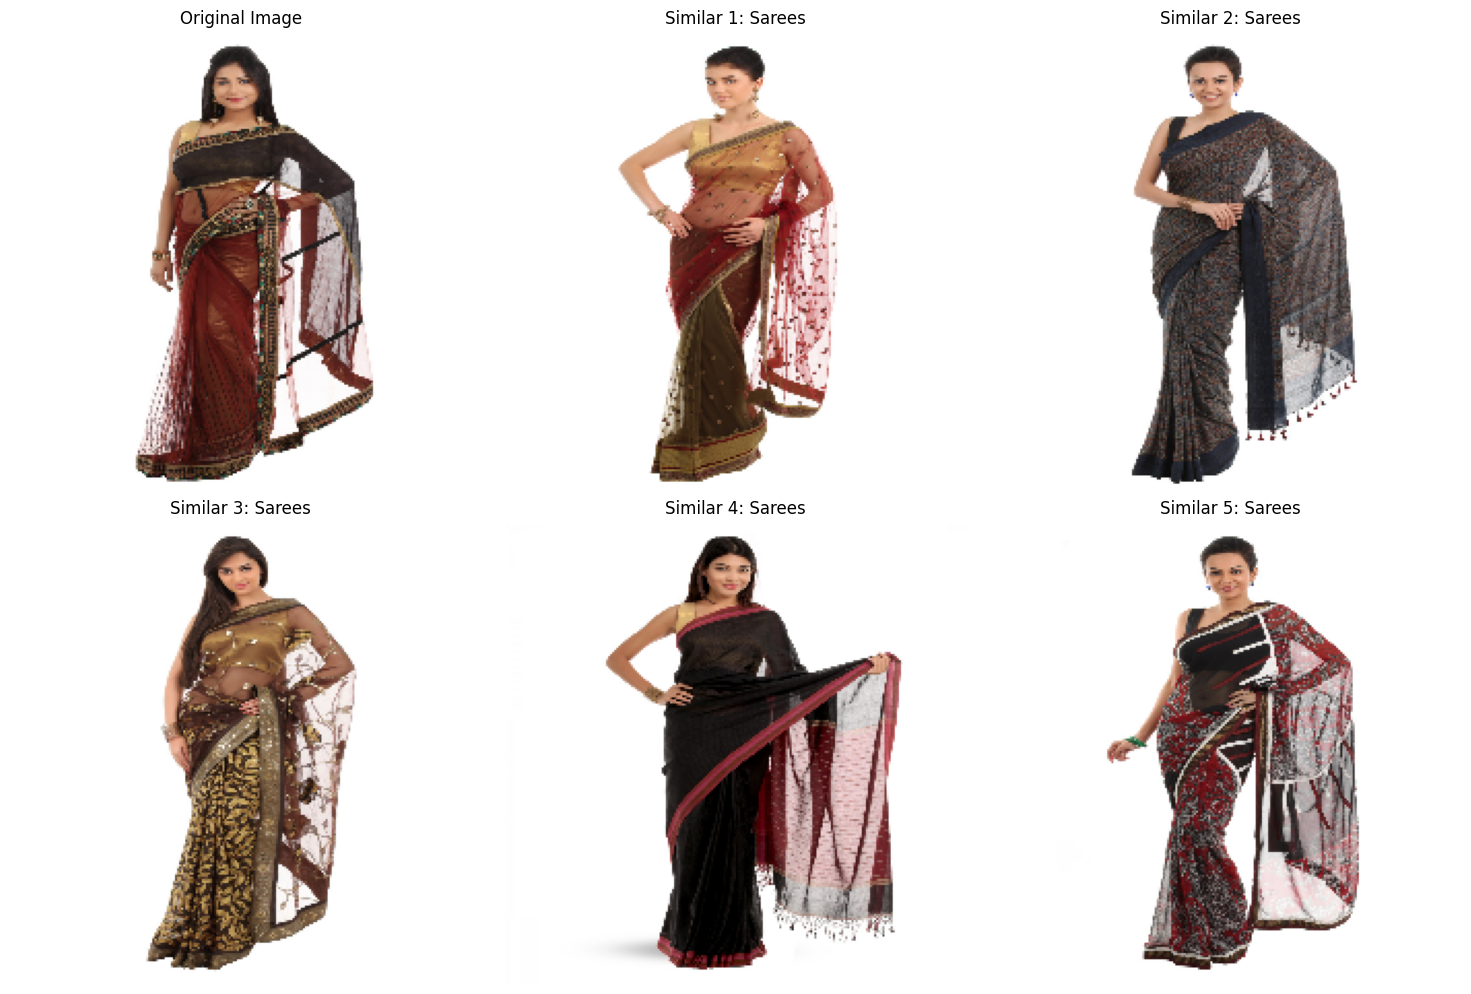

In [28]:
import matplotlib.pyplot as plt
import os
import time
start=time.time()
# number = 25
# p = os.listdir('data/fashion-dataset/fashion-dataset/val_finetune/Sarees')[number]
p='53020.jpg'
path_sub = f"data/fashion-dataset/fashion-dataset/val_finetune/Sarees/{p}"
out_imag, lab = retrieve_similar_images(
    load_and_preprocess_image(path_sub, target_size=IMG_SIZE),
    nn_index,
    pca,
    train_labels,
    train_images,
    k=5
)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  
original_image = load_and_preprocess_image(path_sub, target_size=IMG_SIZE)
axes[0, 0].imshow(original_image)
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')
# Display the retrieved images
for i in range(5):
    row, col = divmod(i + 1, 3) 
    axes[row, col].imshow(out_imag[i])
    axes[row, col].set_title(f"Similar {i + 1}: {lab[i]}")
    axes[row, col].axis('off')
if len(out_imag) < 5:
    for i in range(len(out_imag) + 1, 6):
        row, col = divmod(i, 3)
        axes[row, col].axis('off')
plt.tight_layout()
plt.show()
end =time.time()



In [29]:
print(f"Total time taken for inference = {end-start}")

Total time taken for inference = 0.5741686820983887


end of method 1

Method 2: Finetune CNN (MObilenet) +PCA+NN

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def build_finetune_model(num_classes):
    base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
    x = base.output
    x = GlobalAveragePooling2D()(x)
    out = Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs=base.input, outputs=out)
    return model

Prepare dataset for training

In [67]:
import os
train_folder = "data/fashion-dataset/fashion-dataset/train_finetune"
val_folder = "data/fashion-dataset/fashion-dataset/val_finetune"

def prepare_classification_folders(df, base_folder):
    if os.path.exists(base_folder):
        shutil.rmtree(base_folder)
    os.makedirs(base_folder, exist_ok=True)

    for idx, row in df.iterrows():
        img_id = row['id']
        label = row['articleType']
        dst_dir = os.path.join(base_folder, label)
        os.makedirs(dst_dir, exist_ok=True)
        src_path = f"{SUBSET_FOLDER}/{img_id}.jpg"
        dst_path = os.path.join(dst_dir, f"{img_id}.jpg")
        if os.path.exists(src_path):
            shutil.copy(src_path, dst_path)

prepare_classification_folders(train_df, train_folder)
prepare_classification_folders(test_df, val_folder)

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

BATCH_SIZE = 32
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(224,224),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    val_folder,
    target_size=(224,224),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

num_classes = len(train_generator.class_indices)


Found 3999 images belonging to 29 classes.
Found 1000 images belonging to 29 classes.


In [68]:
model = build_finetune_model(num_classes)

# Freeze base layers initially
for layer in model.layers[:-1]:
    layer.trainable = False

model.compile(optimizer=Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

EPOCHS = 5
## due time and resource constraint i am using 5 epoch but can be increased for better results (making sure regularization is thereto handle overfiting)
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Now i Unfreeze some top layers and fine-tune further again for refinement 
for layer in model.layers[-20:]:
    layer.trainable = True

model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history_ft = model.fit(
    train_generator,
    epochs=3,
    validation_data=val_generator
)


/home/datascience/anaconda3/envs/drone/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 118s 925ms/step - accuracy: 0.5296 - loss: 1.7119 - val_accuracy: 0.8430 - val_loss: 0.4980
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 114s 912ms/step - accuracy: 0.8509 - loss: 0.4658 - val_accuracy: 0.8590 - val_loss: 0.4150
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 115s 917ms/step - accuracy: 0.8763 - loss: 0.3682 - val_accuracy: 0.8690 - val_loss: 0.4049
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 115s 918ms/step - accuracy: 0.8793 - loss: 0.3467 - val_accuracy: 0.8720 - val_loss: 0.3842
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 115s 919ms/step - accuracy: 0.9003 - loss: 0.2966 - val_accuracy: 0.8660 - val_loss: 0.3787
Epoch 1/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 124s 963ms/step - accuracy: 0.8764 - loss: 0.3924 - val_accuracy: 0.8650 - val_loss: 0.3776
Epoch 2/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 119s 954ms/step - accuracy: 0.8940 - loss: 0.3231 - val_accuracy: 0.8620 - val_loss: 0.3817
Epoch 3/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 120s 957ms/step - accuracy: 0.9022 - loss: 0

In [69]:
embedding_model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)

In [70]:
def get_embedding(img_path, model):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    img = img.astype('float32')
    img = preprocess_input(img)
    img = np.expand_dims(img, axis=0)
    embedding = model.predict(img)
    return embedding.flatten()


In [ ]:
train_embeddings = []
train_labels_finetune = []
train_paths = []

for subdir in os.listdir(train_folder):
    label_folder = os.path.join(train_folder, subdir)
    for fname in os.listdir(label_folder):
        path = os.path.join(label_folder, fname)
        emb = get_embedding(path, embedding_model)
        train_embeddings.append(emb)
        train_labels_finetune.append(subdir)  # subdir is the label
        train_paths.append(path)

train_embeddings = np.array(train_embeddings)
train_labels_finetune = np.array(train_labels_finetune)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━

In [75]:
val_embeddings = []
val_labels_finetune = []
val_paths = []

for subdir in os.listdir(val_folder):
    label_folder = os.path.join(val_folder, subdir)
    for fname in os.listdir(label_folder):
        path = os.path.join(label_folder, fname)
        emb = get_embedding(path, embedding_model)
        val_embeddings.append(emb)
        val_labels_finetune.append(subdir)
        val_paths.append(path)

val_embeddings = np.array(val_embeddings)
val_labels_finetune = np.array(val_labels_finetune)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

In [76]:
pca_dim_2 = 128
pca_2 = PCA(n_components=pca_dim_2)
train_emb_pca = pca_2.fit_transform(train_embeddings)
val_emb_pca = pca_2.transform(val_embeddings)
nn_index_2 = NearestNeighbors(n_neighbors=5, metric='euclidean')
nn_index_2.fit(train_emb_pca)


NearestNeighbors(metric='euclidean')

In [77]:
precision_at_5_ft = evaluate_retrieval(val_emb_pca, val_labels_finetune, train_emb_pca, train_labels_finetune, k=5)
print("Precision@5 (Approach 2: Fine-tuned CNN):", precision_at_5_ft)


Precision@5 (Approach 2: Fine-tuned CNN): 0.964


In [100]:
!pwd

/home/datascience/Desktop/lens


Save embeddings 

In [102]:
import joblib
import numpy as np
import cv2
# Suppose 'model' is the full classification model
# 'embedding_model' is the penultimate-layer model
embedding_model.save("m2/fine_tuned_embedding.h5")

# Save PCA
joblib.dump(pca_2, "m2/pca_2.joblib")

# Save NearestNeighbors
joblib.dump(nn_index_2, "m2/nn_index_2.joblib")

# Save train embeddings & labels
np.save("m2/train_emb_2.npy", train_emb_pca)
np.save("m2/train_labels_2.npy", train_labels_finetune)
np.save("m2/train_paths_2.npy", np.array(train_paths))  # if you want to reconstruct images


In [108]:
number = 0
p = os.listdir('data/fashion-dataset/fashion-dataset/train_finetune/Sarees')[number]
path_sub = f"data/fashion-dataset/fashion-dataset/train_finetune/Sarees/{p}"

In [109]:
path_sub

'data/fashion-dataset/fashion-dataset/train_finetune/Sarees/50907.jpg'

Load embeddings for inference

In [110]:
# Load
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

embedding_model_2 = tf.keras.models.load_model("m2/fine_tuned_embedding.h5")
pca_2_loaded = joblib.load("m2/pca_2.joblib")
nn_index_2_loaded = joblib.load("m2/nn_index_2.joblib")

train_emb_2 = np.load("m2/train_emb_2.npy")
train_labels_2 = np.load("m2/train_labels_2.npy")
train_paths_2 = np.load("m2/train_paths_2.npy", allow_pickle=True)

# Single-image embedding function
def get_finetuned_embedding(img, embedding_model):
    img_255 = img * 255.0
    img_processed = preprocess_input(img_255)
    emb = embedding_model.predict(np.expand_dims(img_processed, axis=0))
    return emb.flatten()

def retrieve_similar_images_finetuned(query_img_path, embedding_model, pca, nn_index, k=5):
    img = load_and_preprocess_image(query_img_path)  # same utility as before
    if img is None:
        return []
    emb = get_finetuned_embedding(img, embedding_model)
    emb_pca = pca.transform([emb])
    distances, indices = nn_index.kneighbors(emb_pca, n_neighbors=k)
    return indices[0], distances[0]

# Example usage
query_path =path_sub
inds, dists = retrieve_similar_images_finetuned(query_path,
                                                embedding_model_2,
                                                pca_2_loaded,
                                                nn_index_2_loaded,
                                                k=5)

print("Retrieved indices:", inds)
print("Distances:", dists)
for idx in inds:
    print("Label:", train_labels_2[idx], " - Path:", train_paths_2[idx])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step
Retrieved indices: [ 0 15 30 36 38]
Distances: [ 0.3384066   9.17641783  9.29243054  9.94726968 10.17067012]
Label: Sarees  - Path: data/fashion-dataset/fashion-dataset/train_finetune/Sarees/50907.jpg
Label: Sarees  - Path: data/fashion-dataset/fashion-dataset/train_finetune/Sarees/59646.jpg
Label: Sarees  - Path: data/fashion-dataset/fashion-dataset/train_finetune/Sarees/52906.jpg
Label: Sarees  - Path: data/fashion-dataset/fashion-dataset/train_finetune/Sarees/53019.jpg
Label: Sarees  - Path: data/fashion-dataset/fashion-dataset/train_finetune/Sarees/59655.jpg


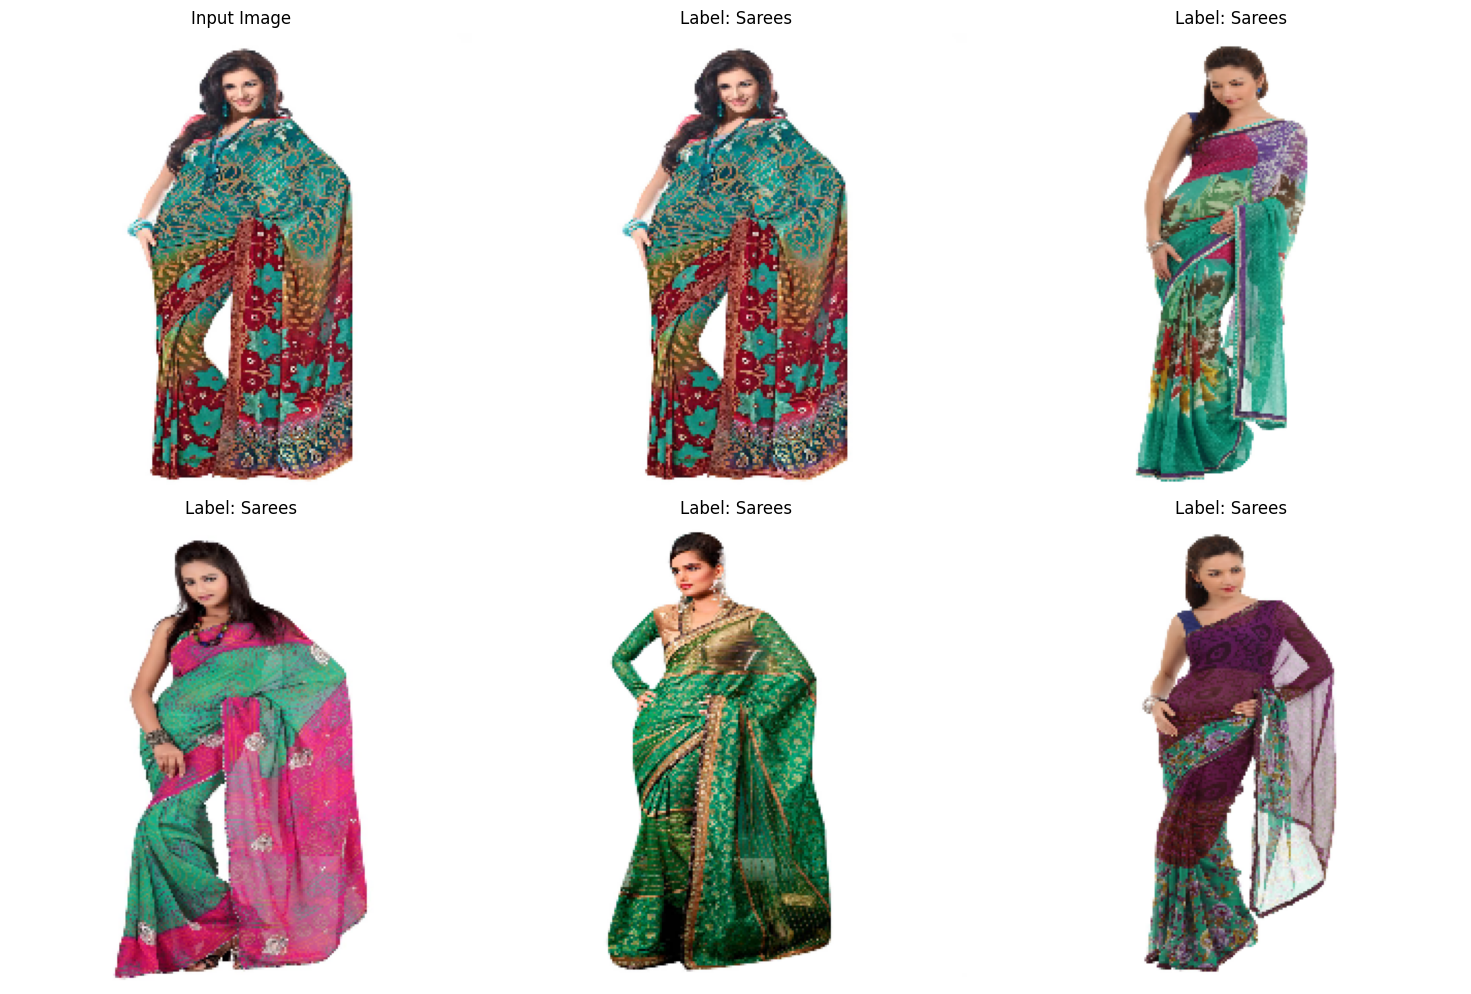

In [111]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import joblib

def plot_images_with_labels(input_img_path, retrieved_indices, labels, paths, k=5):
    """
    I used this function to plot the input image along with the k retrieved images and their labels.
    """
    input_img = load_and_preprocess_image(input_img_path)

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
    axes[0, 0].imshow(input_img)
    axes[0, 0].set_title("Input Image")
    axes[0, 0].axis('off')

    for i in range(k):
        row, col = divmod(i + 1, 3)  
        retrieved_img = load_and_preprocess_image(paths[retrieved_indices[i]])  
        axes[row, col].imshow(retrieved_img)
        axes[row, col].set_title(f"Label: {labels[retrieved_indices[i]]}")
        axes[row, col].axis('off')

    if k < 5:
        for i in range(k + 1, 6):
            row, col = divmod(i, 3)
            axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

plot_images_with_labels(
    query_path,
    inds,
    train_labels_2,
    train_paths_2,
    k=5
)


In [33]:
# Load
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import joblib
import time
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

embedding_model_2 = tf.keras.models.load_model("m2/fine_tuned_embedding.h5")
pca_2_loaded = joblib.load("m2/pca_2.joblib")
nn_index_2_loaded = joblib.load("m2/nn_index_2.joblib")

train_emb_2 = np.load("m2/train_emb_2.npy")
train_labels_2 = np.load("m2/train_labels_2.npy")
train_paths_2 = np.load("m2/train_paths_2.npy", allow_pickle=True)
start=time.time()
# Single-image embedding function
def get_finetuned_embedding(img, embedding_model):
    img_255 = img * 255.0
    img_processed = preprocess_input(img_255)
    emb = embedding_model.predict(np.expand_dims(img_processed, axis=0))
    return emb.flatten()

def retrieve_similar_images_finetuned(query_img_path, embedding_model, pca, nn_index, k=5):
    img = load_and_preprocess_image(query_img_path)  # same utility as before
    if img is None:
        return []
    emb = get_finetuned_embedding(img, embedding_model)
    emb_pca = pca.transform([emb])
    distances, indices = nn_index.kneighbors(emb_pca, n_neighbors=k)
    return indices[0], distances[0]

# Example usage
p='53020.jpg'
path_sub = f"data/fashion-dataset/fashion-dataset/val_finetune/Sarees/{p}"
query_path =path_sub
inds, dists = retrieve_similar_images_finetuned(query_path,
                                                embedding_model_2,
                                                pca_2_loaded,
                                                nn_index_2_loaded,
                                                k=5)

print("Retrieved indices:", inds)
print("Distances:", dists)
for idx in inds:
    print("Label:", train_labels_2[idx], " - Path:", train_paths_2[idx])
print(f"time = {time.time()-start}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
Retrieved indices: [31 14 17 29 12]
Distances: [11.27635131 11.74312988 12.14766864 12.30375472 12.70333978]
Label: Sarees  - Path: data/fashion-dataset/fashion-dataset/train_finetune/Sarees/53015.jpg
Label: Sarees  - Path: data/fashion-dataset/fashion-dataset/train_finetune/Sarees/49916.jpg
Label: Sarees  - Path: data/fashion-dataset/fashion-dataset/train_finetune/Sarees/59621.jpg
Label: Sarees  - Path: data/fashion-dataset/fashion-dataset/train_finetune/Sarees/52969.jpg
Label: Sarees  - Path: data/fashion-dataset/fashion-dataset/train_finetune/Sarees/46008.jpg
time = 0.6568262577056885


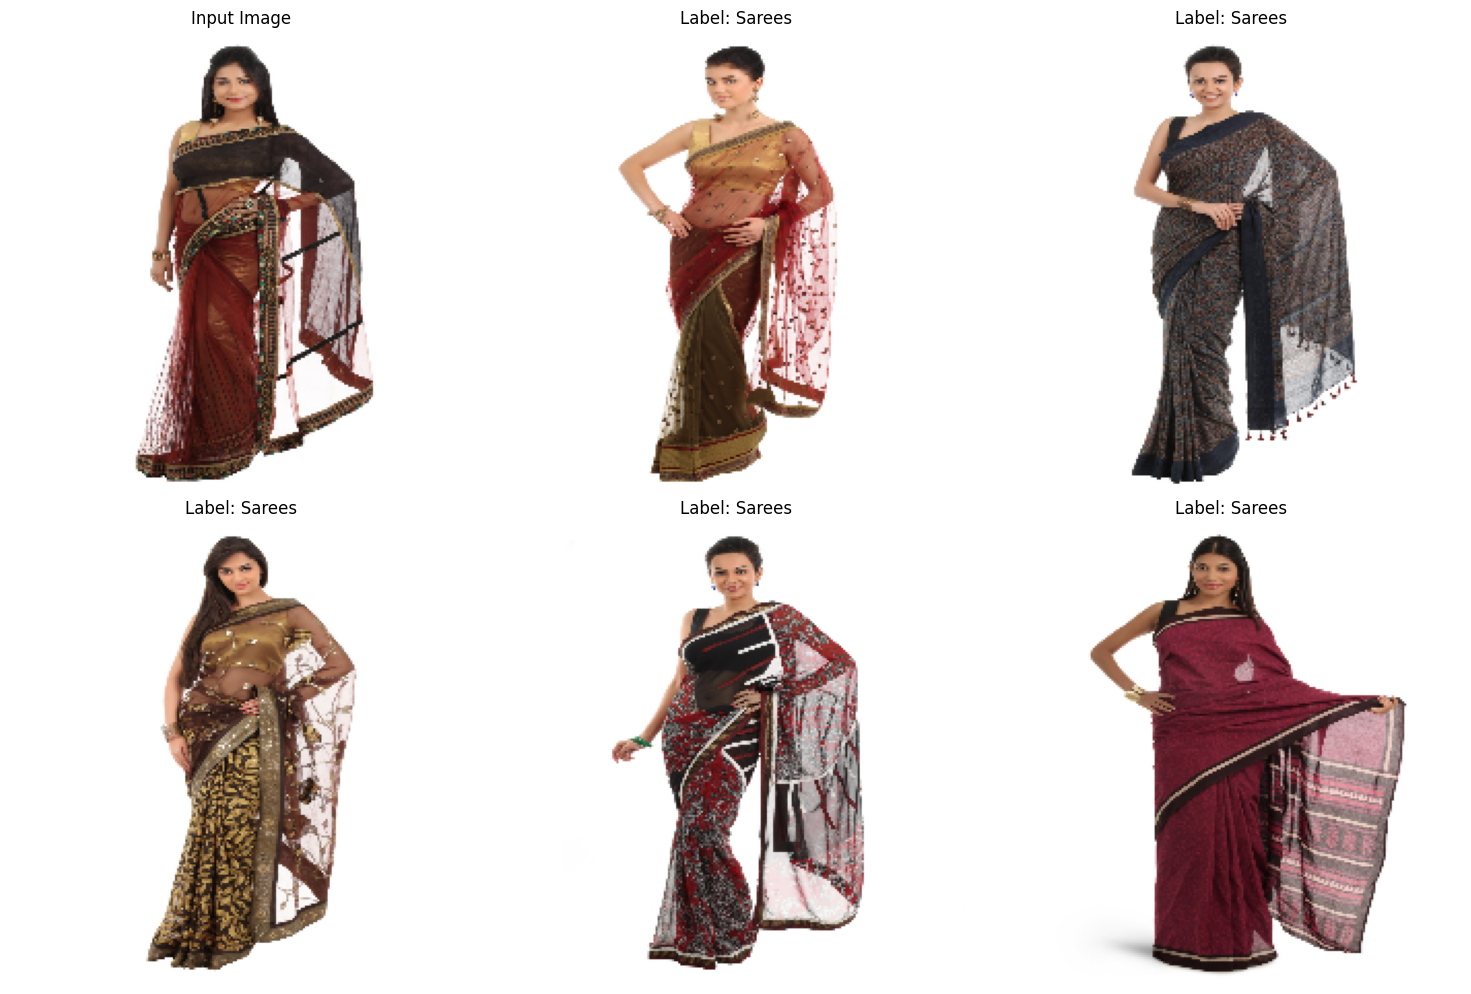

In [34]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import joblib

def plot_images_with_labels(input_img_path, retrieved_indices, labels, paths, k=5):
    """
    I used this function to plot the input image along with the k retrieved images and their labels.
    """
    input_img = load_and_preprocess_image(input_img_path)

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))  

    axes[0, 0].imshow(input_img)
    axes[0, 0].set_title("Input Image")
    axes[0, 0].axis('off')

    for i in range(k):
        row, col = divmod(i + 1, 3)
        retrieved_img = load_and_preprocess_image(paths[retrieved_indices[i]])  
        axes[row, col].imshow(retrieved_img)
        axes[row, col].set_title(f"Label: {labels[retrieved_indices[i]]}")
        axes[row, col].axis('off')

    if k < 5:
        for i in range(k + 1, 6):
            row, col = divmod(i, 3)
            axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

plot_images_with_labels(
    query_path,
    inds,
    train_labels_2,
    train_paths_2,
    k=5
)


In [112]:
#end of method 2

Method 3 : Autoencoder +PCA+NN

In [113]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_autoencoder(latent_dim=128):
    # Encoder
    encoder_input = layers.Input(shape=(224,224,3))
    x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(encoder_input)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Flatten()(x)
    latent = layers.Dense(latent_dim, activation='relu')(x)

    encoder = models.Model(encoder_input, latent, name='encoder')

    # Decoder
    decoder_input = layers.Input(shape=(latent_dim,))
    x = layers.Dense((224//8)*(224//8)*128, activation='relu')(decoder_input)
    x = layers.Reshape((224//8, 224//8, 128))(x)
    x = layers.Conv2DTranspose(128, (3,3), strides=2, activation='relu', padding='same')(x)
    x = layers.Conv2DTranspose(64, (3,3), strides=2, activation='relu', padding='same')(x)
    x = layers.Conv2DTranspose(32, (3,3), strides=2, activation='relu', padding='same')(x)
    decoder_output = layers.Conv2D(3, (3,3), activation='sigmoid', padding='same')(x)

    decoder = models.Model(decoder_input, decoder_output, name='decoder')

    autoencoder = models.Model(encoder_input, decoder(encoder(encoder_input)), name='autoencoder')

    return encoder, decoder, autoencoder

encoder, decoder, autoencoder = build_autoencoder(latent_dim=128)
autoencoder.summary()


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 128)            │    12,938,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 224, 224, 3)    │    13,186,115 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,124,547 (99.66 MB)

 Trainable params: 26,124,547 (99.66 MB)

 Non-trainable params: 0 (0.00 B)

In [116]:
val_folder,train_folder

('data/fashion-dataset/fashion-dataset/val_finetune',
 'data/fashion-dataset/fashion-dataset/train_finetune')

In [118]:
ae_train_datagen = ImageDataGenerator(rescale=1./255)
ae_val_datagen = ImageDataGenerator(rescale=1./255)

ae_train_generator = ae_train_datagen.flow_from_directory(
    train_folder, 
    target_size=(224,224),
    batch_size=BATCH_SIZE,
    class_mode='input'
)
ae_val_generator = ae_val_datagen.flow_from_directory(
    val_folder,
    target_size=(224,224),
    batch_size=BATCH_SIZE,
    class_mode='input'
)

autoencoder.compile(optimizer='adam', loss='mse')
history_ae = autoencoder.fit(
    ae_train_generator,
    validation_data=ae_val_generator,
    epochs=7
)


Found 3999 images belonging to 29 classes.
Found 1000 images belonging to 29 classes.
Epoch 1/7
125/125 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - loss: 0.0288 - val_loss: 0.0180
Epoch 2/7
125/125 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - loss: 0.0168 - val_loss: 0.0173
Epoch 3/7
125/125 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - loss: 0.0158 - val_loss: 0.0166
Epoch 4/7
125/125 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - loss: 0.0149 - val_loss: 0.0159
Epoch 5/7
125/125 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - loss: 0.0144 - val_loss: 0.0157
Epoch 6/7
125/125 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - loss: 0.0141 - val_loss: 0.0150
Epoch 7/7
125/125 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - loss: 0.0133 - val_loss: 0.0143


In [40]:

# train_ae_paths = []  
# for idx, row in train_df.iterrows():
#     img_id = row['id']
#     label = row['articleType']
#     path = f"{SUBSET_FOLDER}/{img_id}.jpg"
#     train_ae_paths.append(path)
# train_ae_paths = np.array(train_ae_paths)



In [ ]:
train_ae_embeddings = []
train_ae_labels = []
train_ae_paths = []  

for idx, row in train_df.iterrows():
    img_id = row['id']
    label = row['articleType']
    path = f"{SUBSET_FOLDER}/{img_id}.jpg"
    img = load_and_preprocess_image(path)
    if img is None:
        continue
    
    emb = encoder.predict(np.expand_dims(img, axis=0))
    
    train_ae_embeddings.append(emb.flatten())
    train_ae_labels.append(label)
    train_ae_paths.append(path) 

train_ae_embeddings = np.array(train_ae_embeddings)
train_ae_labels = np.array(train_ae_labels)
train_ae_paths = np.array(train_ae_paths)

val_ae_embeddings = []
val_ae_labels = []
for idx, row in tqdm(test_df.iterrows(), total=len(test_df)):
    img_id = row['id']
    label = row['articleType']
    path = f"{SUBSET_FOLDER}/{img_id}.jpg"
    img = load_and_preprocess_image(path)
    if img is None:
        continue
    emb = encoder.predict(np.expand_dims(img, axis=0))
    val_ae_embeddings.append(emb.flatten())
    val_ae_labels.append(label)

val_ae_embeddings = np.array(val_ae_embeddings)
val_ae_labels = np.array(val_ae_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

[ WARN:0@20666.189] global loadsave.cpp:241 findDecoder imread_('data/fashion-dataset/fashion-dataset/images_subset/39401.jpg'): can't open/read file: check file path/integrity


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

  0%|                                                                                          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  0%|▏                                                                                 | 2/1000 [00:00<01:08, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  0%|▎                                                                                 | 4/1000 [00:00<01:12, 13.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  1%|▍                                                                                 | 6/1000 [00:00<01:08, 14.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  1%|▋                                                                                 | 8/1000 [00:00<01:07, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  1%|▊                                                                                | 10/1000 [00:00<01:08, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  1%|▉                                                                                | 12/1000 [00:00<01:07, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  1%|█▏                                                                               | 14/1000 [00:00<01:08, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  2%|█▎                                                                               | 16/1000 [00:01<01:06, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  2%|█▍                                                                               | 18/1000 [00:01<01:06, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  2%|█▌                                                                               | 20/1000 [00:01<01:07, 14.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  2%|█▊                                                                               | 22/1000 [00:01<01:07, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  2%|█▉                                                                               | 24/1000 [00:01<01:09, 14.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  3%|██                                                                               | 26/1000 [00:01<01:07, 14.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  3%|██▎                                                                              | 28/1000 [00:01<01:04, 15.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  3%|██▍                                                                              | 30/1000 [00:02<01:03, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  3%|██▌                                                                              | 32/1000 [00:02<01:04, 15.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  3%|██▊                                                                              | 34/1000 [00:02<01:04, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  4%|██▉                                                                              | 36/1000 [00:02<01:05, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  4%|███                                                                              | 38/1000 [00:02<01:04, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  4%|███▏                                                                             | 40/1000 [00:02<01:04, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  4%|███▍                                                                             | 42/1000 [00:02<01:06, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  4%|███▌                                                                             | 44/1000 [00:03<01:05, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  5%|███▋                                                                             | 46/1000 [00:03<01:05, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  5%|███▉                                                                             | 48/1000 [00:03<01:02, 15.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  5%|████                                                                             | 50/1000 [00:03<01:02, 15.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  5%|████▏                                                                            | 52/1000 [00:03<01:04, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  5%|████▎                                                                            | 54/1000 [00:03<01:04, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  6%|████▌                                                                            | 56/1000 [00:03<01:02, 15.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  6%|████▋                                                                            | 58/1000 [00:03<01:03, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  6%|████▊                                                                            | 60/1000 [00:04<01:02, 15.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  6%|█████                                                                            | 62/1000 [00:04<01:02, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  6%|█████▏                                                                           | 64/1000 [00:04<01:01, 15.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  7%|█████▎                                                                           | 66/1000 [00:04<01:02, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  7%|█████▌                                                                           | 68/1000 [00:04<01:02, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  7%|█████▋                                                                           | 70/1000 [00:04<01:01, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  7%|█████▊                                                                           | 72/1000 [00:04<01:01, 15.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  7%|█████▉                                                                           | 74/1000 [00:04<01:01, 15.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  8%|██████▏                                                                          | 76/1000 [00:05<00:59, 15.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  8%|██████▎                                                                          | 78/1000 [00:05<00:59, 15.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  8%|██████▍                                                                          | 80/1000 [00:05<01:01, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  8%|██████▋                                                                          | 82/1000 [00:05<01:00, 15.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  8%|██████▊                                                                          | 84/1000 [00:05<01:00, 15.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  9%|██████▉                                                                          | 86/1000 [00:05<01:01, 14.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  9%|███████▏                                                                         | 88/1000 [00:05<01:03, 14.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  9%|███████▎                                                                         | 90/1000 [00:06<01:02, 14.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  9%|███████▍                                                                         | 92/1000 [00:06<01:02, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  9%|███████▌                                                                         | 94/1000 [00:06<01:02, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 10%|███████▊                                                                         | 96/1000 [00:06<01:01, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 10%|███████▉                                                                         | 98/1000 [00:06<01:00, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 10%|████████                                                                        | 100/1000 [00:06<00:59, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 10%|████████▏                                                                       | 102/1000 [00:06<01:01, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 10%|████████▎                                                                       | 104/1000 [00:07<00:59, 15.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 11%|████████▍                                                                       | 106/1000 [00:07<00:58, 15.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 11%|████████▋                                                                       | 108/1000 [00:07<00:58, 15.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 11%|████████▊                                                                       | 110/1000 [00:07<01:00, 14.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 11%|████████▉                                                                       | 112/1000 [00:07<01:00, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 11%|█████████                                                                       | 114/1000 [00:07<00:59, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 12%|█████████▎                                                                      | 116/1000 [00:07<01:00, 14.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 12%|█████████▍                                                                      | 118/1000 [00:07<00:59, 14.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 12%|█████████▌                                                                      | 120/1000 [00:08<00:58, 15.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 12%|█████████▊                                                                      | 122/1000 [00:08<00:57, 15.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 12%|█████████▉                                                                      | 124/1000 [00:08<00:56, 15.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 13%|██████████                                                                      | 126/1000 [00:08<00:56, 15.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 13%|██████████▏                                                                     | 128/1000 [00:08<00:56, 15.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 13%|██████████▍                                                                     | 130/1000 [00:08<00:56, 15.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 13%|██████████▌                                                                     | 132/1000 [00:08<00:56, 15.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 13%|██████████▋                                                                     | 134/1000 [00:08<00:54, 15.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 14%|██████████▉                                                                     | 136/1000 [00:09<00:58, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 14%|███████████                                                                     | 138/1000 [00:09<00:58, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 14%|███████████▏                                                                    | 140/1000 [00:09<00:57, 14.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 14%|███████████▎                                                                    | 142/1000 [00:09<00:59, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 14%|███████████▌                                                                    | 144/1000 [00:09<00:57, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 15%|███████████▋                                                                    | 146/1000 [00:09<00:58, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 15%|███████████▊                                                                    | 148/1000 [00:09<00:57, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 15%|████████████                                                                    | 150/1000 [00:10<00:58, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 15%|████████████▏                                                                   | 152/1000 [00:10<00:58, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 15%|████████████▎                                                                   | 154/1000 [00:10<00:59, 14.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 16%|████████████▍                                                                   | 156/1000 [00:10<00:57, 14.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 16%|████████████▋                                                                   | 158/1000 [00:10<00:58, 14.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 16%|████████████▊                                                                   | 160/1000 [00:10<00:56, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 16%|████████████▉                                                                   | 162/1000 [00:10<00:56, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 16%|█████████████                                                                   | 164/1000 [00:11<00:57, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 17%|█████████████▎                                                                  | 166/1000 [00:11<00:56, 14.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 17%|█████████████▍                                                                  | 168/1000 [00:11<00:57, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 17%|█████████████▌                                                                  | 170/1000 [00:11<00:54, 15.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 17%|█████████████▊                                                                  | 172/1000 [00:11<00:56, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 17%|█████████████▉                                                                  | 174/1000 [00:11<00:57, 14.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 18%|██████████████                                                                  | 176/1000 [00:11<00:56, 14.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 18%|██████████████▏                                                                 | 178/1000 [00:12<00:59, 13.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 18%|██████████████▍                                                                 | 180/1000 [00:12<00:56, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 18%|██████████████▌                                                                 | 182/1000 [00:12<00:55, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 18%|██████████████▋                                                                 | 184/1000 [00:12<00:53, 15.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 19%|██████████████▉                                                                 | 186/1000 [00:12<00:53, 15.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 19%|███████████████                                                                 | 188/1000 [00:12<00:54, 14.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 19%|███████████████▏                                                                | 190/1000 [00:12<00:54, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 19%|███████████████▎                                                                | 192/1000 [00:12<00:52, 15.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 19%|███████████████▌                                                                | 194/1000 [00:13<00:50, 15.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 20%|███████████████▋                                                                | 196/1000 [00:13<00:50, 15.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 20%|███████████████▊                                                                | 198/1000 [00:13<00:51, 15.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 20%|████████████████                                                                | 200/1000 [00:13<00:55, 14.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 20%|████████████████▏                                                               | 202/1000 [00:13<00:53, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 20%|████████████████▎                                                               | 204/1000 [00:13<00:52, 15.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 21%|████████████████▍                                                               | 206/1000 [00:13<00:51, 15.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 21%|████████████████▋                                                               | 208/1000 [00:13<00:51, 15.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 21%|████████████████▊                                                               | 210/1000 [00:14<00:53, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 21%|████████████████▉                                                               | 212/1000 [00:14<00:52, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 21%|█████████████████                                                               | 214/1000 [00:14<00:51, 15.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 22%|█████████████████▎                                                              | 216/1000 [00:14<00:51, 15.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 22%|█████████████████▍                                                              | 218/1000 [00:14<00:51, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 22%|█████████████████▌                                                              | 220/1000 [00:14<00:50, 15.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 22%|█████████████████▊                                                              | 222/1000 [00:14<00:50, 15.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 22%|█████████████████▉                                                              | 224/1000 [00:15<00:50, 15.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 23%|██████████████████                                                              | 226/1000 [00:15<00:49, 15.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 23%|██████████████████▏                                                             | 228/1000 [00:15<00:51, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 23%|██████████████████▍                                                             | 230/1000 [00:15<00:52, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 23%|██████████████████▌                                                             | 232/1000 [00:15<00:52, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 23%|██████████████████▋                                                             | 234/1000 [00:15<00:51, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 24%|██████████████████▉                                                             | 236/1000 [00:15<00:53, 14.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 24%|███████████████████                                                             | 238/1000 [00:15<00:52, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 24%|███████████████████▏                                                            | 240/1000 [00:16<00:52, 14.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 24%|███████████████████▎                                                            | 242/1000 [00:16<00:51, 14.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 24%|███████████████████▌                                                            | 244/1000 [00:16<00:50, 15.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 25%|███████████████████▋                                                            | 246/1000 [00:16<00:49, 15.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 25%|███████████████████▊                                                            | 248/1000 [00:16<00:49, 15.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 25%|████████████████████                                                            | 250/1000 [00:16<00:49, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 25%|████████████████████▏                                                           | 252/1000 [00:16<00:48, 15.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 25%|████████████████████▎                                                           | 254/1000 [00:17<00:48, 15.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 26%|████████████████████▍                                                           | 256/1000 [00:17<00:48, 15.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 26%|████████████████████▋                                                           | 258/1000 [00:17<00:48, 15.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 26%|████████████████████▊                                                           | 260/1000 [00:17<00:47, 15.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 26%|████████████████████▉                                                           | 262/1000 [00:17<00:47, 15.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 26%|█████████████████████                                                           | 264/1000 [00:17<00:46, 15.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 27%|█████████████████████▎                                                          | 266/1000 [00:17<00:46, 15.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 27%|█████████████████████▍                                                          | 268/1000 [00:17<00:46, 15.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 27%|█████████████████████▌                                                          | 270/1000 [00:18<00:47, 15.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 27%|█████████████████████▊                                                          | 272/1000 [00:18<00:48, 14.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 27%|█████████████████████▉                                                          | 274/1000 [00:18<00:48, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 28%|██████████████████████                                                          | 276/1000 [00:18<00:47, 15.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 28%|██████████████████████▏                                                         | 278/1000 [00:18<00:48, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 28%|██████████████████████▍                                                         | 280/1000 [00:18<00:47, 15.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 28%|██████████████████████▌                                                         | 282/1000 [00:18<00:47, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 28%|██████████████████████▋                                                         | 284/1000 [00:18<00:46, 15.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 29%|██████████████████████▉                                                         | 286/1000 [00:19<00:47, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 29%|███████████████████████                                                         | 288/1000 [00:19<00:46, 15.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 29%|███████████████████████▏                                                        | 290/1000 [00:19<00:45, 15.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 29%|███████████████████████▎                                                        | 292/1000 [00:19<00:46, 15.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 29%|███████████████████████▌                                                        | 294/1000 [00:19<00:45, 15.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 30%|███████████████████████▋                                                        | 296/1000 [00:19<00:45, 15.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 30%|███████████████████████▊                                                        | 298/1000 [00:19<00:47, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 30%|████████████████████████                                                        | 300/1000 [00:20<00:46, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 30%|████████████████████████▏                                                       | 302/1000 [00:20<00:45, 15.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 30%|████████████████████████▎                                                       | 304/1000 [00:20<00:44, 15.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 31%|████████████████████████▍                                                       | 306/1000 [00:20<00:44, 15.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 31%|████████████████████████▋                                                       | 308/1000 [00:20<00:43, 15.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 31%|████████████████████████▊                                                       | 310/1000 [00:20<00:45, 15.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 31%|████████████████████████▉                                                       | 312/1000 [00:20<00:44, 15.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 31%|█████████████████████████                                                       | 314/1000 [00:20<00:42, 15.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 32%|█████████████████████████▎                                                      | 316/1000 [00:21<00:45, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 32%|█████████████████████████▍                                                      | 318/1000 [00:21<00:44, 15.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 32%|█████████████████████████▌                                                      | 320/1000 [00:21<00:44, 15.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 32%|█████████████████████████▊                                                      | 322/1000 [00:21<00:43, 15.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 32%|█████████████████████████▉                                                      | 324/1000 [00:21<00:44, 15.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 33%|██████████████████████████                                                      | 326/1000 [00:21<00:44, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 33%|██████████████████████████▏                                                     | 328/1000 [00:21<00:42, 15.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 33%|██████████████████████████▍                                                     | 330/1000 [00:21<00:42, 15.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 33%|██████████████████████████▌                                                     | 332/1000 [00:22<00:43, 15.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 33%|██████████████████████████▋                                                     | 334/1000 [00:22<00:43, 15.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 34%|██████████████████████████▉                                                     | 336/1000 [00:22<00:42, 15.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 34%|███████████████████████████                                                     | 338/1000 [00:22<00:43, 15.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 34%|███████████████████████████▏                                                    | 340/1000 [00:22<00:41, 15.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|███████████████████████████▎                                                    | 342/1000 [00:22<00:42, 15.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|███████████████████████████▌                                                    | 344/1000 [00:22<00:42, 15.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 35%|███████████████████████████▋                                                    | 346/1000 [00:23<00:43, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 35%|███████████████████████████▊                                                    | 348/1000 [00:23<00:42, 15.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 35%|████████████████████████████                                                    | 350/1000 [00:23<00:42, 15.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 35%|████████████████████████████▏                                                   | 352/1000 [00:23<00:41, 15.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 35%|████████████████████████████▎                                                   | 354/1000 [00:23<00:42, 15.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 36%|████████████████████████████▍                                                   | 356/1000 [00:23<00:41, 15.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 36%|████████████████████████████▋                                                   | 358/1000 [00:23<00:41, 15.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 36%|████████████████████████████▊                                                   | 360/1000 [00:23<00:40, 15.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 36%|████████████████████████████▉                                                   | 362/1000 [00:24<00:39, 16.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 36%|█████████████████████████████                                                   | 364/1000 [00:24<00:40, 15.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 37%|█████████████████████████████▎                                                  | 366/1000 [00:24<00:41, 15.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 37%|█████████████████████████████▍                                                  | 368/1000 [00:24<00:40, 15.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 37%|█████████████████████████████▌                                                  | 370/1000 [00:24<00:40, 15.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 37%|█████████████████████████████▊                                                  | 372/1000 [00:24<00:40, 15.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 37%|█████████████████████████████▉                                                  | 374/1000 [00:24<00:40, 15.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 38%|██████████████████████████████                                                  | 376/1000 [00:24<00:39, 15.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 38%|██████████████████████████████▏                                                 | 378/1000 [00:25<00:40, 15.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 38%|██████████████████████████████▍                                                 | 380/1000 [00:25<00:40, 15.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 38%|██████████████████████████████▌                                                 | 382/1000 [00:25<00:40, 15.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 38%|██████████████████████████████▋                                                 | 384/1000 [00:25<00:39, 15.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 39%|██████████████████████████████▉                                                 | 386/1000 [00:25<00:38, 15.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 39%|███████████████████████████████                                                 | 388/1000 [00:25<00:39, 15.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 39%|███████████████████████████████▏                                                | 390/1000 [00:25<00:39, 15.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 39%|███████████████████████████████▎                                                | 392/1000 [00:25<00:40, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 39%|███████████████████████████████▌                                                | 394/1000 [00:26<00:41, 14.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 40%|███████████████████████████████▋                                                | 396/1000 [00:26<00:39, 15.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 40%|███████████████████████████████▊                                                | 398/1000 [00:26<00:39, 15.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 40%|████████████████████████████████                                                | 400/1000 [00:26<00:38, 15.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 40%|████████████████████████████████▏                                               | 402/1000 [00:26<00:39, 14.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 40%|████████████████████████████████▎                                               | 404/1000 [00:26<00:39, 15.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 41%|████████████████████████████████▍                                               | 406/1000 [00:26<00:39, 15.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 41%|████████████████████████████████▋                                               | 408/1000 [00:27<00:39, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 41%|████████████████████████████████▊                                               | 410/1000 [00:27<00:38, 15.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 41%|████████████████████████████████▉                                               | 412/1000 [00:27<00:37, 15.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 41%|█████████████████████████████████                                               | 414/1000 [00:27<00:37, 15.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 42%|█████████████████████████████████▎                                              | 416/1000 [00:27<00:38, 14.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 42%|█████████████████████████████████▍                                              | 418/1000 [00:27<00:39, 14.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 42%|█████████████████████████████████▌                                              | 420/1000 [00:27<00:39, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 42%|█████████████████████████████████▊                                              | 422/1000 [00:27<00:37, 15.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 42%|█████████████████████████████████▉                                              | 424/1000 [00:28<00:36, 15.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 43%|██████████████████████████████████                                              | 426/1000 [00:28<00:37, 15.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 43%|██████████████████████████████████▏                                             | 428/1000 [00:28<00:37, 15.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 43%|██████████████████████████████████▍                                             | 430/1000 [00:28<00:38, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 43%|██████████████████████████████████▌                                             | 432/1000 [00:28<00:38, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 43%|██████████████████████████████████▋                                             | 434/1000 [00:28<00:36, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 44%|██████████████████████████████████▉                                             | 436/1000 [00:28<00:37, 15.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 44%|███████████████████████████████████                                             | 438/1000 [00:29<00:36, 15.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 44%|███████████████████████████████████▏                                            | 440/1000 [00:29<00:36, 15.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 44%|███████████████████████████████████▎                                            | 442/1000 [00:29<00:36, 15.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 44%|███████████████████████████████████▌                                            | 444/1000 [00:29<00:36, 15.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 45%|███████████████████████████████████▋                                            | 446/1000 [00:29<00:35, 15.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 45%|███████████████████████████████████▊                                            | 448/1000 [00:29<00:35, 15.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|████████████████████████████████████                                            | 450/1000 [00:29<00:35, 15.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|████████████████████████████████████▏                                           | 452/1000 [00:29<00:34, 15.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|████████████████████████████████████▎                                           | 454/1000 [00:30<00:36, 15.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 46%|████████████████████████████████████▍                                           | 456/1000 [00:30<00:34, 15.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 46%|████████████████████████████████████▋                                           | 458/1000 [00:30<00:34, 15.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 46%|████████████████████████████████████▊                                           | 460/1000 [00:30<00:33, 16.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 46%|████████████████████████████████████▉                                           | 462/1000 [00:30<00:34, 15.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 46%|█████████████████████████████████████                                           | 464/1000 [00:30<00:35, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 47%|█████████████████████████████████████▎                                          | 466/1000 [00:30<00:36, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 47%|█████████████████████████████████████▍                                          | 468/1000 [00:30<00:35, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 47%|█████████████████████████████████████▌                                          | 470/1000 [00:31<00:35, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 47%|█████████████████████████████████████▊                                          | 472/1000 [00:31<00:34, 15.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 47%|█████████████████████████████████████▉                                          | 474/1000 [00:31<00:35, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 48%|██████████████████████████████████████                                          | 476/1000 [00:31<00:35, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 48%|██████████████████████████████████████▏                                         | 478/1000 [00:31<00:34, 15.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 48%|██████████████████████████████████████▍                                         | 480/1000 [00:31<00:33, 15.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 48%|██████████████████████████████████████▌                                         | 482/1000 [00:31<00:33, 15.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 48%|██████████████████████████████████████▋                                         | 484/1000 [00:32<00:32, 16.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 49%|██████████████████████████████████████▉                                         | 486/1000 [00:32<00:32, 15.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 49%|███████████████████████████████████████                                         | 488/1000 [00:32<00:32, 15.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 49%|███████████████████████████████████████▏                                        | 490/1000 [00:32<00:34, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 49%|███████████████████████████████████████▎                                        | 492/1000 [00:32<00:33, 15.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 49%|███████████████████████████████████████▌                                        | 494/1000 [00:32<00:33, 15.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 50%|███████████████████████████████████████▋                                        | 496/1000 [00:32<00:33, 15.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 50%|███████████████████████████████████████▊                                        | 498/1000 [00:32<00:32, 15.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 50%|████████████████████████████████████████                                        | 500/1000 [00:33<00:33, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 50%|████████████████████████████████████████▏                                       | 502/1000 [00:33<00:34, 14.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 50%|████████████████████████████████████████▎                                       | 504/1000 [00:33<00:34, 14.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 51%|████████████████████████████████████████▍                                       | 506/1000 [00:33<00:34, 14.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 51%|████████████████████████████████████████▋                                       | 508/1000 [00:33<00:33, 14.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 51%|████████████████████████████████████████▊                                       | 510/1000 [00:33<00:33, 14.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 51%|████████████████████████████████████████▉                                       | 512/1000 [00:33<00:33, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 51%|█████████████████████████████████████████                                       | 514/1000 [00:34<00:32, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 52%|█████████████████████████████████████████▎                                      | 516/1000 [00:34<00:31, 15.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 52%|█████████████████████████████████████████▍                                      | 518/1000 [00:34<00:31, 15.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 52%|█████████████████████████████████████████▌                                      | 520/1000 [00:34<00:30, 15.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 52%|█████████████████████████████████████████▊                                      | 522/1000 [00:34<00:31, 15.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 52%|█████████████████████████████████████████▉                                      | 524/1000 [00:34<00:31, 15.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 53%|██████████████████████████████████████████                                      | 526/1000 [00:34<00:31, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 53%|██████████████████████████████████████████▏                                     | 528/1000 [00:34<00:31, 14.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 53%|██████████████████████████████████████████▍                                     | 530/1000 [00:35<00:32, 14.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 53%|██████████████████████████████████████████▌                                     | 532/1000 [00:35<00:31, 14.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 53%|██████████████████████████████████████████▋                                     | 534/1000 [00:35<00:32, 14.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 54%|██████████████████████████████████████████▉                                     | 536/1000 [00:35<00:31, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 54%|███████████████████████████████████████████                                     | 538/1000 [00:35<00:31, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 54%|███████████████████████████████████████████▏                                    | 540/1000 [00:35<00:30, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 54%|███████████████████████████████████████████▎                                    | 542/1000 [00:35<00:30, 15.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 54%|███████████████████████████████████████████▌                                    | 544/1000 [00:36<00:30, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 55%|███████████████████████████████████████████▋                                    | 546/1000 [00:36<00:30, 14.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 55%|███████████████████████████████████████████▊                                    | 548/1000 [00:36<00:30, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 55%|████████████████████████████████████████████                                    | 550/1000 [00:36<00:30, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 55%|████████████████████████████████████████████▏                                   | 552/1000 [00:36<00:30, 14.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 55%|████████████████████████████████████████████▎                                   | 554/1000 [00:36<00:30, 14.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 56%|████████████████████████████████████████████▍                                   | 556/1000 [00:36<00:28, 15.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 56%|████████████████████████████████████████████▋                                   | 558/1000 [00:36<00:29, 15.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 56%|████████████████████████████████████████████▊                                   | 560/1000 [00:37<00:28, 15.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 56%|████████████████████████████████████████████▉                                   | 562/1000 [00:37<00:28, 15.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 56%|█████████████████████████████████████████████                                   | 564/1000 [00:37<00:27, 15.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 57%|█████████████████████████████████████████████▎                                  | 566/1000 [00:37<00:27, 15.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 57%|█████████████████████████████████████████████▍                                  | 568/1000 [00:37<00:26, 16.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 57%|█████████████████████████████████████████████▌                                  | 570/1000 [00:37<00:26, 16.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 57%|█████████████████████████████████████████████▊                                  | 572/1000 [00:37<00:27, 15.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 57%|█████████████████████████████████████████████▉                                  | 574/1000 [00:37<00:27, 15.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 58%|██████████████████████████████████████████████                                  | 576/1000 [00:38<00:26, 16.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 58%|██████████████████████████████████████████████▏                                 | 578/1000 [00:38<00:25, 16.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 58%|██████████████████████████████████████████████▍                                 | 580/1000 [00:38<00:25, 16.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 58%|██████████████████████████████████████████████▌                                 | 582/1000 [00:38<00:26, 16.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 58%|██████████████████████████████████████████████▋                                 | 584/1000 [00:38<00:26, 15.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 59%|██████████████████████████████████████████████▉                                 | 586/1000 [00:38<00:26, 15.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 59%|███████████████████████████████████████████████                                 | 588/1000 [00:38<00:27, 15.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 59%|███████████████████████████████████████████████▏                                | 590/1000 [00:38<00:26, 15.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 59%|███████████████████████████████████████████████▎                                | 592/1000 [00:39<00:25, 15.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 59%|███████████████████████████████████████████████▌                                | 594/1000 [00:39<00:25, 15.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 60%|███████████████████████████████████████████████▋                                | 596/1000 [00:39<00:25, 15.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 60%|███████████████████████████████████████████████▊                                | 598/1000 [00:39<00:25, 16.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 60%|████████████████████████████████████████████████                                | 600/1000 [00:39<00:25, 15.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 60%|████████████████████████████████████████████████▏                               | 602/1000 [00:39<00:24, 16.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 60%|████████████████████████████████████████████████▎                               | 604/1000 [00:39<00:25, 15.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 61%|████████████████████████████████████████████████▍                               | 606/1000 [00:40<00:25, 15.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 61%|████████████████████████████████████████████████▋                               | 608/1000 [00:40<00:25, 15.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 61%|████████████████████████████████████████████████▊                               | 610/1000 [00:40<00:25, 15.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 61%|████████████████████████████████████████████████▉                               | 612/1000 [00:40<00:24, 15.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 61%|█████████████████████████████████████████████████                               | 614/1000 [00:40<00:24, 15.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 62%|█████████████████████████████████████████████████▎                              | 616/1000 [00:40<00:24, 15.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 62%|█████████████████████████████████████████████████▍                              | 618/1000 [00:40<00:25, 15.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 62%|█████████████████████████████████████████████████▌                              | 620/1000 [00:40<00:25, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 62%|█████████████████████████████████████████████████▊                              | 622/1000 [00:41<00:25, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 62%|█████████████████████████████████████████████████▉                              | 624/1000 [00:41<00:24, 15.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 63%|██████████████████████████████████████████████████                              | 626/1000 [00:41<00:24, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 63%|██████████████████████████████████████████████████▏                             | 628/1000 [00:41<00:24, 15.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 63%|██████████████████████████████████████████████████▍                             | 630/1000 [00:41<00:28, 12.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 63%|██████████████████████████████████████████████████▌                             | 632/1000 [00:41<00:27, 13.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 63%|██████████████████████████████████████████████████▋                             | 634/1000 [00:41<00:26, 13.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 64%|██████████████████████████████████████████████████▉                             | 636/1000 [00:42<00:25, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 64%|███████████████████████████████████████████████████                             | 638/1000 [00:42<00:24, 14.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 64%|███████████████████████████████████████████████████▏                            | 640/1000 [00:42<00:24, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 64%|███████████████████████████████████████████████████▎                            | 642/1000 [00:42<00:24, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 64%|███████████████████████████████████████████████████▌                            | 644/1000 [00:42<00:24, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 65%|███████████████████████████████████████████████████▋                            | 646/1000 [00:42<00:23, 15.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 65%|███████████████████████████████████████████████████▊                            | 648/1000 [00:42<00:23, 15.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 65%|████████████████████████████████████████████████████                            | 650/1000 [00:42<00:23, 15.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 65%|████████████████████████████████████████████████████▏                           | 652/1000 [00:43<00:22, 15.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 65%|████████████████████████████████████████████████████▎                           | 654/1000 [00:43<00:23, 14.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 66%|████████████████████████████████████████████████████▍                           | 656/1000 [00:43<00:22, 14.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 66%|████████████████████████████████████████████████████▋                           | 658/1000 [00:43<00:23, 14.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 66%|████████████████████████████████████████████████████▊                           | 660/1000 [00:43<00:22, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 66%|████████████████████████████████████████████████████▉                           | 662/1000 [00:43<00:22, 15.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 66%|█████████████████████████████████████████████████████                           | 664/1000 [00:43<00:21, 15.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 67%|█████████████████████████████████████████████████████▎                          | 666/1000 [00:44<00:21, 15.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 67%|█████████████████████████████████████████████████████▍                          | 668/1000 [00:44<00:20, 15.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 67%|█████████████████████████████████████████████████████▌                          | 670/1000 [00:44<00:22, 14.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 67%|█████████████████████████████████████████████████████▊                          | 672/1000 [00:44<00:21, 15.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 67%|█████████████████████████████████████████████████████▉                          | 674/1000 [00:44<00:21, 14.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 68%|██████████████████████████████████████████████████████                          | 676/1000 [00:44<00:21, 15.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 68%|██████████████████████████████████████████████████████▏                         | 678/1000 [00:44<00:21, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 68%|██████████████████████████████████████████████████████▍                         | 680/1000 [00:44<00:21, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 68%|██████████████████████████████████████████████████████▌                         | 682/1000 [00:45<00:21, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 68%|██████████████████████████████████████████████████████▋                         | 684/1000 [00:45<00:20, 15.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 69%|██████████████████████████████████████████████████████▉                         | 686/1000 [00:45<00:20, 15.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 69%|███████████████████████████████████████████████████████                         | 688/1000 [00:45<00:19, 15.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 69%|███████████████████████████████████████████████████████▏                        | 690/1000 [00:45<00:19, 15.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 69%|███████████████████████████████████████████████████████▎                        | 692/1000 [00:45<00:19, 15.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 69%|███████████████████████████████████████████████████████▌                        | 694/1000 [00:45<00:19, 15.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 70%|███████████████████████████████████████████████████████▋                        | 696/1000 [00:45<00:19, 15.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 70%|███████████████████████████████████████████████████████▊                        | 698/1000 [00:46<00:19, 15.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 70%|████████████████████████████████████████████████████████                        | 700/1000 [00:46<00:19, 15.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 70%|████████████████████████████████████████████████████████▏                       | 702/1000 [00:46<00:19, 15.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 70%|████████████████████████████████████████████████████████▎                       | 704/1000 [00:46<00:19, 15.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 71%|████████████████████████████████████████████████████████▍                       | 706/1000 [00:46<00:19, 14.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 71%|████████████████████████████████████████████████████████▋                       | 708/1000 [00:46<00:19, 14.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 71%|████████████████████████████████████████████████████████▊                       | 710/1000 [00:46<00:19, 14.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 71%|████████████████████████████████████████████████████████▉                       | 712/1000 [00:47<00:19, 14.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 71%|█████████████████████████████████████████████████████████                       | 714/1000 [00:47<00:19, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 72%|█████████████████████████████████████████████████████████▎                      | 716/1000 [00:47<00:19, 14.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 72%|█████████████████████████████████████████████████████████▍                      | 718/1000 [00:47<00:18, 14.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 72%|█████████████████████████████████████████████████████████▌                      | 720/1000 [00:47<00:18, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 72%|█████████████████████████████████████████████████████████▊                      | 722/1000 [00:47<00:17, 15.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 72%|█████████████████████████████████████████████████████████▉                      | 724/1000 [00:47<00:17, 15.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 73%|██████████████████████████████████████████████████████████                      | 726/1000 [00:47<00:17, 15.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 73%|██████████████████████████████████████████████████████████▏                     | 728/1000 [00:48<00:17, 15.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 73%|██████████████████████████████████████████████████████████▍                     | 730/1000 [00:48<00:17, 15.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 73%|██████████████████████████████████████████████████████████▌                     | 732/1000 [00:48<00:17, 15.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 73%|██████████████████████████████████████████████████████████▋                     | 734/1000 [00:48<00:17, 15.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 74%|██████████████████████████████████████████████████████████▉                     | 736/1000 [00:48<00:17, 15.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 74%|███████████████████████████████████████████████████████████                     | 738/1000 [00:49<00:47,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 74%|███████████████████████████████████████████████████████████▏                    | 740/1000 [00:49<00:38,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 74%|███████████████████████████████████████████████████████████▎                    | 742/1000 [00:49<00:32,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 74%|███████████████████████████████████████████████████████████▌                    | 744/1000 [00:49<00:28,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 75%|███████████████████████████████████████████████████████████▋                    | 746/1000 [00:50<00:25, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 75%|███████████████████████████████████████████████████████████▊                    | 748/1000 [00:50<00:22, 11.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 75%|████████████████████████████████████████████████████████████                    | 750/1000 [00:50<00:21, 11.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 75%|████████████████████████████████████████████████████████████▏                   | 752/1000 [00:50<00:20, 12.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 75%|████████████████████████████████████████████████████████████▎                   | 754/1000 [00:50<00:19, 12.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 76%|████████████████████████████████████████████████████████████▍                   | 756/1000 [00:50<00:18, 13.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 76%|████████████████████████████████████████████████████████████▋                   | 758/1000 [00:50<00:17, 13.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 76%|████████████████████████████████████████████████████████████▊                   | 760/1000 [00:51<00:17, 14.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 76%|████████████████████████████████████████████████████████████▉                   | 762/1000 [00:51<00:16, 14.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 76%|█████████████████████████████████████████████████████████████                   | 764/1000 [00:51<00:16, 14.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 77%|█████████████████████████████████████████████████████████████▎                  | 766/1000 [00:51<00:16, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 77%|█████████████████████████████████████████████████████████████▍                  | 768/1000 [00:51<00:17, 13.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 77%|█████████████████████████████████████████████████████████████▌                  | 770/1000 [00:51<00:16, 13.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 77%|█████████████████████████████████████████████████████████████▊                  | 772/1000 [00:51<00:16, 14.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 77%|█████████████████████████████████████████████████████████████▉                  | 774/1000 [00:52<00:16, 14.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 78%|██████████████████████████████████████████████████████████████                  | 776/1000 [00:52<00:16, 13.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 78%|██████████████████████████████████████████████████████████████▏                 | 778/1000 [00:52<00:16, 13.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 78%|██████████████████████████████████████████████████████████████▍                 | 780/1000 [00:52<00:15, 13.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 78%|██████████████████████████████████████████████████████████████▌                 | 782/1000 [00:52<00:15, 14.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 78%|██████████████████████████████████████████████████████████████▋                 | 784/1000 [00:52<00:14, 14.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 79%|██████████████████████████████████████████████████████████████▉                 | 786/1000 [00:52<00:14, 14.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 79%|███████████████████████████████████████████████████████████████                 | 788/1000 [00:53<00:14, 14.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 79%|███████████████████████████████████████████████████████████████▏                | 790/1000 [00:53<00:14, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 79%|███████████████████████████████████████████████████████████████▎                | 792/1000 [00:53<00:14, 14.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 79%|███████████████████████████████████████████████████████████████▌                | 794/1000 [00:53<00:14, 14.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 80%|███████████████████████████████████████████████████████████████▋                | 796/1000 [00:53<00:14, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 80%|███████████████████████████████████████████████████████████████▊                | 798/1000 [00:53<00:13, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 80%|████████████████████████████████████████████████████████████████                | 800/1000 [00:53<00:13, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 80%|████████████████████████████████████████████████████████████████▏               | 802/1000 [00:54<00:13, 14.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 80%|████████████████████████████████████████████████████████████████▎               | 804/1000 [00:54<00:13, 14.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 81%|████████████████████████████████████████████████████████████████▍               | 806/1000 [00:54<00:13, 14.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 81%|████████████████████████████████████████████████████████████████▋               | 808/1000 [00:54<00:14, 13.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 81%|████████████████████████████████████████████████████████████████▊               | 810/1000 [00:54<00:13, 13.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 81%|████████████████████████████████████████████████████████████████▉               | 812/1000 [00:54<00:13, 13.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 81%|█████████████████████████████████████████████████████████████████               | 814/1000 [00:54<00:13, 14.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 82%|█████████████████████████████████████████████████████████████████▎              | 816/1000 [00:55<00:12, 14.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 82%|█████████████████████████████████████████████████████████████████▍              | 818/1000 [00:55<00:12, 14.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 82%|█████████████████████████████████████████████████████████████████▌              | 820/1000 [00:55<00:12, 14.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 82%|█████████████████████████████████████████████████████████████████▊              | 822/1000 [00:55<00:12, 14.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 82%|█████████████████████████████████████████████████████████████████▉              | 824/1000 [00:55<00:12, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 83%|██████████████████████████████████████████████████████████████████              | 826/1000 [00:55<00:11, 14.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 83%|██████████████████████████████████████████████████████████████████▏             | 828/1000 [00:55<00:11, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 83%|██████████████████████████████████████████████████████████████████▍             | 830/1000 [00:55<00:11, 14.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 83%|██████████████████████████████████████████████████████████████████▌             | 832/1000 [00:56<00:11, 14.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 83%|██████████████████████████████████████████████████████████████████▋             | 834/1000 [00:56<00:11, 14.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 84%|██████████████████████████████████████████████████████████████████▉             | 836/1000 [00:56<00:11, 14.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 84%|███████████████████████████████████████████████████████████████████             | 838/1000 [00:56<00:11, 14.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 84%|███████████████████████████████████████████████████████████████████▏            | 840/1000 [00:56<00:10, 14.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 84%|███████████████████████████████████████████████████████████████████▎            | 842/1000 [00:56<00:10, 14.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 84%|███████████████████████████████████████████████████████████████████▌            | 844/1000 [00:56<00:10, 14.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 85%|███████████████████████████████████████████████████████████████████▋            | 846/1000 [00:57<00:10, 14.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 85%|███████████████████████████████████████████████████████████████████▊            | 848/1000 [00:57<00:10, 14.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 85%|████████████████████████████████████████████████████████████████████            | 850/1000 [00:57<00:10, 14.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 85%|████████████████████████████████████████████████████████████████████▏           | 852/1000 [00:57<00:10, 14.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 85%|████████████████████████████████████████████████████████████████████▎           | 854/1000 [00:57<00:10, 14.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 86%|████████████████████████████████████████████████████████████████████▍           | 856/1000 [00:57<00:10, 14.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 86%|████████████████████████████████████████████████████████████████████▋           | 858/1000 [00:57<00:09, 14.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 86%|████████████████████████████████████████████████████████████████████▊           | 860/1000 [00:58<00:09, 14.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 86%|████████████████████████████████████████████████████████████████████▉           | 862/1000 [00:58<00:09, 14.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 86%|█████████████████████████████████████████████████████████████████████           | 864/1000 [00:58<00:09, 14.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 87%|█████████████████████████████████████████████████████████████████████▎          | 866/1000 [00:58<00:09, 13.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 87%|█████████████████████████████████████████████████████████████████████▍          | 868/1000 [00:58<00:09, 14.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 87%|█████████████████████████████████████████████████████████████████████▌          | 870/1000 [00:58<00:09, 14.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 87%|█████████████████████████████████████████████████████████████████████▊          | 872/1000 [00:58<00:09, 14.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 87%|█████████████████████████████████████████████████████████████████████▉          | 874/1000 [00:59<00:08, 14.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 88%|██████████████████████████████████████████████████████████████████████          | 876/1000 [00:59<00:08, 14.87it/s]

In [139]:
pca_3 = PCA(n_components=64)
train_ae_emb_pca = pca_3.fit_transform(train_ae_embeddings)
val_ae_emb_pca = pca_3.transform(val_ae_embeddings)

nn_index_3 = NearestNeighbors(n_neighbors=5, metric='euclidean')
nn_index_3.fit(train_ae_emb_pca)

precision_at_5_ae = evaluate_retrieval(val_ae_emb_pca, val_ae_labels, train_ae_emb_pca, train_ae_labels, k=5)
print("Precision@5 (Approach 3: Autoencoder Embeddings):", precision_at_5_ae)


Precision@5 (Approach 3: Autoencoder Embeddings): 0.911


In [ ]:
# Save the models
autoencoder.save("m3_autoencoder/autoencoder.h5")
encoder.save("m3_autoencoder/encoder.h5")

# Save PCA
joblib.dump(pca_3, "m3_autoencoder/pca_3.joblib")

# Save neighbors
joblib.dump(nn_index_3, "m3_autoencoder/nn_index_3.joblib")

# Save embeddings
np.save("m3_autoencoder/train_ae_emb.npy", train_ae_emb_pca)
np.save("m3_autoencoder/train_ae_labels.npy", train_ae_labels)
np.save("m3_autoencoder/train_paths_ae.npy", train_ae_paths)

In [146]:
# Load
from tensorflow.keras.models import load_model
encoder_3 = load_model("m3_autoencoder/encoder.h5")  # we only need the encoder for retrieval
pca_3_loaded = joblib.load("m3_autoencoder/pca_3.joblib")
nn_index_3_loaded = joblib.load("m3_autoencoder/nn_index_3.joblib")
train_paths_ae__loaded    = np.load("m3_autoencoder/train_paths_ae.npy", allow_pickle=True)
train_ae_emb_pca_loaded = np.load("m3_autoencoder/train_ae_emb.npy")
train_ae_labels_loaded = np.load("m3_autoencoder/train_ae_labels.npy")

def get_ae_embedding(img, encoder_model):
    emb = encoder_model.predict(np.expand_dims(img, axis=0))
    return emb.flatten()

def retrieve_similar_images_ae(query_img_path, encoder_model, pca, nn_index, k=5):
    img = load_and_preprocess_image(query_img_path)
    if img is None:
        return []
    emb = get_ae_embedding(img, encoder_model)
    emb_pca = pca.transform([emb])
    distances, indices = nn_index.kneighbors(emb_pca, n_neighbors=k)
    return indices[0], distances[0]

# Example usage
query_path = path_sub
inds_3, dists_3 = retrieve_similar_images_ae(query_path,
                                             encoder_3,
                                             pca_3_loaded,
                                             nn_index_3_loaded,
                                             k=5)

print("Indices:", inds_3)
print("Distances:", dists_3)
labels_3 = train_ae_labels_loaded[inds_3]
print("Labels:", labels_3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Indices: [2510  675 1069 1796  950]
Distances: [1.26878116e-05 4.30977129e+01 4.78056595e+01 5.13684224e+01
 5.26108144e+01]
Labels: ['Sarees' 'Sarees' 'Sarees' 'Sarees' 'Sarees']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


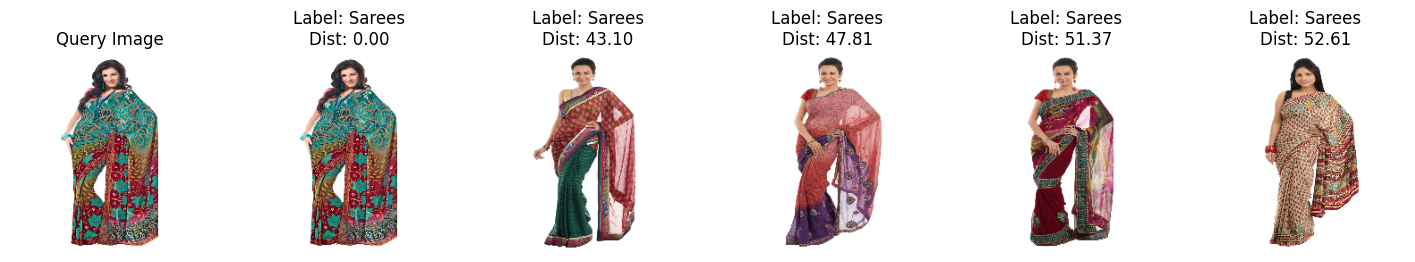

In [145]:
def retrieve_similar_images_ae(query_img_path, encoder_model, pca, nn_index, k=5):
    img = load_and_preprocess_image(query_img_path)
    if img is None:
        print("Could not load query image.")
        return []
    
    # Convert to embedding
    emb = encoder_model.predict(np.expand_dims(img, axis=0))
    emb_flat = emb.flatten()

    # Apply PCA
    emb_pca = pca.transform([emb_flat])

    # Retrieve neighbors
    distances, indices = nn_index.kneighbors(emb_pca, n_neighbors=k)
    return indices[0], distances[0]
def plot_query_and_retrieved(query_img_path, inds, dists, train_paths, train_labels, k=5):
    fig = plt.figure(figsize=(18, 3))
    
    # Plot query on the left
    query_img = load_and_preprocess_image(query_img_path)
    query_img_plot = (query_img * 255).astype("uint8")
    plt.subplot(1, k+1, 1)
    plt.imshow(query_img_plot)
    plt.title("Query Image")
    plt.axis('off')
    
    # Plot retrieved
    for i, idx in enumerate(inds[:k]):
        img_path = train_paths[idx]
        retrieved_label = train_labels[idx]
        retrieved_img = load_and_preprocess_image(img_path)
        retrieved_img_plot = (retrieved_img * 255).astype("uint8")
        
        plt.subplot(1, k+1, i+2)
        plt.imshow(retrieved_img_plot)
        plt.title(f"Label: {retrieved_label}\nDist: {dists[i]:.2f}")
        plt.axis('off')
    
    plt.show()
inds_3, dists_3 = retrieve_similar_images_ae(path_sub, encoder, pca_3, nn_index_3)
plot_query_and_retrieved(path_sub, inds_3, dists_3, train_ae_labels_loaded, train_ae_labels, k=5)

In [35]:
# Load
from tensorflow.keras.models import load_model
encoder_3 = load_model("m3_autoencoder/encoder.h5")  # we only need the encoder for retrieval
pca_3_loaded = joblib.load("m3_autoencoder/pca_3.joblib")
nn_index_3_loaded = joblib.load("m3_autoencoder/nn_index_3.joblib")
train_paths_ae__loaded    = np.load("m3_autoencoder/train_paths_ae.npy", allow_pickle=True)
train_ae_emb_pca_loaded = np.load("m3_autoencoder/train_ae_emb.npy")
train_ae_labels_loaded = np.load("m3_autoencoder/train_ae_labels.npy")

def get_ae_embedding(img, encoder_model):
    emb = encoder_model.predict(np.expand_dims(img, axis=0))
    return emb.flatten()

def retrieve_similar_images_ae(query_img_path, encoder_model, pca, nn_index, k=5):
    img = load_and_preprocess_image(query_img_path)
    if img is None:
        return []
    emb = get_ae_embedding(img, encoder_model)
    emb_pca = pca.transform([emb])
    distances, indices = nn_index.kneighbors(emb_pca, n_neighbors=k)
    return indices[0], distances[0]

# Example usage
query_path = path_sub
inds_3, dists_3 = retrieve_similar_images_ae(query_path,
                                             encoder_3,
                                             pca_3_loaded,
                                             nn_index_3_loaded,
                                             k=5)

print("Indices:", inds_3)
print("Distances:", dists_3)
labels_3 = train_ae_labels_loaded[inds_3]
print("Labels:", labels_3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Indices: [3037   17  555 3640 3789]
Distances: [36.03671564 38.34284238 42.03199168 42.91293404 43.34945471]
Labels: ['Sarees' 'Sarees' 'Sarees' 'Sarees' 'Sarees']
TIme  0.09478187561035156


In [148]:
#end of method 3

In [45]:
#method 4 : VIT +PCA +NN

In [150]:
import os
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


IMG_SIZE = 224
BATCH_SIZE = 32

train_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])

val_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder(train_folder, transform=train_transform)
val_dataset   = datasets.ImageFolder(val_folder,   transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset,   batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

num_classes = len(train_dataset.classes)
print("Number of classes:", num_classes)


Number of classes: 29


In [155]:
import timm
import torch
import torch.nn as nn

model_name = "vit_base_patch16_224"
model = timm.create_model(model_name, pretrained=True, num_classes=num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define a loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)


In [156]:
device

device(type='cuda')

In [157]:
def train_one_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for imgs, labels in dataloader:
        imgs, labels = imgs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * imgs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    
    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

def evaluate(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for imgs, labels in dataloader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item() * imgs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    
    epoch_loss = running_loss / total
    epoch_acc = correct / total
    return epoch_loss, epoch_acc

EPOCHS = 3
for epoch in range(EPOCHS):
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc = evaluate(model, val_loader, criterion, device)
    print(f"Epoch {epoch+1}/{EPOCHS}, "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")


Epoch 1/3, Train Loss: 0.9247, Train Acc: 0.7397, Val Loss: 0.3758, Val Acc: 0.8750
Epoch 2/3, Train Loss: 0.1545, Train Acc: 0.9545, Val Loss: 0.3269, Val Acc: 0.8870
Epoch 3/3, Train Loss: 0.0414, Train Acc: 0.9910, Val Loss: 0.3033, Val Acc: 0.8980


In [158]:
def extract_vit_features(model, x):
    """
        here i will return the penultimate 'features' for embedding use
    """
    model.eval()
    with torch.no_grad():
        features = model.forward_features(x)
        return features


In [159]:
import numpy as np

model.eval()

train_embeddings = []
train_labels = []
train_paths = []

for i in range(len(train_dataset)):
    path, lbl = train_dataset.samples[i]  
    img_pil = train_dataset.loader(path)   
    img_t   = train_dataset.transform(img_pil).unsqueeze(0).to(device)  # shape (1,3,224,224)
    
    feats = extract_vit_features(model, img_t).cpu().numpy()
    train_embeddings.append(feats.flatten())  # shape (embed_dim,)
    train_labels.append(lbl)
    train_paths.append(path)

train_embeddings = np.array(train_embeddings)
train_labels = np.array(train_labels)
train_paths = np.array(train_paths)

val_embeddings = []
val_labels = []
val_paths = []

for i in range(len(val_dataset)):
    path, lbl = val_dataset.samples[i] 
    img_pil = val_dataset.loader(path)
    img_t   = val_dataset.transform(img_pil).unsqueeze(0).to(device)
    
    feats = extract_vit_features(model, img_t).cpu().numpy()
    val_embeddings.append(feats.flatten())
    val_labels.append(lbl)
    val_paths.append(path)

val_embeddings = np.array(val_embeddings)
val_labels = np.array(val_labels)
val_paths  = np.array(val_paths)


In [160]:
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

pca_dim = 64
pca = PCA(n_components=pca_dim)
train_emb_pca = pca.fit_transform(train_embeddings)

nn_index = NearestNeighbors(n_neighbors=5, metric='euclidean')
nn_index.fit(train_emb_pca)

val_emb_pca = pca.transform(val_embeddings)


In [161]:
def precision_at_k(
    val_emb_pca, val_labels, 
    train_emb_pca, train_labels, 
    nn_index, k=5
):
    total   = len(val_emb_pca)
    correct = 0
    for i in range(total):
        emb   = val_emb_pca[i]
        label = val_labels[i]
        # Nearest neighbors among train set
        dist, inds = nn_index.kneighbors([emb], n_neighbors=k)
        retrieved_labels = train_labels[inds[0]]
        # If "label" is in retrieved_labels, we count 1
        if label in retrieved_labels:
            correct += 1
    return correct / total

p_at_5 = precision_at_k(val_emb_pca, val_labels, train_emb_pca, train_labels, nn_index, k=5)
print(f"Precision@5 (ViT + PCA + NN): {p_at_5:.4f}")


Precision@5 (ViT + PCA + NN): 0.9590


In [162]:
import torch
import joblib
import numpy as np

# 1) Save entire model
torch.save(model, "m4_vit/vit_finetuned_full.pth")

# 2) Save PCA
joblib.dump(pca, "m4_vit/vit_pca.joblib")

# 3) Save NearestNeighbors
joblib.dump(nn_index, "m4_vit/vit_nn.joblib")

# 4) Save train embeddings, labels, paths
np.save("m4_vit/train_emb_pca.npy", train_emb_pca)
np.save("m4_vit/train_labels.npy", train_labels)
np.save("m4_vit/train_paths.npy", train_paths)


In [46]:
import torch
import joblib
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_loaded = torch.load("m4_vit/vit_finetuned_full.pth", map_location=device)
model_loaded.eval()

pca_loaded = joblib.load("m4_vit/vit_pca.joblib")
nn_loaded  = joblib.load("m4_vit/vit_nn.joblib")

train_emb_pca_loaded = np.load("m4_vit/train_emb_pca.npy")
train_labels_loaded   = np.load("m4_vit/train_labels.npy")
train_paths_loaded    = np.load("m4_vit/train_paths.npy", allow_pickle=True)


/home/datascience/anaconda3/envs/drone/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [47]:
import cv2
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

inference_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])

def extract_vit_features(model, x):
    model.eval()
    with torch.no_grad():
        feats = model.forward_features(x)
    return feats


def retrieve_similar_vit(query_path, model, pca, nn_index, k=5):
    img_bgr = cv2.imread(query_path)
    if img_bgr is None:
        print("Could not load:", query_path)
        return [], []
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_pil = Image.fromarray(img_rgb)

    pil_tensor = inference_transform(img_pil).unsqueeze(0).to(device)
    feats = extract_vit_features(model, pil_tensor).cpu().numpy().flatten().reshape(1, -1)

    # PCA
    feats_pca = pca.transform(feats)
    
    # NN search
    dists, inds = nn_index.kneighbors(feats_pca, n_neighbors=k)
    return inds[0], dists[0]

    

def plot_retrieved_images(indices, distances, train_paths, k=5):
    """Plot the top-k retrieved images in a single row."""
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices[:k]):
        path = train_paths[idx]
        
        # Load the image from disk
        img_bgr = cv2.imread(path)
        if img_bgr is None:
            continue
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        
        plt.subplot(1, k, i+1)
        plt.imshow(img_rgb)
        plt.title(f"dist={distances[i]:.2f}\nidx={idx}")
        plt.axis("off")
    plt.show()


Indices: [1765 1774 1775 1779 1789]
Distances: [8.73557350e-04 2.46095413e+02 2.62008179e+02 2.68511749e+02
 2.71786102e+02]


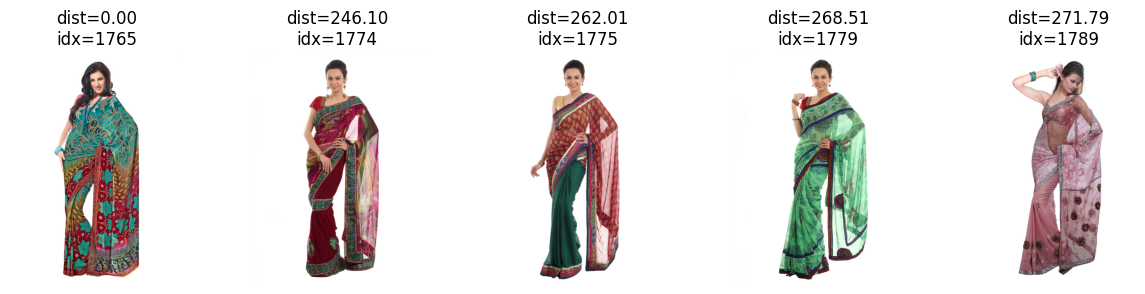

In [168]:
query_path = path_sub
inds, dists = retrieve_similar_vit(query_path, model_loaded, pca_loaded, nn_loaded, k=5)
print("Indices:", inds)
print("Distances:", dists)

# Plot them
plot_retrieved_images(inds, dists, train_paths_loaded, k=5)


Indices: [1794 1782 1775 1777 1774]
Distances: [249.26422119 275.89373779 290.24932861 292.35467529 304.89660645]


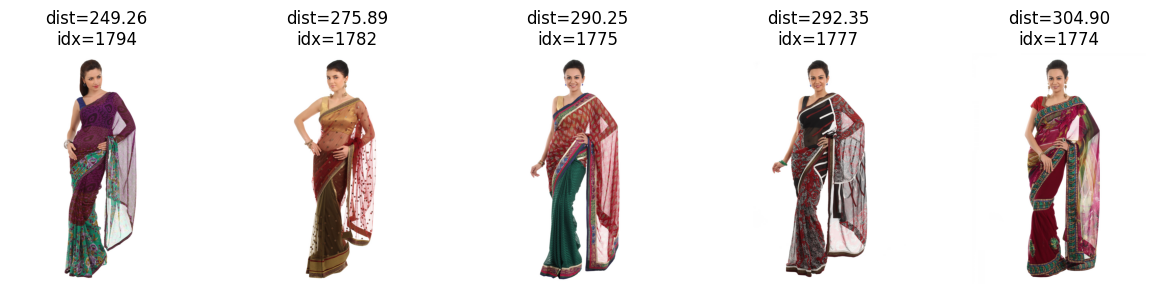

In [49]:
start=time.time()
query_path = path_sub
inds, dists = retrieve_similar_vit(query_path, model_loaded, pca_loaded, nn_loaded, k=5)
print("Indices:", inds)
print("Distances:", dists)

plot_retrieved_images(inds, dists, train_paths_loaded, k=5)
end=time.time()


In [50]:
print(end-start," time ")

3.6106250286102295  time 


In [169]:
#method 4 end

method 5 start SIAMESE + triplet loss

In [170]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np


IMG_SIZE   = 224
BATCH_SIZE = 32  # For triplet sampling

transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder(train_folder, transform=transform)
val_dataset   = datasets.ImageFolder(val_folder,   transform=transform)

class_names = train_dataset.classes 

print("Train samples:", len(train_dataset))
print("Val samples:",   len(val_dataset))
print("Num classes:",   len(class_names))


Train samples: 3999
Val samples: 1000
Num classes: 29


In [195]:
import torch.nn as nn
import torch.nn.functional as F

class EmbeddingNet(nn.Module):
    """i didnt use mobilenet here but a simpler smaller CNN model which give 128 size embedding at the end"""
    def __init__(self, embedding_dim=128):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.fc = nn.Linear(128*(IMG_SIZE//8)*(IMG_SIZE//8), embedding_dim)
        
    def forward(self, x):
        # x: (B,3,224,224)
        x = F.relu(self.conv1(x))  # -> (B,32,224,224)
        x = self.pool(x)           # -> (B,32,112,112)
        
        x = F.relu(self.conv2(x))  # -> (B,64,112,112)
        x = self.pool(x)           # -> (B,64,56,56)
        
        x = F.relu(self.conv3(x))  # -> (B,128,56,56)
        x = self.pool(x)           # -> (B,128,28,28)
        
        x = x.view(x.size(0), -1)  # flatten
        x = self.fc(x)             # (B, embedding_dim)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
base_model = EmbeddingNet(embedding_dim=128).to(device)


In [196]:
train_imgs = []
train_lbls = []
for i in range(len(train_dataset)):
    img, lbl = train_dataset[i]
    train_imgs.append(np.array(img)) 
    train_lbls.append(lbl)
train_imgs = np.array(train_imgs) 
train_lbls = np.array(train_lbls)

print("train_imgs.shape:", train_imgs.shape)
print("train_lbls.shape:", train_lbls.shape)


train_imgs.shape: (3999, 3, 224, 224)
train_lbls.shape: (3999,)


In [197]:
from collections import defaultdict
import random

label_to_indices = defaultdict(list)
for idx, lbl in enumerate(train_lbls):
    label_to_indices[lbl].append(idx)
unique_labels = list(label_to_indices.keys())


In [174]:
def triplet_batch_generator(batch_size=32):
    while True:
        anchor_batch   = []
        positive_batch = []
        negative_batch = []
        
        for _ in range(batch_size):
            # pick anchor label
            anchor_label = random.choice(unique_labels)
            # need at least 2 images in that label
            if len(label_to_indices[anchor_label]) < 2:
                continue
            a_idx, p_idx = random.sample(label_to_indices[anchor_label], 2)
            
            # pick negative label
            neg_label = random.choice(unique_labels)
            while neg_label == anchor_label:
                neg_label = random.choice(unique_labels)
            n_idx = random.choice(label_to_indices[neg_label])
            
            anchor_img = train_imgs[a_idx]   # shape (3,224,224)
            pos_img    = train_imgs[p_idx]
            neg_img    = train_imgs[n_idx]
            
            anchor_batch.append(anchor_img)
            positive_batch.append(pos_img)
            negative_batch.append(neg_img)
        
        anchor_batch   = torch.tensor(np.array(anchor_batch), dtype=torch.float32)
        positive_batch = torch.tensor(np.array(positive_batch), dtype=torch.float32)
        negative_batch = torch.tensor(np.array(negative_batch), dtype=torch.float32)
        
        if anchor_batch.shape[-1] == 3:
            # changing (B,H,W,C)->(B,C,H,W)
            anchor_batch   = anchor_batch.permute(0,3,1,2)
            positive_batch = positive_batch.permute(0,3,1,2)
            negative_batch = negative_batch.permute(0,3,1,2)

        yield [anchor_batch.to(device), 
               positive_batch.to(device), 
               negative_batch.to(device)]
class TripletLoss(nn.Module):
    def __init__(self, margin=1.0):
        super().__init__()
        self.margin = margin

    def forward(self, anchor, positive, negative):
        # squared L2 distances
        d_pos = ((anchor - positive)**2).sum(dim=1)   # shape (B,)
        d_neg = ((anchor - negative)**2).sum(dim=1)
        losses = torch.relu(d_pos - d_neg + self.margin)
        return losses.mean()


In [176]:
optimizer = torch.optim.Adam(base_model.parameters(), lr=1e-4)
triplet_loss_fn = TripletLoss(margin=1.0)

def train_triplet(model, generator, steps_per_epoch, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for step in range(steps_per_epoch):
            anchor_batch, pos_batch, neg_batch = next(generator)
            anchor_emb = model(anchor_batch)  # shape (B,128)
            pos_emb    = model(pos_batch)
            neg_emb    = model(neg_batch)
            
            loss = triplet_loss_fn(anchor_emb, pos_emb, neg_emb)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        avg_loss = total_loss / steps_per_epoch
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

num_samples = len(train_imgs)  # total training images
steps_per_epoch = num_samples // BATCH_SIZE

gen = triplet_batch_generator(BATCH_SIZE)
train_triplet(base_model, gen, steps_per_epoch, epochs=10)


Epoch 1/10, Loss: 0.1271
Epoch 2/10, Loss: 0.1025
Epoch 3/10, Loss: 0.1094
Epoch 4/10, Loss: 0.0814
Epoch 5/10, Loss: 0.0739
Epoch 6/10, Loss: 0.0722
Epoch 7/10, Loss: 0.0705
Epoch 8/10, Loss: 0.0628
Epoch 9/10, Loss: 0.0559
Epoch 10/10, Loss: 0.0521


In [177]:
optimizer = torch.optim.Adam(base_model.parameters(), lr=1e-4)
triplet_loss_fn = TripletLoss(margin=1.0)

def train_triplet(model, generator, steps_per_epoch, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for step in range(steps_per_epoch):
            anchor_batch, pos_batch, neg_batch = next(generator)
            anchor_emb = model(anchor_batch)  # shape (B,128)
            pos_emb    = model(pos_batch)
            neg_emb    = model(neg_batch)
            
            loss = triplet_loss_fn(anchor_emb, pos_emb, neg_emb)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        avg_loss = total_loss / steps_per_epoch
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

num_samples = len(train_imgs)  # total training images
steps_per_epoch = num_samples // BATCH_SIZE

gen = triplet_batch_generator(BATCH_SIZE)
train_triplet(base_model, gen, steps_per_epoch, epochs=20)


Epoch 1/20, Loss: 0.0521
Epoch 2/20, Loss: 0.0616
Epoch 3/20, Loss: 0.0551
Epoch 4/20, Loss: 0.0490
Epoch 5/20, Loss: 0.0602
Epoch 6/20, Loss: 0.0463
Epoch 7/20, Loss: 0.0504
Epoch 8/20, Loss: 0.0420
Epoch 9/20, Loss: 0.0445
Epoch 10/20, Loss: 0.0339
Epoch 11/20, Loss: 0.0383
Epoch 12/20, Loss: 0.0398
Epoch 13/20, Loss: 0.0426
Epoch 14/20, Loss: 0.0418
Epoch 15/20, Loss: 0.0335
Epoch 16/20, Loss: 0.0400
Epoch 17/20, Loss: 0.0372
Epoch 18/20, Loss: 0.0330
Epoch 19/20, Loss: 0.0309
Epoch 20/20, Loss: 0.0292


In [200]:
optimizer = torch.optim.Adam(base_model.parameters(), lr=1e-5)
triplet_loss_fn = TripletLoss(margin=1.0)

def train_triplet(model, generator, steps_per_epoch, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for step in range(steps_per_epoch):
            anchor_batch, pos_batch, neg_batch = next(generator)
            anchor_emb = model(anchor_batch)  # shape (B,128)
            pos_emb    = model(pos_batch)
            neg_emb    = model(neg_batch)
            
            loss = triplet_loss_fn(anchor_emb, pos_emb, neg_emb)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        avg_loss = total_loss / steps_per_epoch
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

num_samples = len(train_imgs)  # total training images
steps_per_epoch = num_samples // BATCH_SIZE

gen = triplet_batch_generator(BATCH_SIZE)
train_triplet(base_model, gen, steps_per_epoch, epochs=23)


Epoch 1/23, Loss: 0.0270
Epoch 2/23, Loss: 0.0216
Epoch 3/23, Loss: 0.0199
Epoch 4/23, Loss: 0.0110
Epoch 5/23, Loss: 0.0191
Epoch 6/23, Loss: 0.0188
Epoch 7/23, Loss: 0.0140
Epoch 8/23, Loss: 0.0175
Epoch 9/23, Loss: 0.0163
Epoch 10/23, Loss: 0.0145
Epoch 11/23, Loss: 0.0139
Epoch 12/23, Loss: 0.0139
Epoch 13/23, Loss: 0.0113
Epoch 14/23, Loss: 0.0168
Epoch 15/23, Loss: 0.0146
Epoch 16/23, Loss: 0.0101
Epoch 17/23, Loss: 0.0163
Epoch 18/23, Loss: 0.0104
Epoch 19/23, Loss: 0.0115
Epoch 20/23, Loss: 0.0124
Epoch 21/23, Loss: 0.0125
Epoch 22/23, Loss: 0.0132
Epoch 23/23, Loss: 0.0111


In [ ]:
#Get embeddings in eval mode

In [201]:
train_paths = []
for sample, label in train_dataset.samples:
    train_paths.append(sample)
train_paths = np.array(train_paths)

train_embeddings = []
train_labels = []
base_model.eval()

for i, (path, lbl) in enumerate(train_dataset.samples):
    img, _ = train_dataset[i]  # shape (C,H,W)
    img = img.unsqueeze(0).to(device)  # (1,C,H,W)
    with torch.no_grad():
        emb = base_model(img)  # (1,128)
    train_embeddings.append(emb.squeeze(0).cpu().numpy())
    train_labels.append(lbl)

train_embeddings = np.array(train_embeddings)  # (N,128)
train_labels     = np.array(train_labels)      # (N,)
print("train_embeddings.shape:", train_embeddings.shape)


train_embeddings.shape: (3999, 128)


In [202]:
val_paths = []
for sample, label in val_dataset.samples:
    val_paths.append(sample)
val_paths = np.array(val_paths)

val_embeddings = []
val_labels = []
base_model.eval()

for i, (path, lbl) in enumerate(val_dataset.samples):
    img, _ = val_dataset[i]
    img = img.unsqueeze(0).to(device)
    with torch.no_grad():
        emb = base_model(img)
    val_embeddings.append(emb.squeeze(0).cpu().numpy())
    val_labels.append(lbl)

val_embeddings = np.array(val_embeddings)
val_labels     = np.array(val_labels)
print("val_embeddings.shape:", val_embeddings.shape)


val_embeddings.shape: (1000, 128)


In [215]:
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

pca_dim = 32
pca = PCA(n_components=pca_dim)
train_emb_pca = pca.fit_transform(train_embeddings)

nn_index = NearestNeighbors(n_neighbors=5, metric='euclidean')
nn_index.fit(train_emb_pca)

# transform val set
val_emb_pca = pca.transform(val_embeddings)


In [216]:
def precision_at_k(val_emb, val_lbls, train_emb, train_lbls, nn_idx, k=5):
    total   = len(val_emb)
    correct = 0
    for i in range(total):
        emb   = val_emb[i]
        label = val_lbls[i]
        
        dist, inds = nn_idx.kneighbors([emb], n_neighbors=k)
        retrieved_labels = train_lbls[inds[0]]
        
        if label in retrieved_labels:
            correct += 1
        # print(total)
    return correct / total

p_at_5 = precision_at_k(val_emb_pca, val_labels, train_emb_pca, train_labels, nn_index, k=5)
print("Precision@5 (Siamese Triplet):", p_at_5)


Precision@5 (Siamese Triplet): 0.899


In [205]:
import joblib
import torch

# 1) Save model
torch.save(base_model.state_dict(), "m5_siamese/triplet_base_model.pth")

# 2) Save PCA
joblib.dump(pca, "m5_siamese/triplet_pca.joblib")

# 3) Save NearestNeighbors
joblib.dump(nn_index, "m5_siamese/triplet_nn.joblib")

# 4) Save train embeddings, labels, paths
np.save("m5_siamese/train_emb_pca.npy",    train_emb_pca)
np.save("m5_siamese/train_labels.npy",     train_labels)
np.save("m5_siamese/train_paths.npy",      train_paths)


In [206]:
loaded_model = EmbeddingNet(embedding_dim=128).to(device)
loaded_model.load_state_dict(torch.load("m5_siamese/triplet_base_model.pth", map_location=device))
loaded_model.eval()

pca_loaded     = joblib.load("m5_siamese/triplet_pca.joblib")
nn_loaded      = joblib.load("m5_siamese/triplet_nn.joblib")

train_emb_pca_loaded = np.load("m5_siamese/train_emb_pca.npy")
train_labels_loaded  = np.load("m5_siamese/train_labels.npy")
train_paths_loaded   = np.load("m5_siamese/train_paths.npy", allow_pickle=True)


In [207]:
import cv2
import matplotlib.pyplot as plt
from torchvision import transforms

inference_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])

def get_triplet_embedding(model, img_tensor):
    model.eval()
    with torch.no_grad():
        emb = model(img_tensor)
    return emb.cpu().numpy().flatten()

def retrieve_similar_triplet(query_path, model, pca, nn_index, k=5):
    # load via cv2
    img_bgr = cv2.imread(query_path)
    if img_bgr is None:
        print("Could not load image:", query_path)
        return [], []
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    # (H,W,3) => (3,H,W)
    tensor = torch.from_numpy(img_rgb).permute(2,0,1).float()/255.0
    tensor = inference_transform.transforms[0](tensor)  
    tensor = transforms.functional.resize(tensor, (IMG_SIZE, IMG_SIZE))
    tensor = tensor.unsqueeze(0).to(device)
    
    
    emb = get_triplet_embedding(model, tensor)  # shape (128,)
    emb_pca = pca.transform([emb])             # shape (1, pca_dim)
    
    dists, inds = nn_index.kneighbors(emb_pca, n_neighbors=k)
    return inds[0], dists[0]
def plot_retrieved_images(indices, distances, train_paths, k=5):
    plt.figure(figsize=(15,3))
    for i, idx in enumerate(indices[:k]):
        path = train_paths[idx]
        img_bgr = cv2.imread(path)
        if img_bgr is None:
            continue
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        
        plt.subplot(1, k, i+1)
        plt.imshow(img_rgb)
        plt.title(f"dist={distances[i]:.2f}\nidx={idx}")
        plt.axis("off")
    plt.show()


Retrieved indices: [1765 1793 1762 1757 1763]
Distances: [0.49867532 0.83488707 0.89769051 0.91386708 0.9569697 ]
Retrieved labels: [18 18 18 18 18]
Class Name: Sarees Path: data/fashion-dataset/fashion-dataset/train_finetune/Sarees/50907.jpg
Class Name: Sarees Path: data/fashion-dataset/fashion-dataset/train_finetune/Sarees/59651.jpg
Class Name: Sarees Path: data/fashion-dataset/fashion-dataset/train_finetune/Sarees/50872.jpg
Class Name: Sarees Path: data/fashion-dataset/fashion-dataset/train_finetune/Sarees/46005.jpg
Class Name: Sarees Path: data/fashion-dataset/fashion-dataset/train_finetune/Sarees/50878.jpg


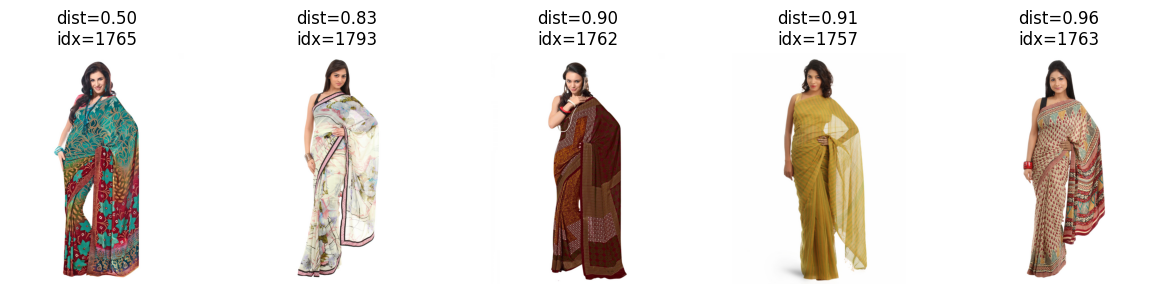

In [208]:
query_path = path_sub
inds, dists = retrieve_similar_triplet(query_path, loaded_model, pca_loaded, nn_loaded, k=5)

print("Retrieved indices:", inds)
print("Distances:", dists)
print("Retrieved labels:", train_labels_loaded[inds])
for i in inds:
    print("Class Name:", class_names[ train_labels_loaded[i] ], "Path:", train_paths_loaded[i])

# Plot them
plot_retrieved_images(inds, dists, train_paths_loaded, k=5)


In [211]:
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

pca_dim = 32
pca = PCA(n_components=pca_dim)
train_emb_pca = pca.fit_transform(train_embeddings)

nn_index = NearestNeighbors(n_neighbors=5, metric='cosine')
nn_index.fit(train_emb_pca)

# transform val set
val_emb_pca = pca.transform(val_embeddings)


Retrieved indices: [1765 1793 1763 1762 1757]
Distances: [0.00946853 0.03843685 0.05901215 0.05999818 0.06124351]
Retrieved labels: [18 18 18 18 18]
Class Name: Sarees Path: data/fashion-dataset/fashion-dataset/train_finetune/Sarees/50907.jpg
Class Name: Sarees Path: data/fashion-dataset/fashion-dataset/train_finetune/Sarees/59651.jpg
Class Name: Sarees Path: data/fashion-dataset/fashion-dataset/train_finetune/Sarees/50878.jpg
Class Name: Sarees Path: data/fashion-dataset/fashion-dataset/train_finetune/Sarees/50872.jpg
Class Name: Sarees Path: data/fashion-dataset/fashion-dataset/train_finetune/Sarees/46005.jpg


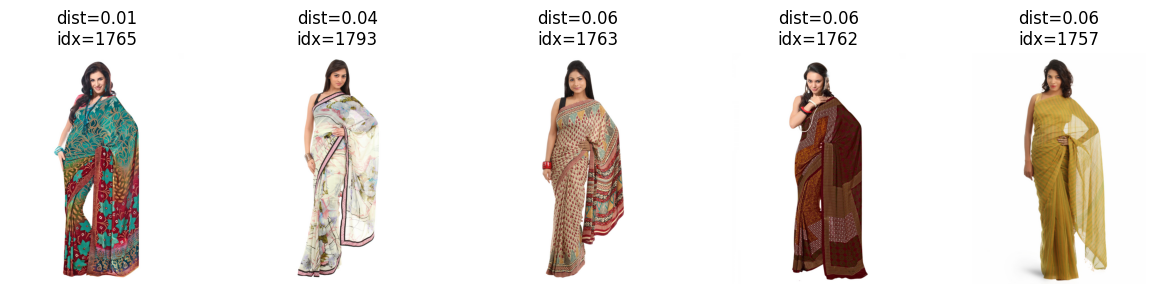

In [212]:
query_path = path_sub
inds, dists = retrieve_similar_triplet(query_path, loaded_model, pca_loaded, nn_index, k=5)

print("Retrieved indices:", inds)
print("Distances:", dists)
print("Retrieved labels:", train_labels_loaded[inds])
for i in inds:
    print("Class Name:", class_names[ train_labels_loaded[i] ], "Path:", train_paths_loaded[i])

# Plot them
plot_retrieved_images(inds, dists, train_paths_loaded, k=5)


In [52]:
loaded_model = EmbeddingNet(embedding_dim=128).to(device)
loaded_model.load_state_dict(torch.load("m5_siamese/triplet_base_model.pth", map_location=device))
loaded_model.eval()

pca_loaded     = joblib.load("m5_siamese/triplet_pca.joblib")
nn_loaded      = joblib.load("m5_siamese/triplet_nn.joblib")

train_emb_pca_loaded = np.load("m5_siamese/train_emb_pca.npy")
train_labels_loaded  = np.load("m5_siamese/train_labels.npy")
train_paths_loaded   = np.load("m5_siamese/train_paths.npy", allow_pickle=True)


In [53]:
import cv2
import matplotlib.pyplot as plt
from torchvision import transforms

inference_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])

def get_triplet_embedding(model, img_tensor):
    model.eval()
    with torch.no_grad():
        emb = model(img_tensor)
    return emb.cpu().numpy().flatten()

def retrieve_similar_triplet(query_path, model, pca, nn_index, k=5):
    # load via cv2
    img_bgr = cv2.imread(query_path)
    if img_bgr is None:
        print("Could not load image:", query_path)
        return [], []
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    tensor = torch.from_numpy(img_rgb).permute(2,0,1).float()/255.0
    tensor = inference_transform.transforms[0](tensor)  
    tensor = transforms.functional.resize(tensor, (IMG_SIZE, IMG_SIZE))
    tensor = tensor.unsqueeze(0).to(device)
    
    
    emb = get_triplet_embedding(model, tensor)  # shape (128,)
    emb_pca = pca.transform([emb])             # shape (1, pca_dim)
    
    # nearest neighbors
    dists, inds = nn_index.kneighbors(emb_pca, n_neighbors=k)
    return inds[0], dists[0]
def plot_retrieved_images(indices, distances, train_paths, k=5):
    plt.figure(figsize=(15,3))
    for i, idx in enumerate(indices[:k]):
        path = train_paths[idx]
        img_bgr = cv2.imread(path)
        if img_bgr is None:
            continue
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        
        plt.subplot(1, k, i+1)
        plt.imshow(img_rgb)
        plt.title(f"dist={distances[i]:.2f}\nidx={idx}")
        plt.axis("off")
    plt.show()


Retrieved indices: [1785 1784 1757 1793 1773]
Distances: [0.8774929  0.87826263 1.04345739 1.0538197  1.05726765]
Retrieved labels: [18 18 18 18 18]
Class Name: Sarees Path: data/fashion-dataset/fashion-dataset/train_finetune/Sarees/53052.jpg
Class Name: Sarees Path: data/fashion-dataset/fashion-dataset/train_finetune/Sarees/53042.jpg
Class Name: Sarees Path: data/fashion-dataset/fashion-dataset/train_finetune/Sarees/46005.jpg
Class Name: Sarees Path: data/fashion-dataset/fashion-dataset/train_finetune/Sarees/59651.jpg
Class Name: Sarees Path: data/fashion-dataset/fashion-dataset/train_finetune/Sarees/52950.jpg


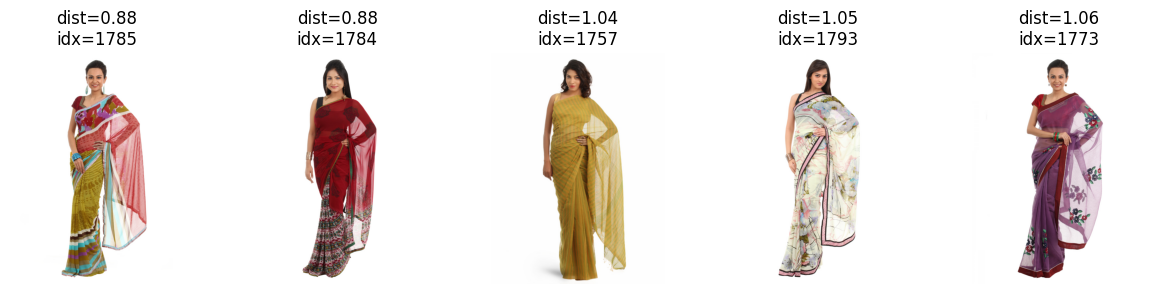

In [67]:
start=time.time()
class_names =['Backpacks',
 'Belts',
 'Bra',
 'Briefs',
 'Casual Shoes',
 'Deodorant',
 'Dresses',
 'Earrings',
 'Flats',
 'Flip Flops',
 'Formal Shoes',
 'Handbags',
 'Heels',
 'Jeans',
 'Kurtas',
 'Nail Polish',
 'Perfume and Body Mist',
 'Sandals',
 'Sarees',
 'Shirts',
 'Shorts',
 'Socks',
 'Sports Shoes',
 'Sunglasses',
 'Tops',
 'Trousers',
 'Tshirts',
 'Wallets',
 'Watches']
query_path = path_sub
inds, dists = retrieve_similar_triplet(query_path, loaded_model, pca_loaded, nn_loaded, k=5)

print("Retrieved indices:", inds)
print("Distances:", dists)
print("Retrieved labels:", train_labels_loaded[inds])
for i in inds:
    print("Class Name:", class_names[ train_labels_loaded[i] ], "Path:", train_paths_loaded[i])

# Plot them
plot_retrieved_images(inds, dists, train_paths_loaded, k=5)
end=time.time()

In [69]:
end-start

0.5413289070129395